![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/news/2020/01_2020/coronavirus_1/1800x1200_coronavirus_1.jpg)

# 1. Import Library

In [1]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from wordcloud import WordCloud

# Image
import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline

# Input data
print(os.listdir("../input/"))


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['corona-virus-time-series-dataset']


# 2. Read Data

In [2]:
time_series_covid_19_confirmed = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Confirmed.csv")
time_series_covid_19_recovered = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Recovered.csv")
time_series_covid_19_deaths = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Deaths.csv")

Lets see some data

In [3]:
time_series_covid_19_confirmed.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/20  2/22/20  2/23/20  \
0       15       39       60       70  ...      988      989      989   
1       36       41       68       80  ...      396      399      399   
2       27       57       75      110  ...      572      573      575   
3       10       18       35       59  ...      293      293      293   
4        2        4        7       14  ...       91       91       91   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  
0      989      989      989      989      990      990     990  
1      399      400      400      410      410      411     413  
2      576      576      576      576      576      576     576  
3      293      294      294      296      296      296     296  
4       91       91       91       91       91       91      91  

[5 rows x 44 columns]

In [4]:
time_series_covid_19_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 44 columns):
Province/State    65 non-null object
Country/Region    125 non-null object
Lat               125 non-null float64
Long              125 non-null float64
1/22/20           125 non-null int64
1/23/20           125 non-null int64
1/24/20           125 non-null int64
1/25/20           125 non-null int64
1/26/20           125 non-null int64
1/27/20           125 non-null int64
1/28/20           125 non-null int64
1/29/20           125 non-null int64
1/30/20           125 non-null int64
1/31/20           125 non-null int64
2/1/20            125 non-null int64
2/2/20            125 non-null int64
2/3/20            125 non-null int64
2/4/20            125 non-null int64
2/5/20            125 non-null int64
2/6/20            125 non-null int64
2/7/20            125 non-null int64
2/8/20            125 non-null int64
2/9/20            125 non-null int64
2/10/20           125 non-null int64
2/

In [5]:
time_series_covid_19_confirmed.fillna("NA", inplace=True)

In [6]:
time_series_covid_19_recovered.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0  ...      539      597      637   
1        1        2        2        2  ...      169      178      189   
2        0        0        0        0  ...      316      328      335   
3        0        0        0        0  ...      149      162      170   
4        0        0        0        0  ...       76       76       78   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  
0      663      712      744      792      821      868     873  
1      198      215      235      248      257      271     276  
2      349      372      384      401      422      438     450  
3      183      199      218      228      235      243     247  
4       80       80       81       81       82       82      84  

[5 rows x 44 columns]

In [7]:
time_series_covid_19_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 44 columns):
Province/State    65 non-null object
Country/Region    125 non-null object
Lat               125 non-null float64
Long              125 non-null float64
1/22/20           125 non-null int64
1/23/20           125 non-null int64
1/24/20           125 non-null int64
1/25/20           125 non-null int64
1/26/20           125 non-null int64
1/27/20           125 non-null int64
1/28/20           125 non-null int64
1/29/20           125 non-null int64
1/30/20           125 non-null int64
1/31/20           125 non-null int64
2/1/20            125 non-null int64
2/2/20            125 non-null int64
2/3/20            125 non-null int64
2/4/20            125 non-null int64
2/5/20            125 non-null int64
2/6/20            125 non-null int64
2/7/20            125 non-null int64
2/8/20            125 non-null int64
2/9/20            125 non-null int64
2/10/20           125 non-null int64
2/

In [8]:
time_series_covid_19_recovered.fillna("NA", inplace=True)

In [9]:
time_series_covid_19_deaths.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0  ...        6        6        6   
1        0        0        0        1  ...        4        4        4   
2        0        0        0        0  ...        6        6        6   
3        0        0        0        0  ...        1        1        1   
4        0        0        0        0  ...        2        2        2   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  
0        6        6        6        6        6        6       6  
1        4        4        4        5        7        8       8  
2        6        6        6        6        6        6       6  
3        1        1        1        1        1        1       1  
4        2        2        2        2        2        2       2  

[5 rows x 44 columns]

In [10]:
time_series_covid_19_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 44 columns):
Province/State    65 non-null object
Country/Region    125 non-null object
Lat               125 non-null float64
Long              125 non-null float64
1/22/20           125 non-null int64
1/23/20           125 non-null int64
1/24/20           125 non-null int64
1/25/20           125 non-null int64
1/26/20           125 non-null int64
1/27/20           125 non-null int64
1/28/20           125 non-null int64
1/29/20           125 non-null int64
1/30/20           125 non-null int64
1/31/20           125 non-null int64
2/1/20            125 non-null int64
2/2/20            125 non-null int64
2/3/20            125 non-null int64
2/4/20            125 non-null int64
2/5/20            125 non-null int64
2/6/20            125 non-null int64
2/7/20            125 non-null int64
2/8/20            125 non-null int64
2/9/20            125 non-null int64
2/10/20           125 non-null int64
2/

In [11]:
time_series_covid_19_deaths.fillna("NA", inplace=True)

In [12]:
columns = time_series_covid_19_confirmed.columns.tolist()
rej_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
data_cols = [c for c in columns if c not in rej_columns]

In [13]:
# print("Number of days of outbreak recorded      : %d"%(len(time_series_covid_19_confirmed.ObservationDate.unique())))
print("Number of countries with outbreak        : %d"%(len(time_series_covid_19_confirmed["Country/Region"].unique())))

Number of countries with outbreak        : 68


In [14]:
confirm_country = time_series_covid_19_confirmed["Country/Region"].unique()
confirm_country.sort()

print(" Number of country with outbreak: %d"%(len(confirm_country)))
print("\n Following are the countries with outbreak:\n")

i = 1
for c in confirm_country:
    print(" %.2d : %s"%(i, c))
    i+=1

 Number of country with outbreak: 68

 Following are the countries with outbreak:

 01 : Afghanistan
 02 : Algeria
 03 : Armenia
 04 : Australia
 05 : Austria
 06 : Azerbaijan
 07 : Bahrain
 08 : Belarus
 09 : Belgium
 10 : Brazil
 11 : Cambodia
 12 : Canada
 13 : Croatia
 14 : Czech Republic
 15 : Denmark
 16 : Dominican Republic
 17 : Ecuador
 18 : Egypt
 19 : Estonia
 20 : Finland
 21 : France
 22 : Georgia
 23 : Germany
 24 : Greece
 25 : Hong Kong
 26 : Iceland
 27 : India
 28 : Iran
 29 : Iraq
 30 : Ireland
 31 : Israel
 32 : Italy
 33 : Japan
 34 : Kuwait
 35 : Lebanon
 36 : Lithuania
 37 : Luxembourg
 38 : Macau
 39 : Mainland China
 40 : Malaysia
 41 : Mexico
 42 : Monaco
 43 : Nepal
 44 : Netherlands
 45 : New Zealand
 46 : Nigeria
 47 : North Macedonia
 48 : Norway
 49 : Oman
 50 : Others
 51 : Pakistan
 52 : Philippines
 53 : Qatar
 54 : Romania
 55 : Russia
 56 : San Marino
 57 : Singapore
 58 : South Korea
 59 : Spain
 60 : Sri Lanka
 61 : Sweden
 62 : Switzerland
 63 : T

In [15]:
ticksize = 20
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


text = ""
for c in confirm_country:
    text += c + " "

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(max_font_size=20, background_color="white", colormap="Blues").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
state_province_country_map = {}

for index, row in time_series_covid_19_confirmed.iterrows():
    state_province_country_map[row["Province/State"]] = row["Country/Region"]
    

country_state_province_map = {}

for state in state_province_country_map:
    if state_province_country_map[state] not in country_state_province_map:
        country_state_province_map[state_province_country_map[state]] = []
    country_state_province_map[state_province_country_map[state]].append(state)
    
for country in confirm_country:
    if country not in country_state_province_map:
        country_state_province_map[country] = []
        country_state_province_map[country].append("NA")

country_state_province_map = sorted(country_state_province_map.items(), key=operator.itemgetter(0), reverse=False)
country_state_province_map = { i:j for i,j in country_state_province_map }

In [17]:
i = 1

total_region_confirmed = 0

for country in country_state_province_map:
    j = 1
    if not country_state_province_map[country][0] == "NA":
        print(" " + str(i) + ". " + country + "(" + str(len(country_state_province_map[country])) + ")" )
        print("_"*20)
        country_state_province_map[country].sort()
        for state in country_state_province_map[country]:
            print(" " + str(j) + ". " + str(state))
            total_region_confirmed +=1
            j +=1
        print("_"*20)
    else:
        total_region_confirmed +=1
        print(" " + str(i) + ". " +" " + country)
        print("_"*20)
    print("\n")
    i += 1

 1.  Afghanistan
____________________


 2.  Algeria
____________________


 3.  Armenia
____________________


 4. Australia(6)
____________________
 1. From Diamond Princess
 2. New South Wales
 3. Queensland
 4. South Australia
 5. Victoria
 6. Western Australia
____________________


 5.  Austria
____________________


 6.  Azerbaijan
____________________


 7.  Bahrain
____________________


 8.  Belarus
____________________


 9.  Belgium
____________________


 10.  Brazil
____________________


 11.  Cambodia
____________________


 12. Canada(4)
____________________
 1.  Montreal, QC
 2. British Columbia
 3. London, ON
 4. Toronto, ON
____________________


 13.  Croatia
____________________


 14.  Czech Republic
____________________


 15.  Denmark
____________________


 16.  Dominican Republic
____________________


 17.  Ecuador
____________________


 18.  Egypt
____________________


 19.  Estonia
____________________


 20.  Finland
____________________


 21.  France


In [18]:
print("Number of Province/State with outbreak   : %d"%(total_region_confirmed))

Number of Province/State with outbreak   : 125


In [19]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Confirmed Cases by Date"

time_series_covid_19_confirmed[data_cols].sum().plot()
plt.title(title)
plt.show()

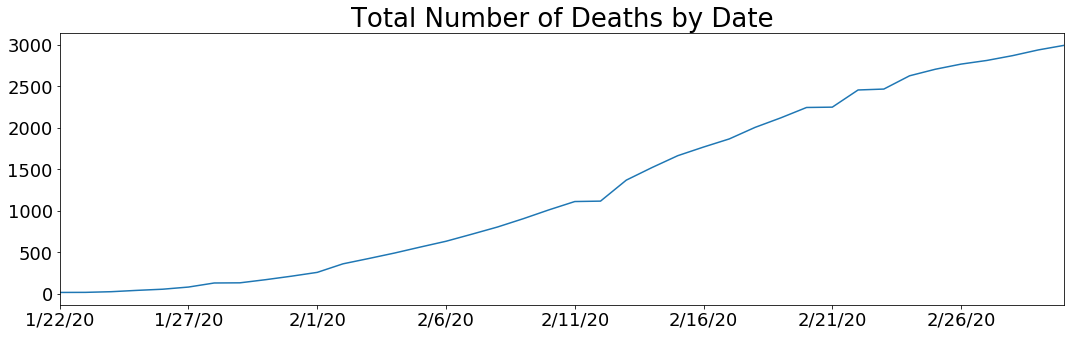

In [20]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Deaths by Date"

time_series_covid_19_deaths[data_cols].sum().plot()
plt.title(title)
plt.show()

In [21]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Recovery by Date"

time_series_covid_19_recovered[data_cols].sum().plot()
plt.title(title)
plt.show()

# Confirmed

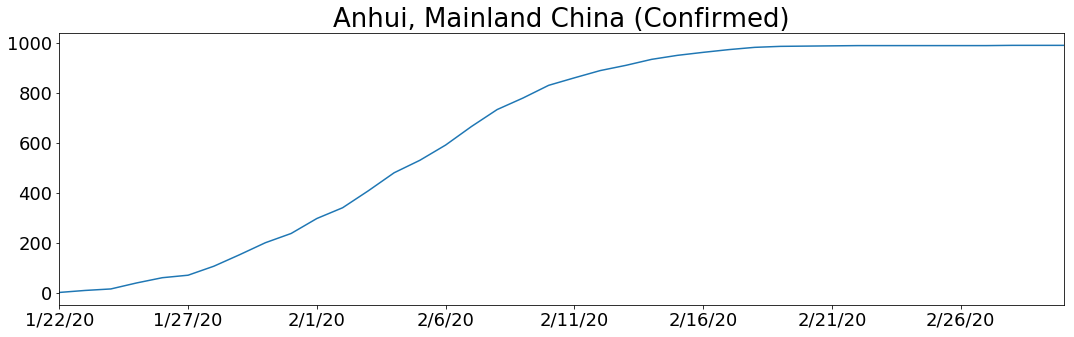

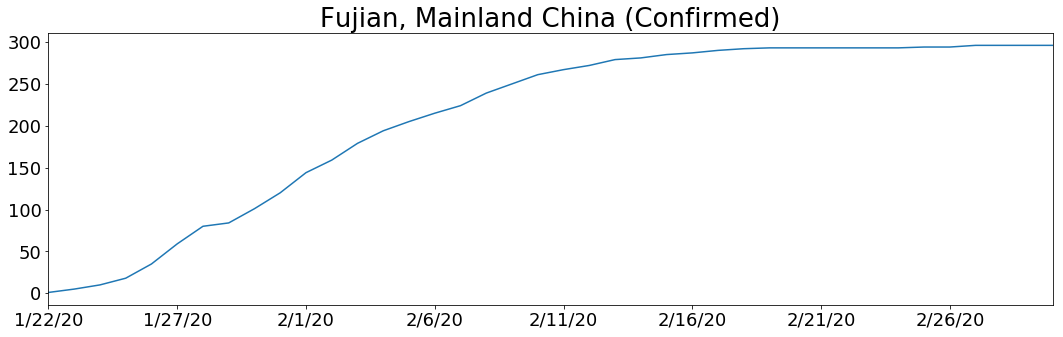

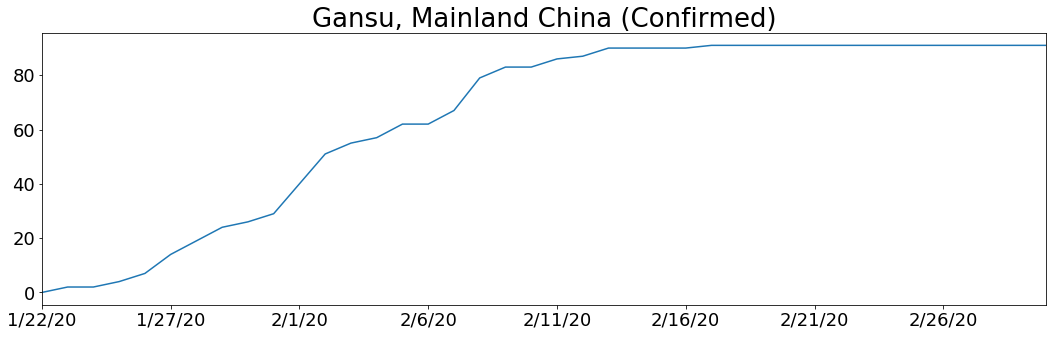

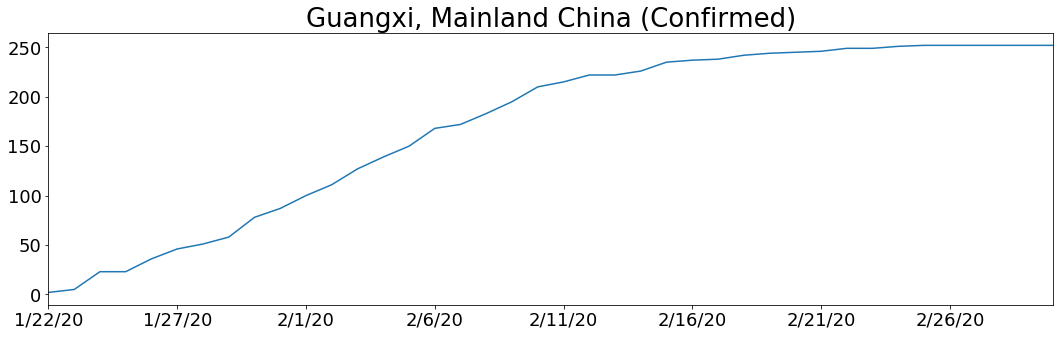

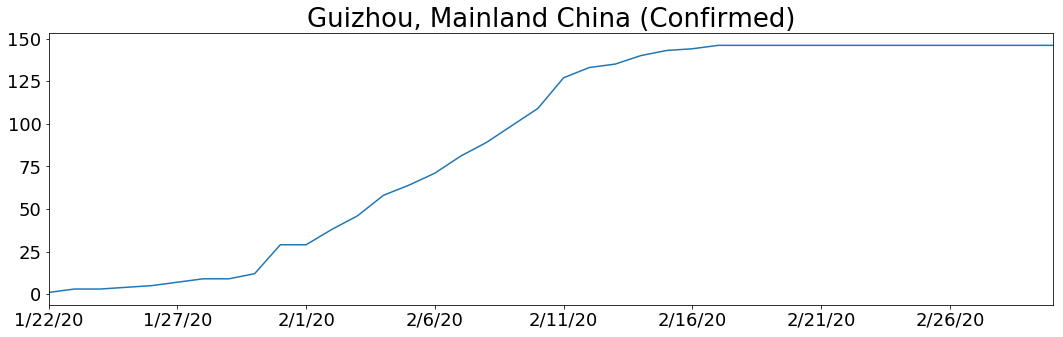

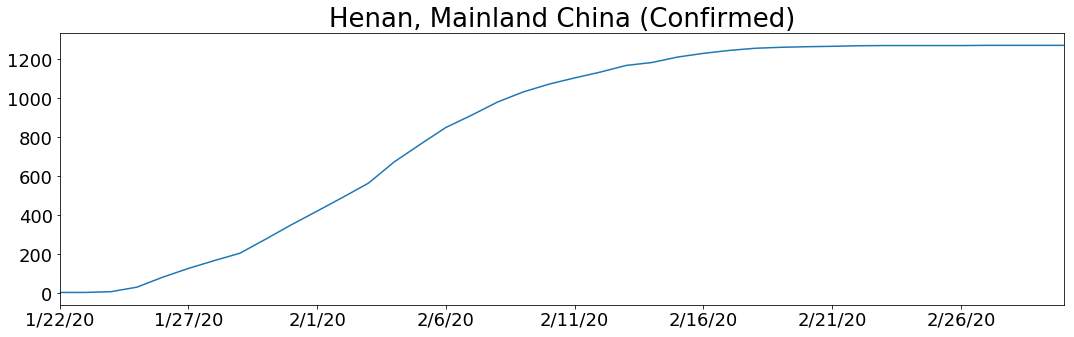

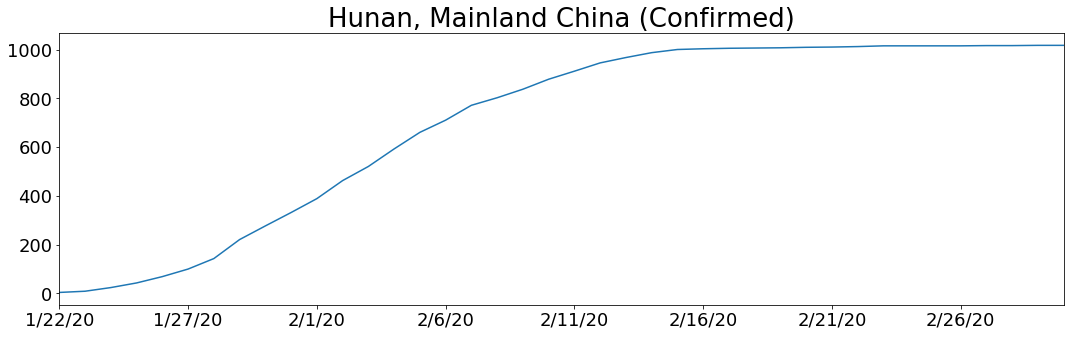

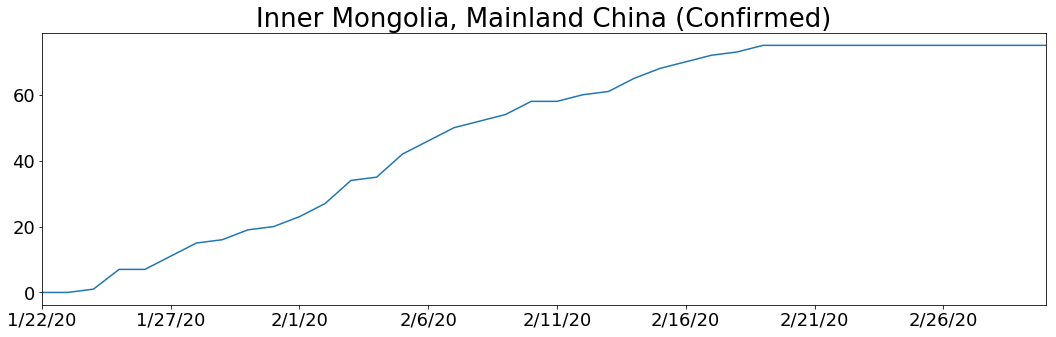

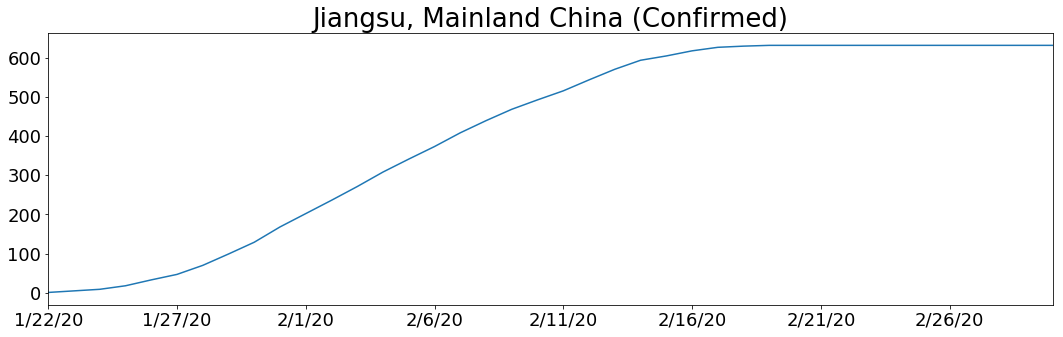

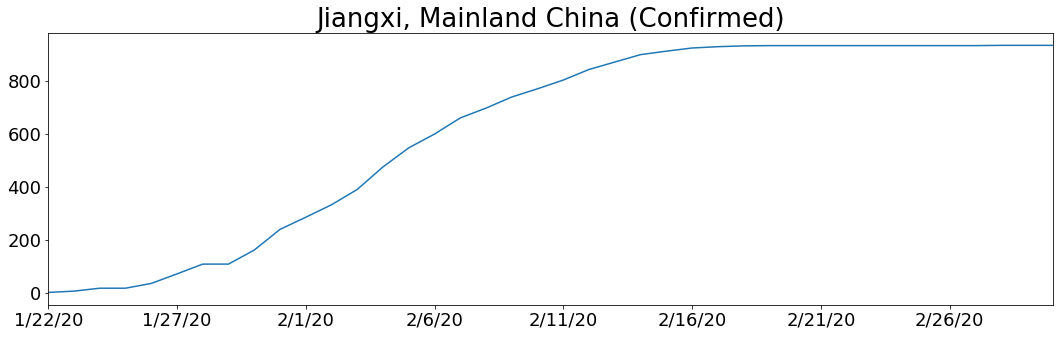

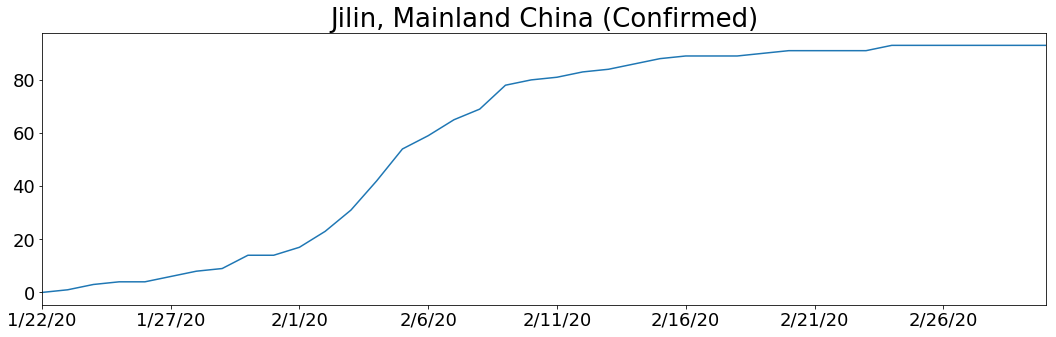

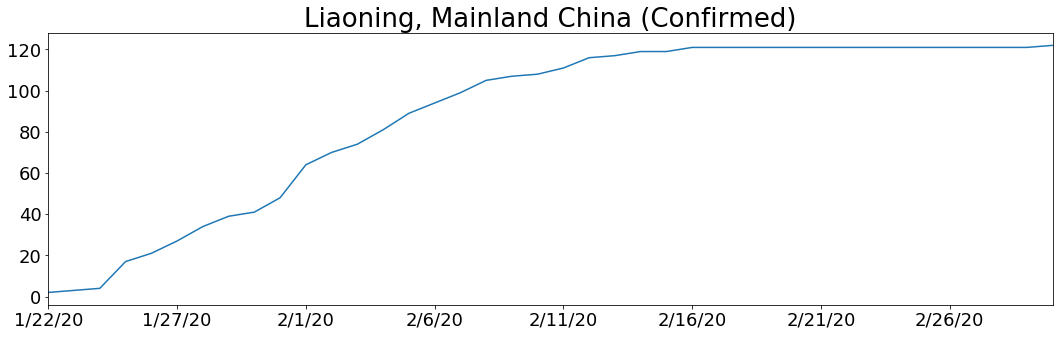

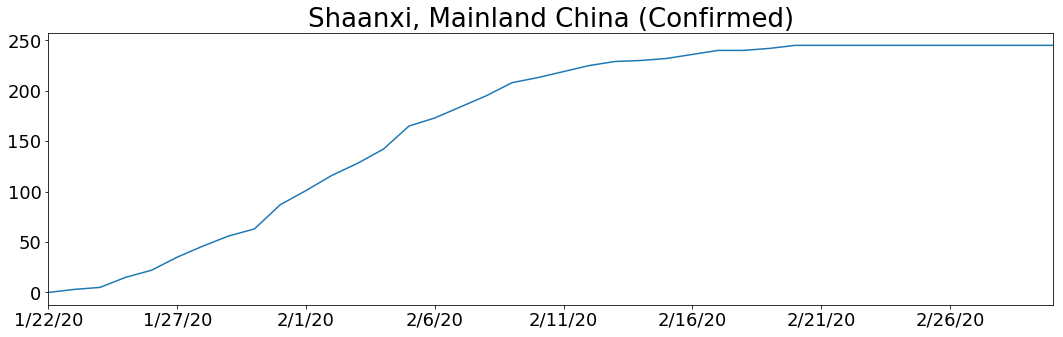

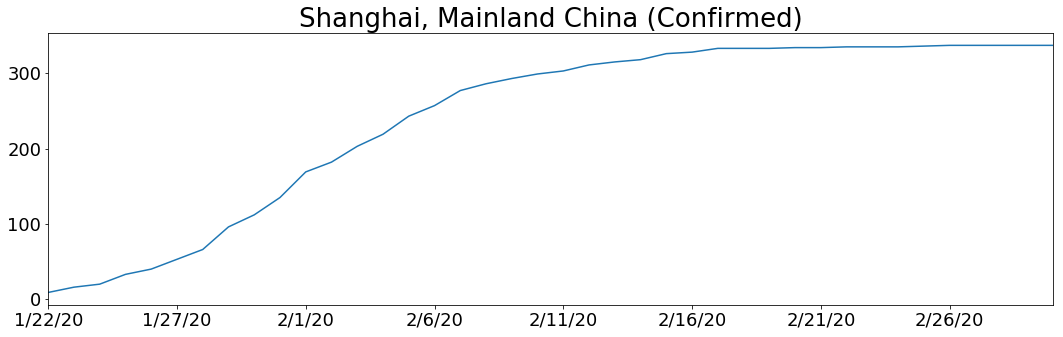

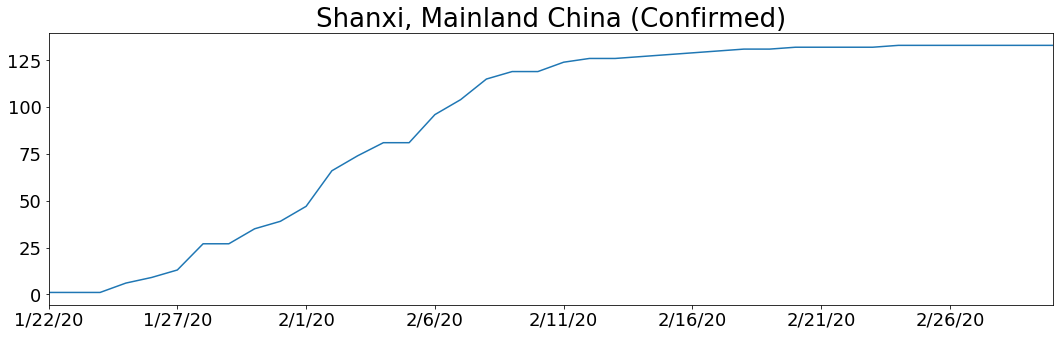

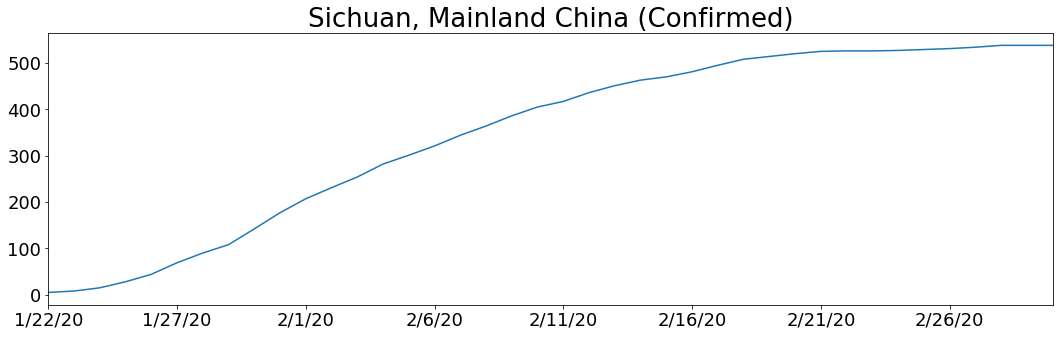

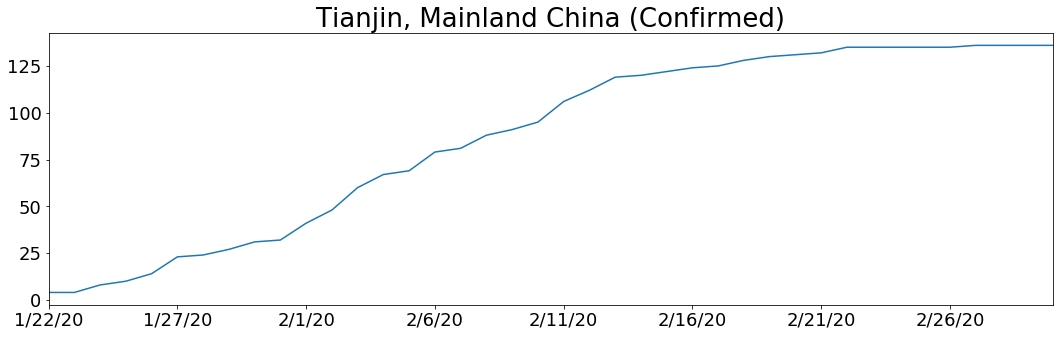

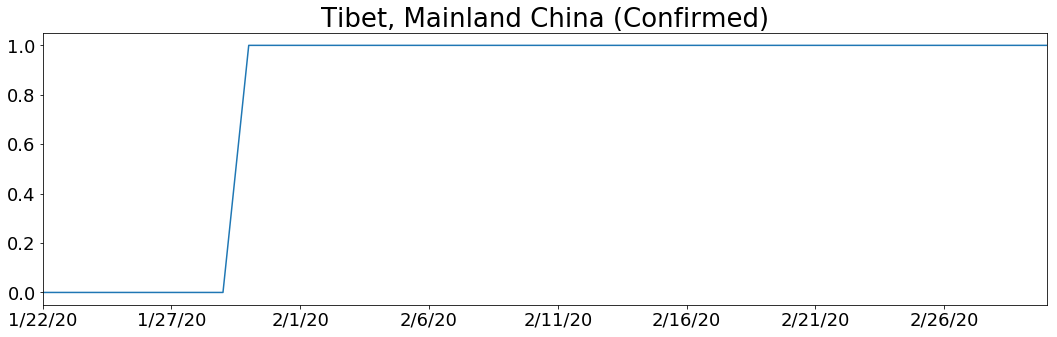

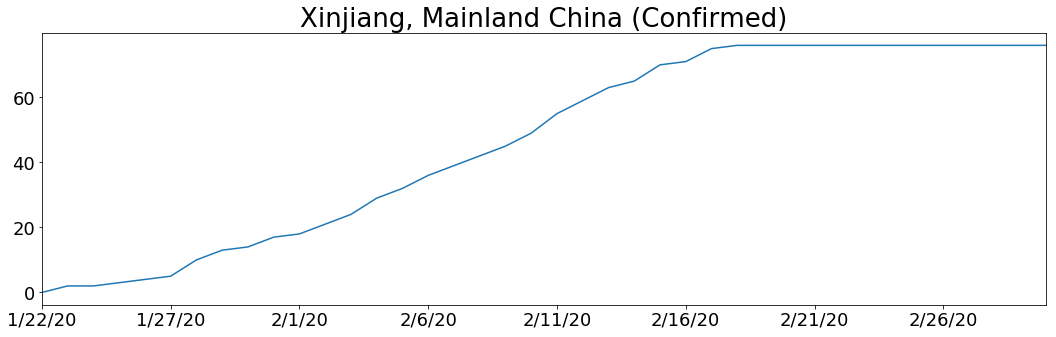

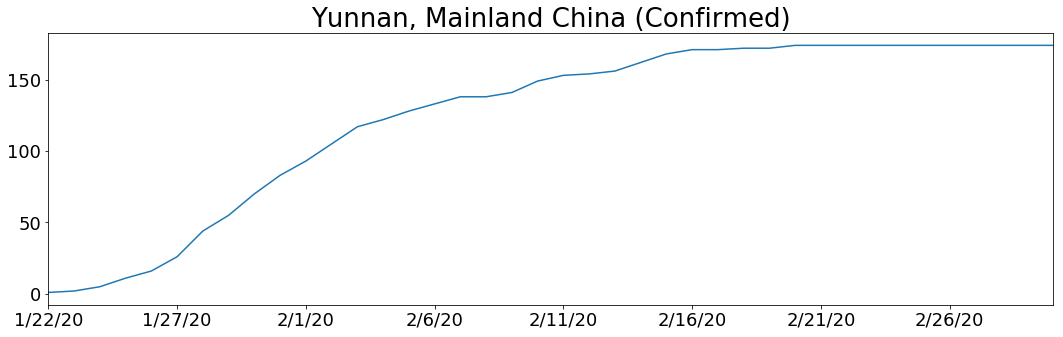

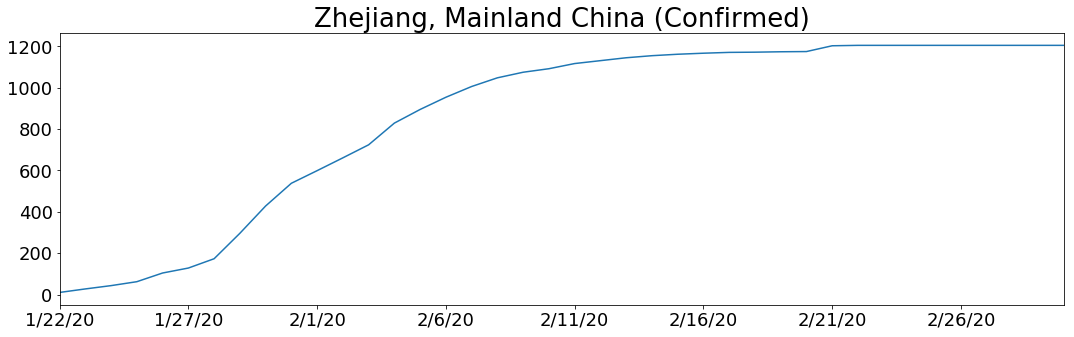

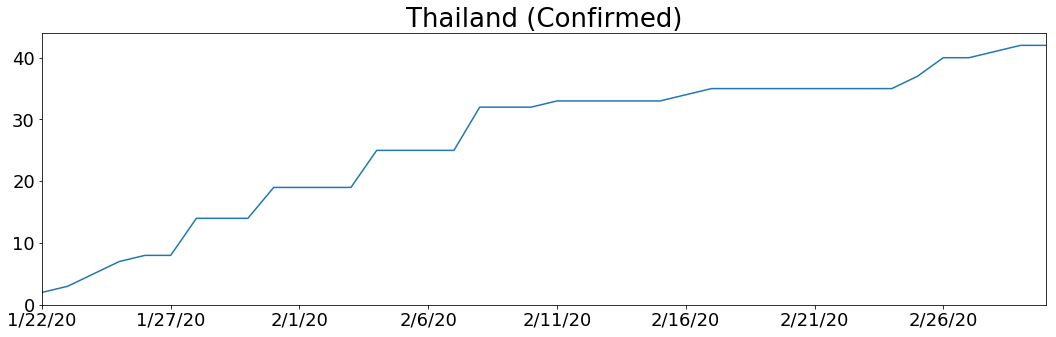

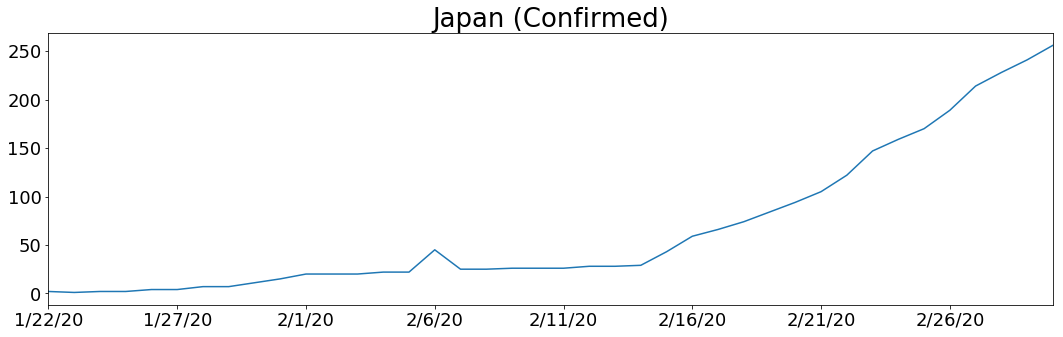

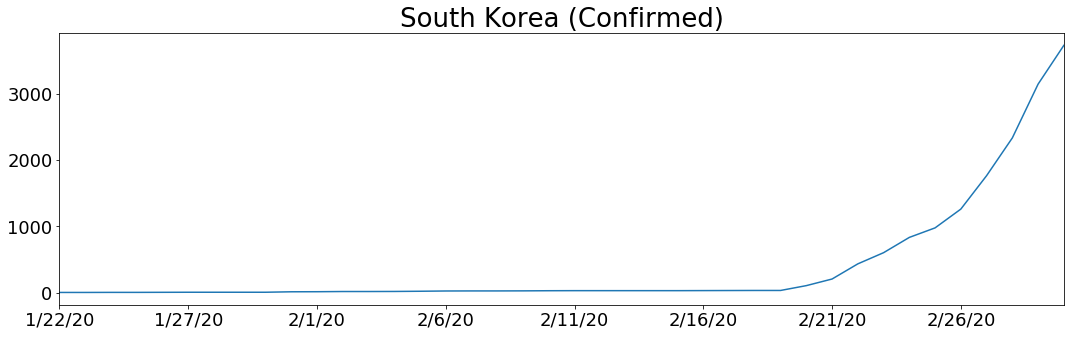

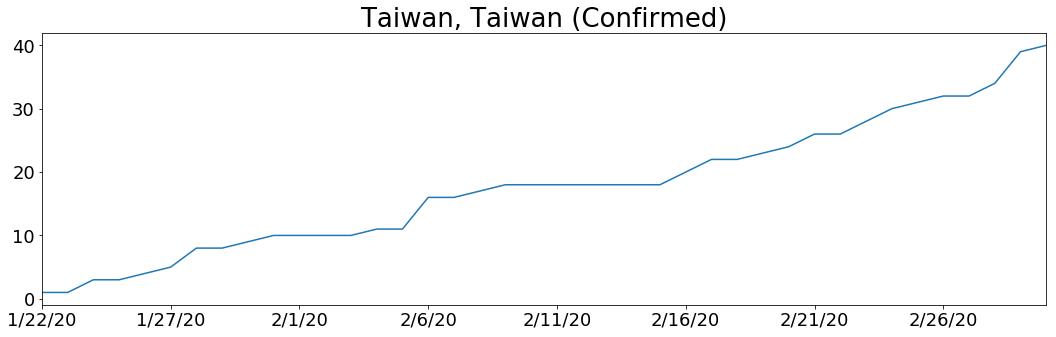

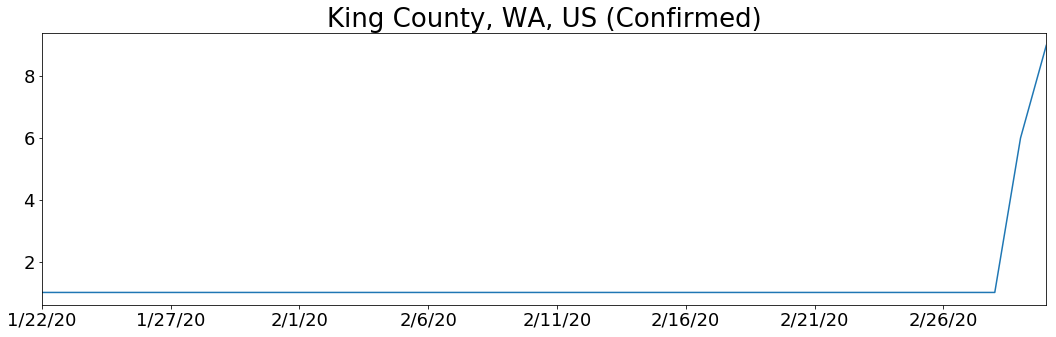

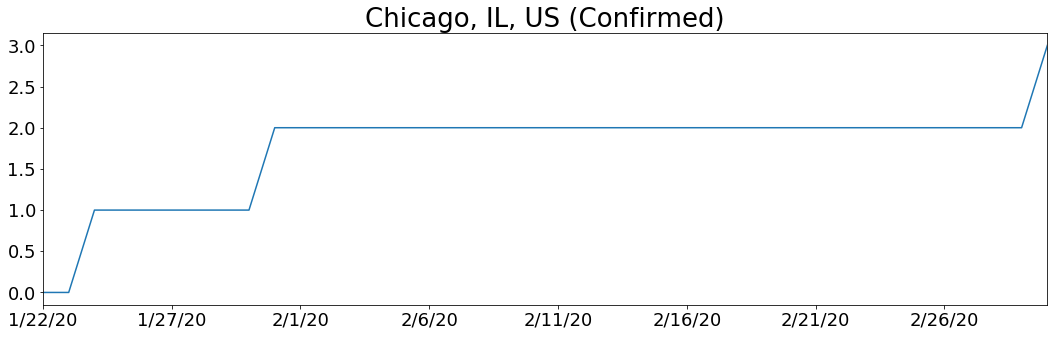

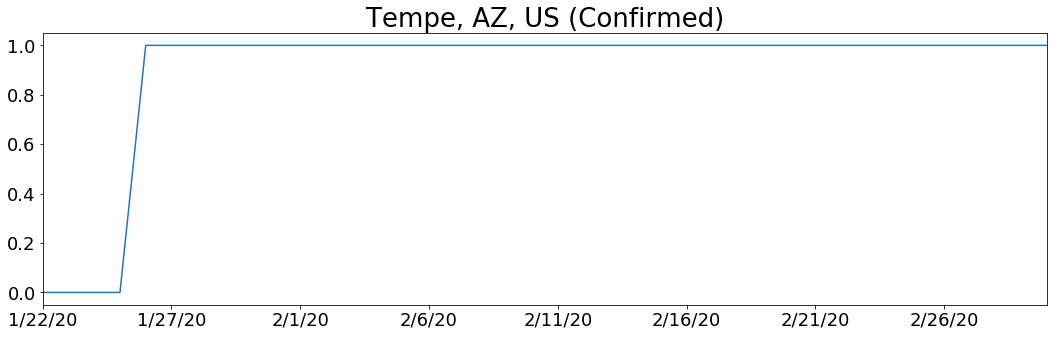

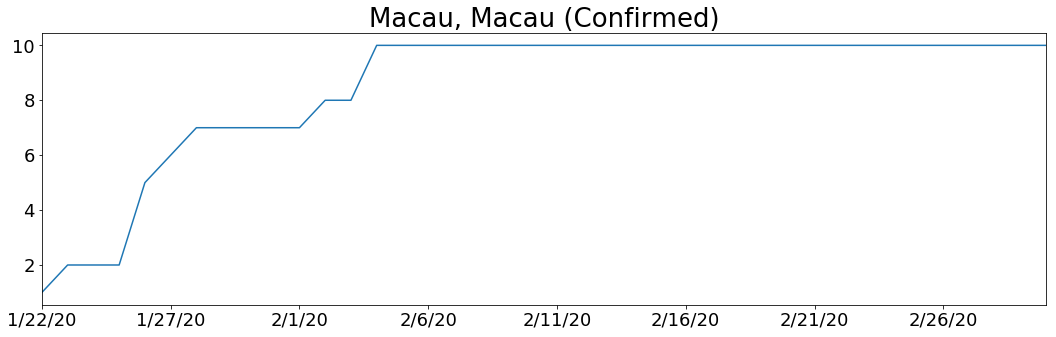

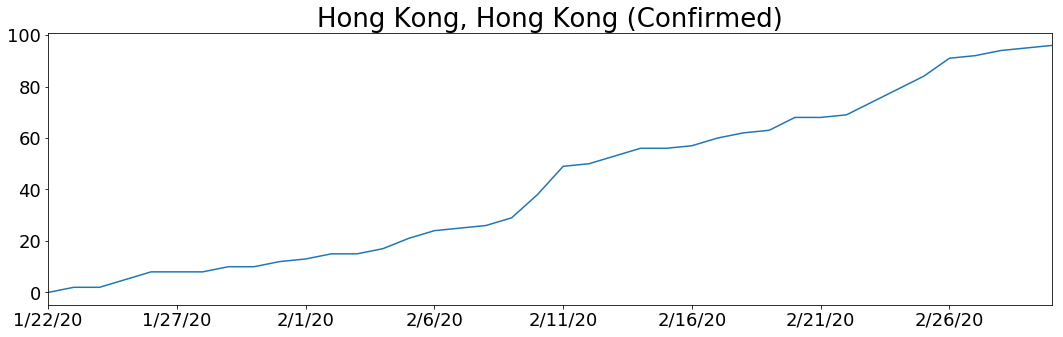

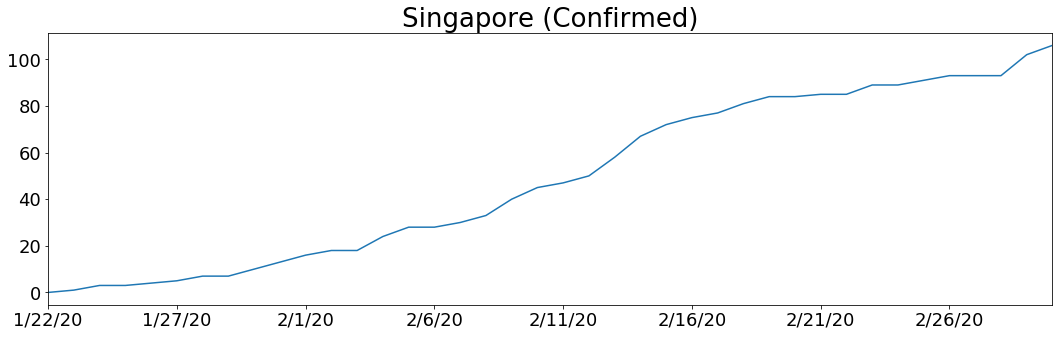

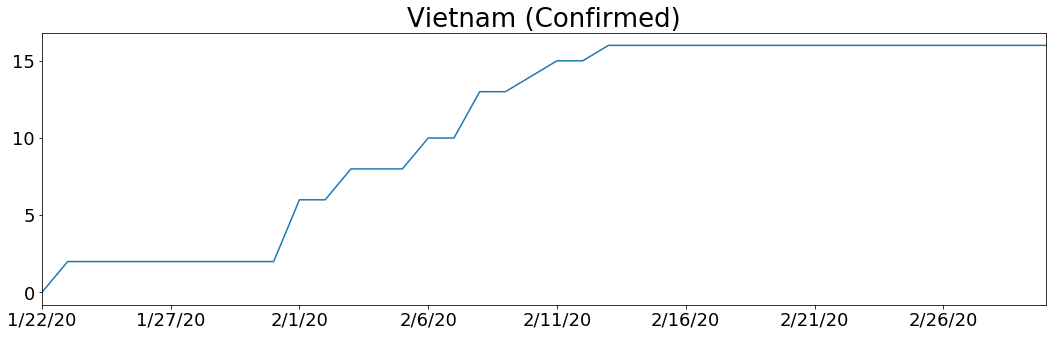

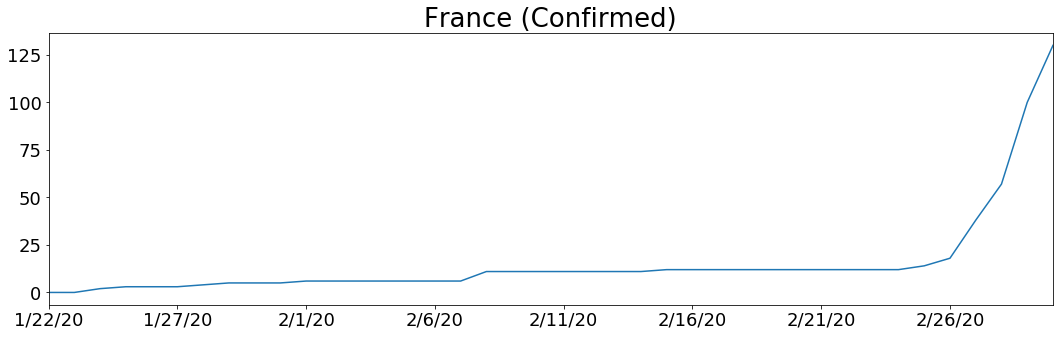

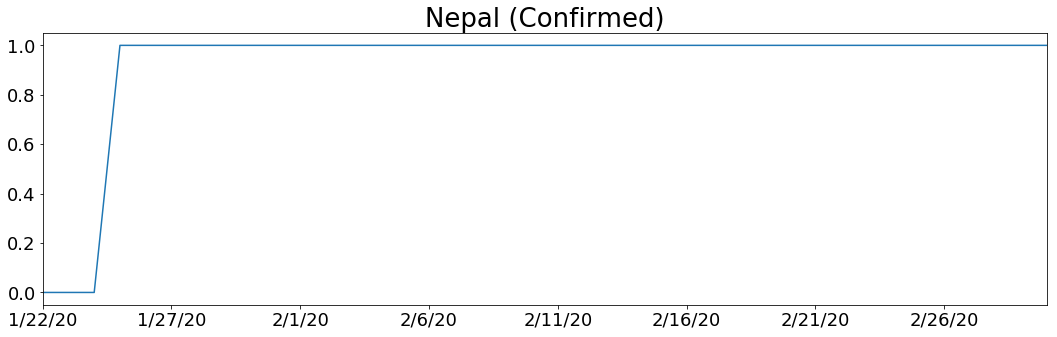

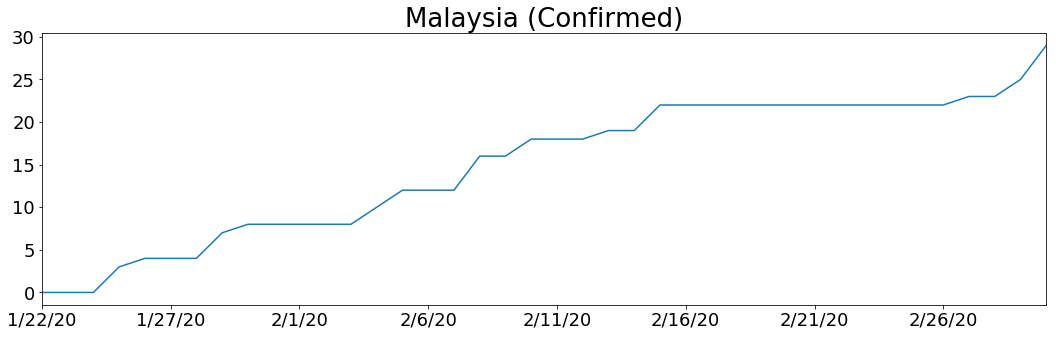

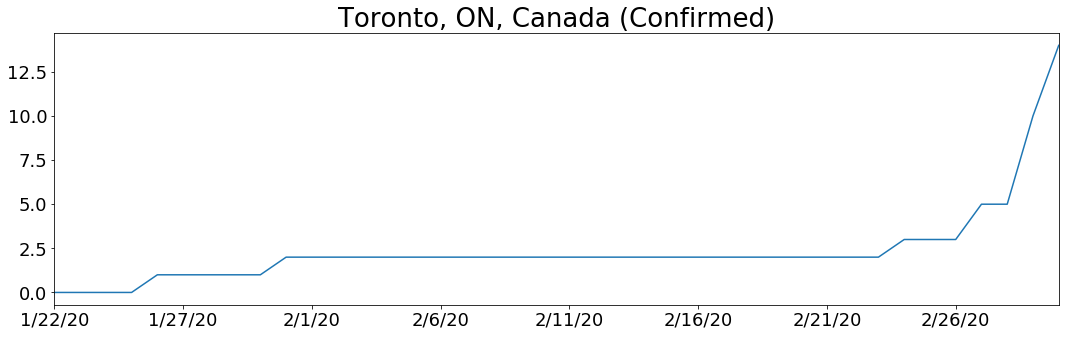

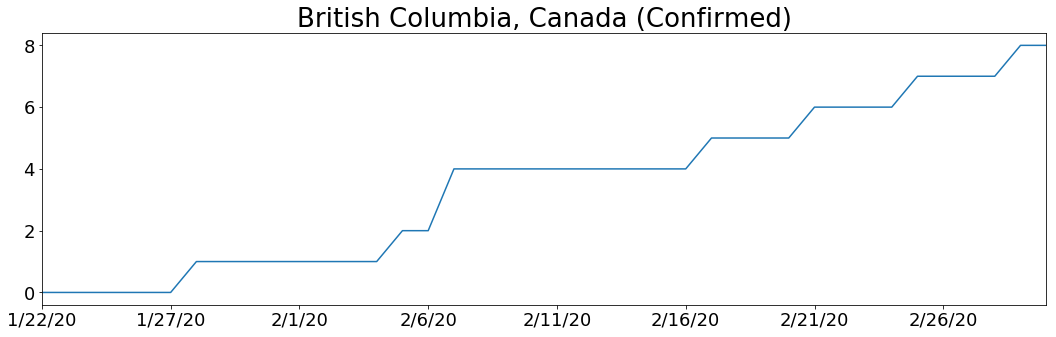

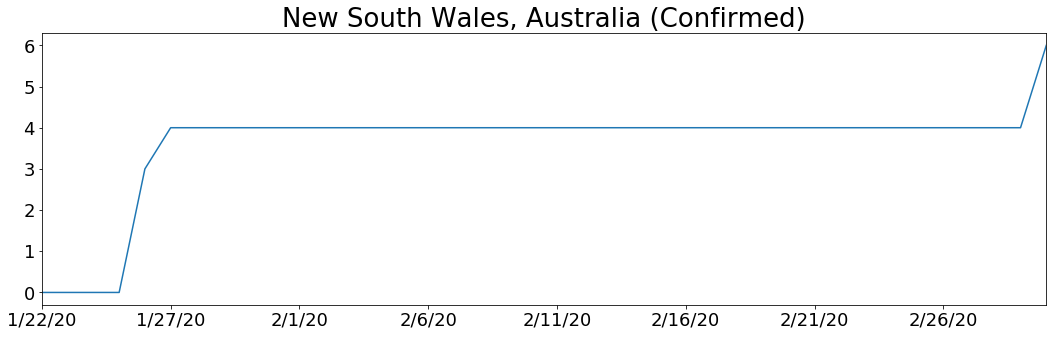

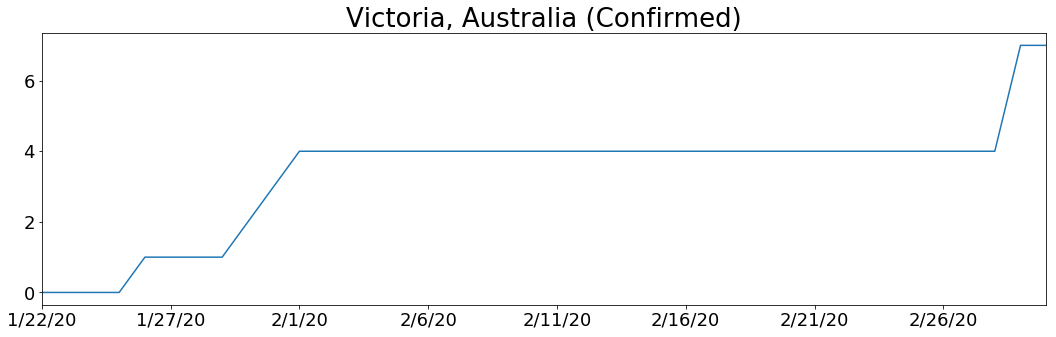

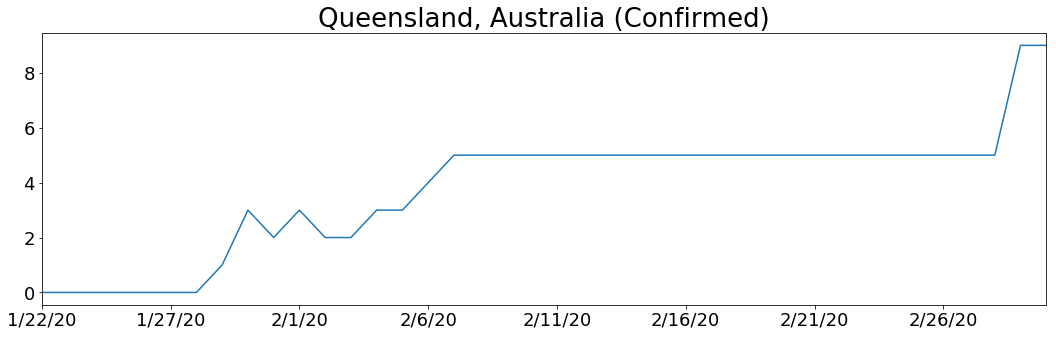

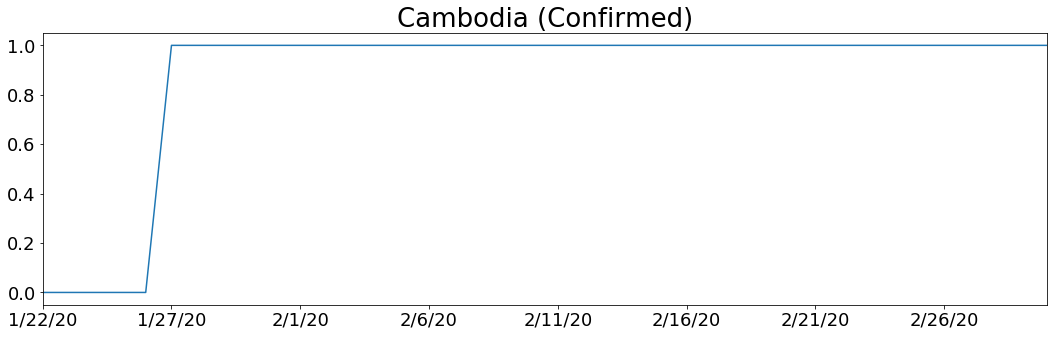

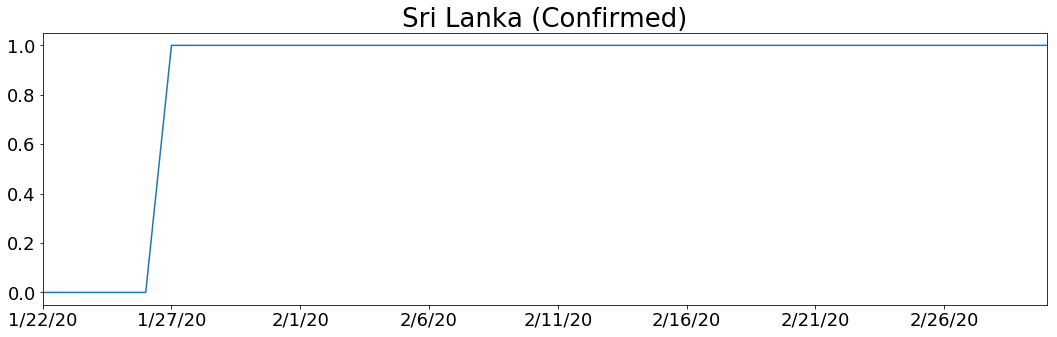

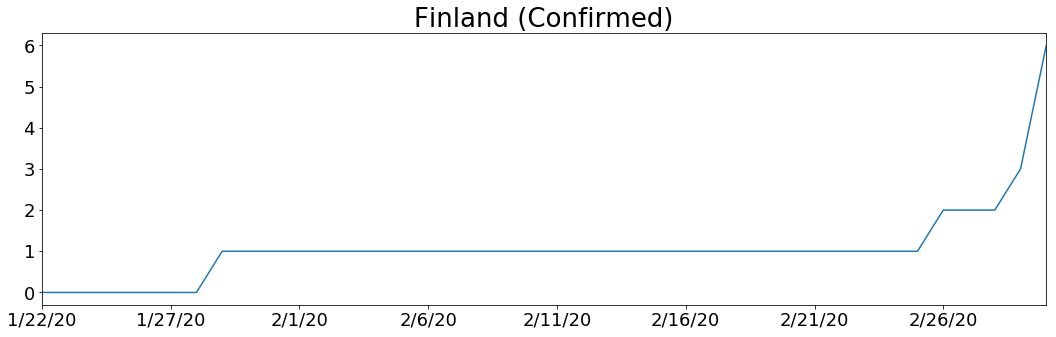

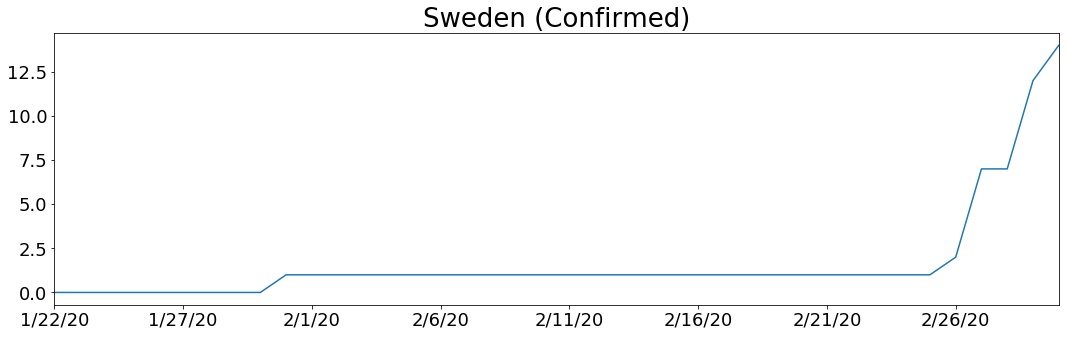

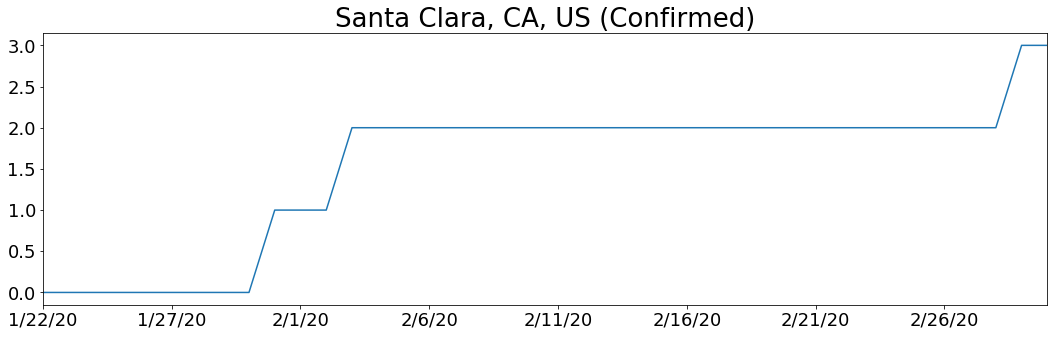

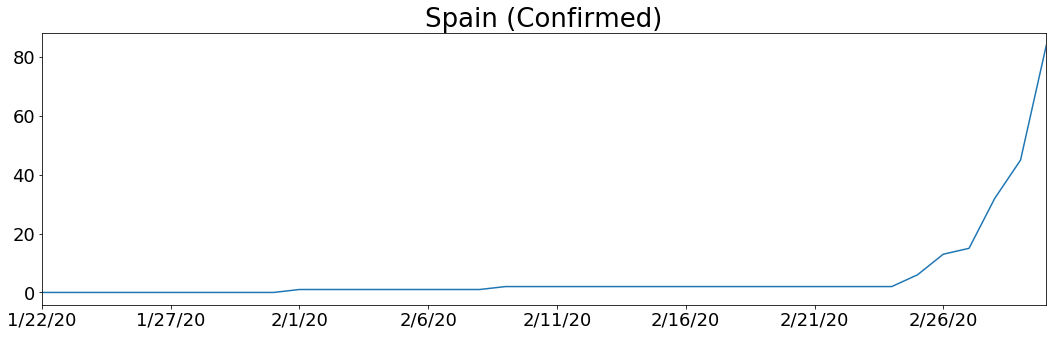

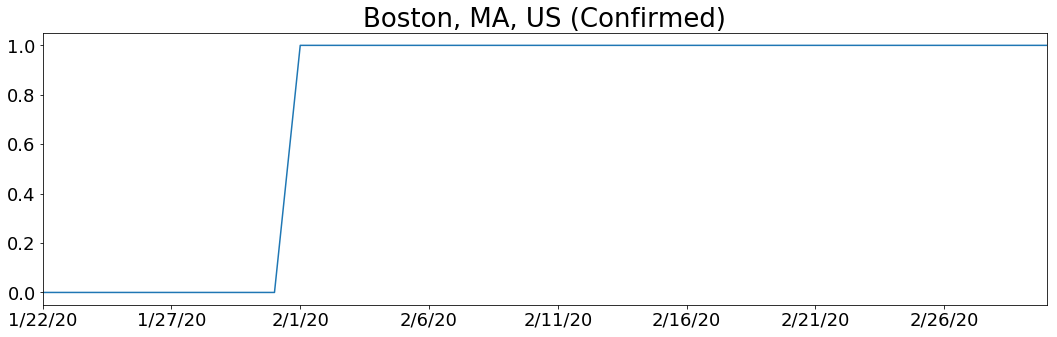

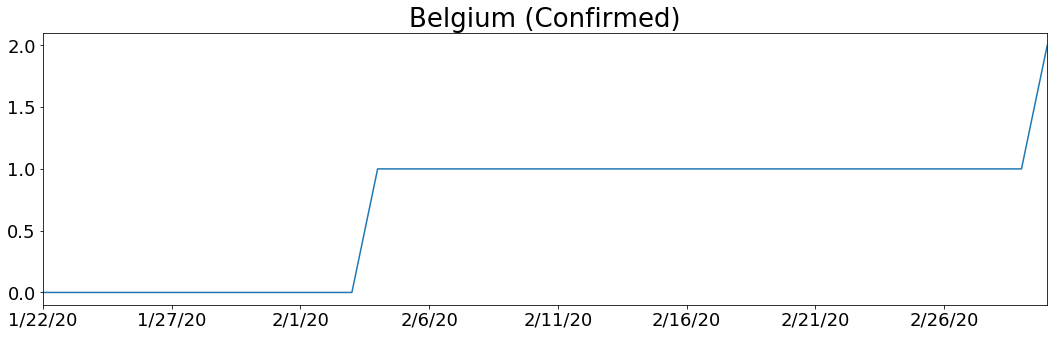

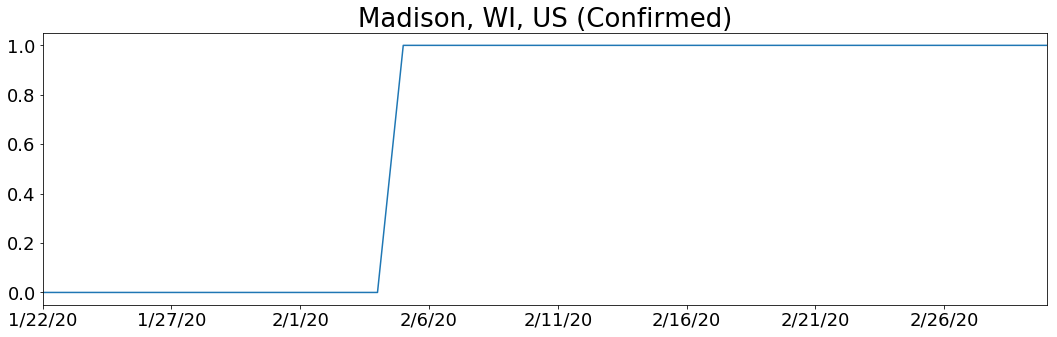

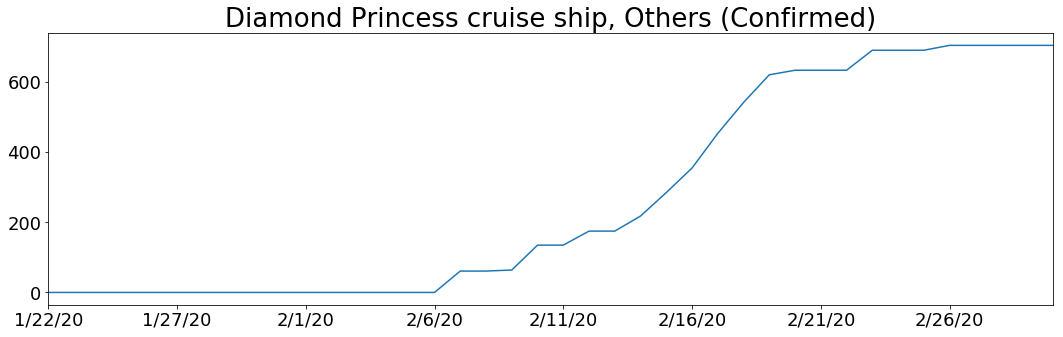

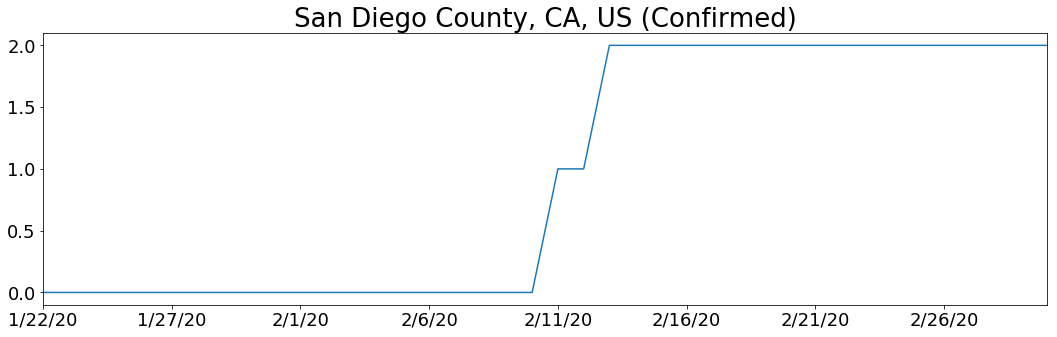

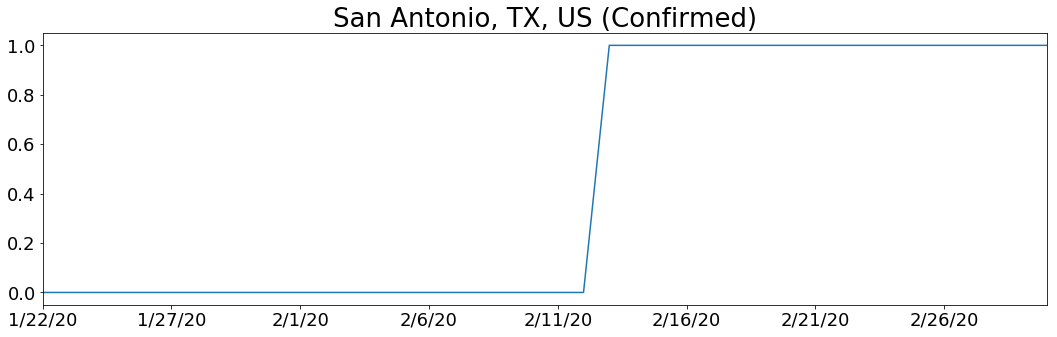

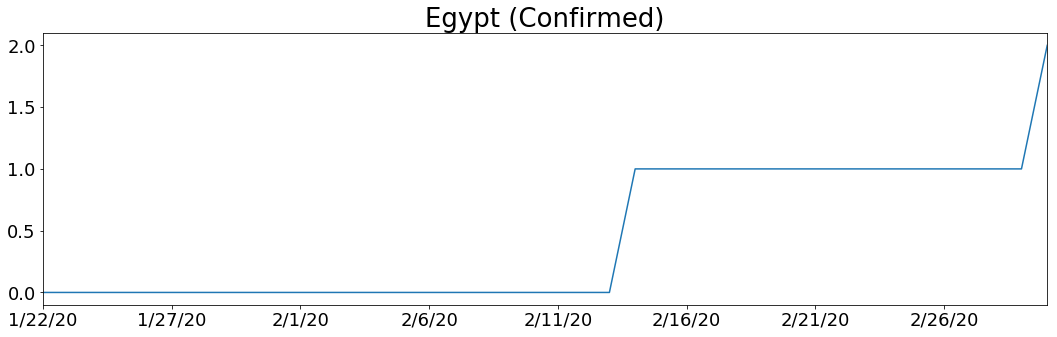

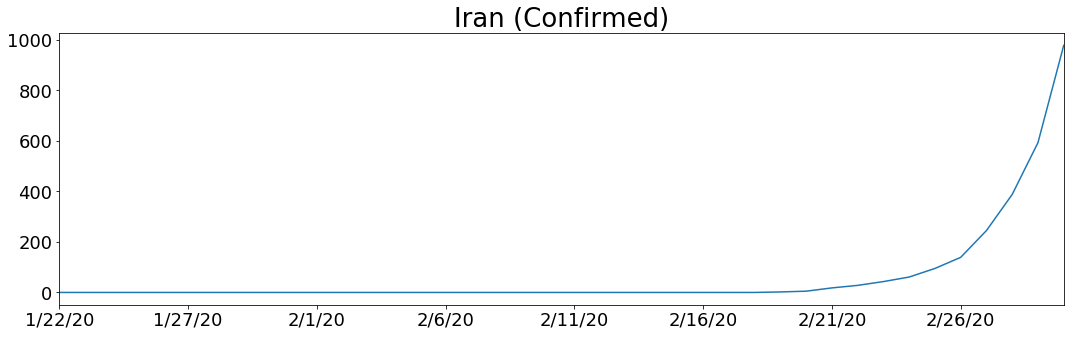

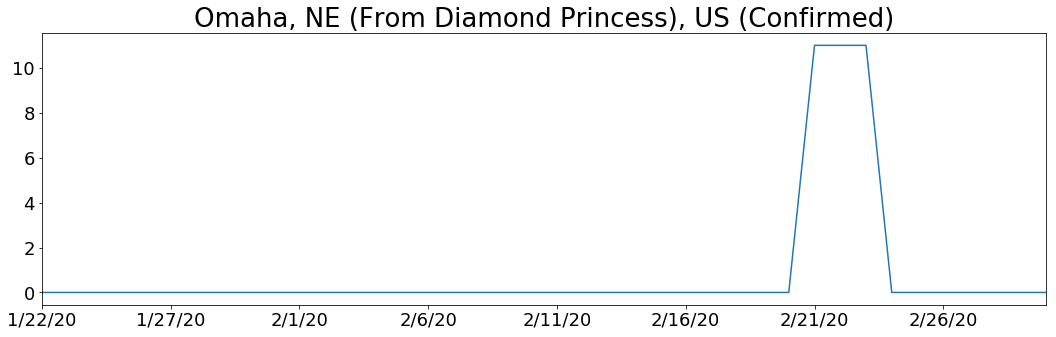

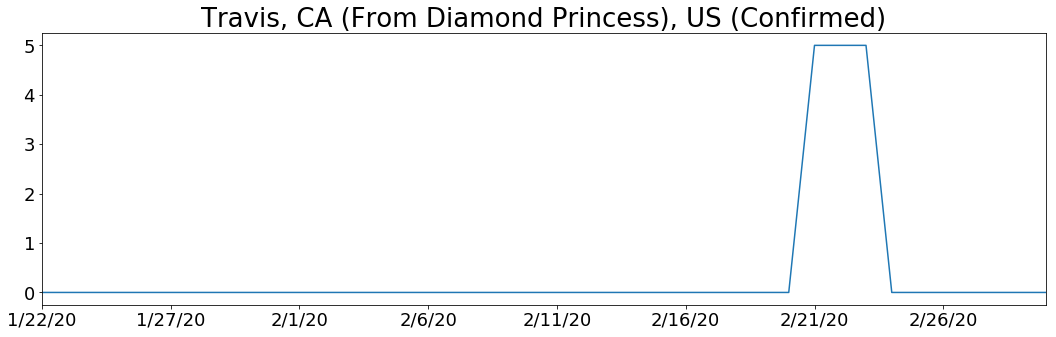

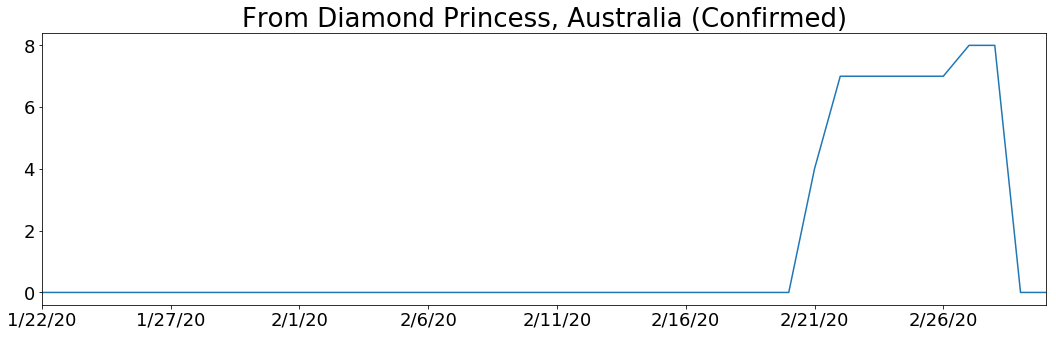

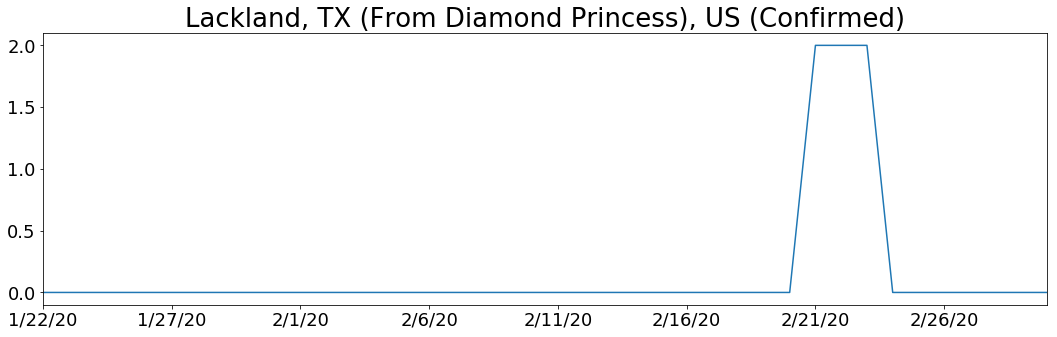

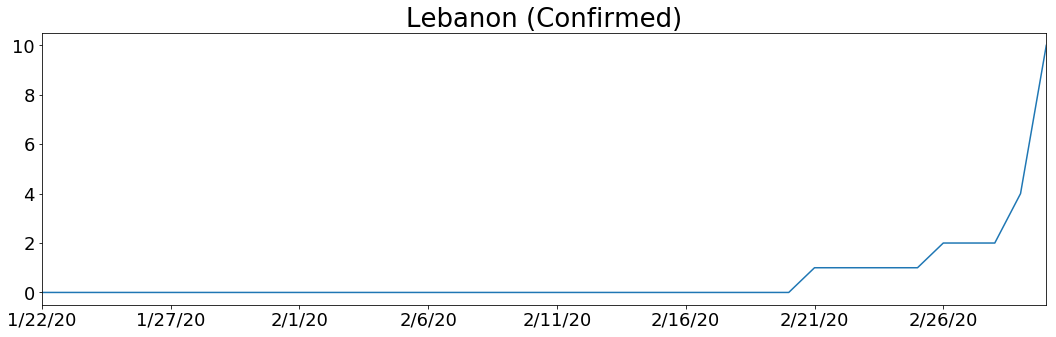

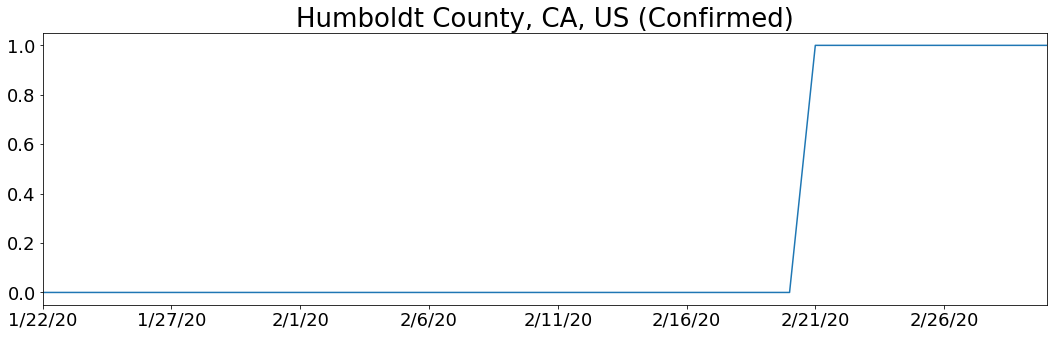

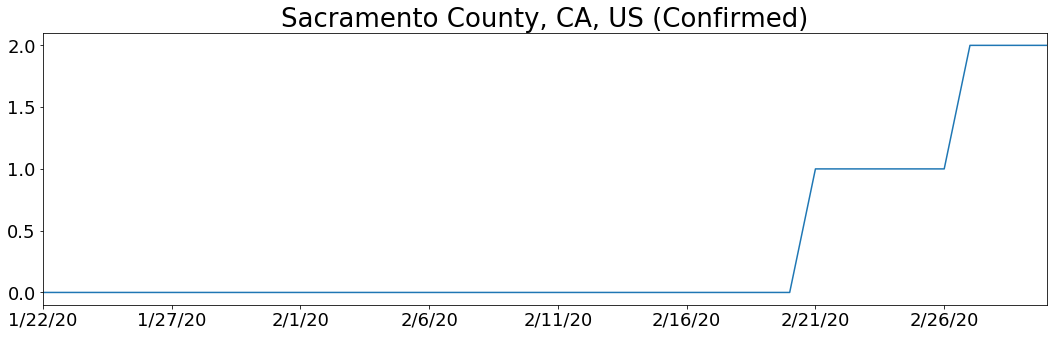

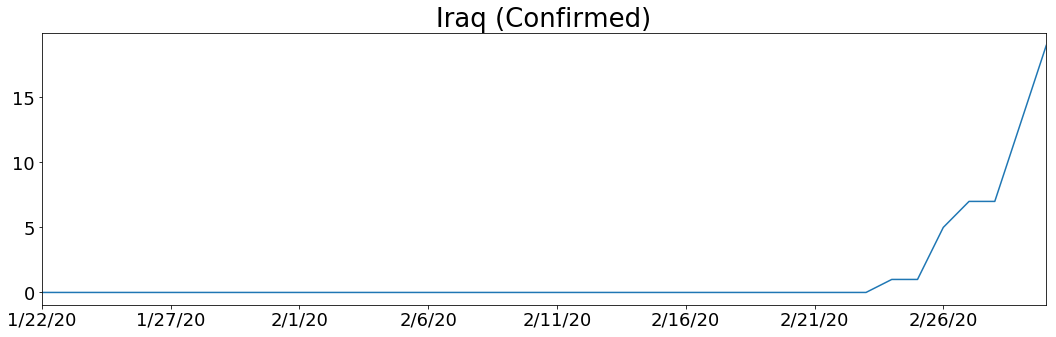

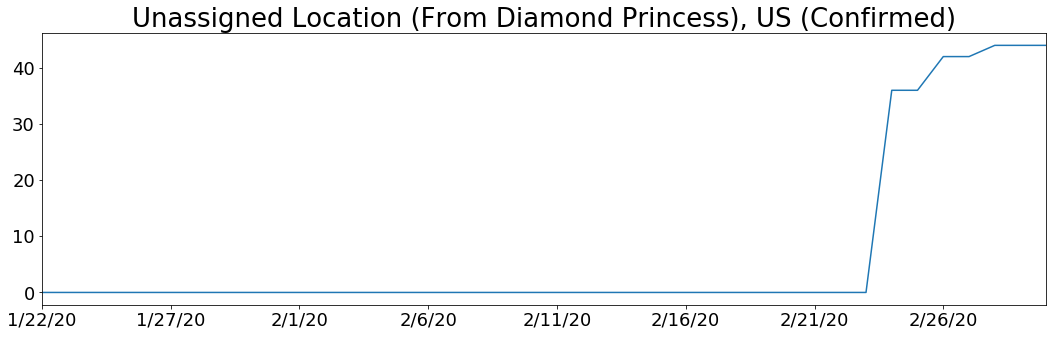

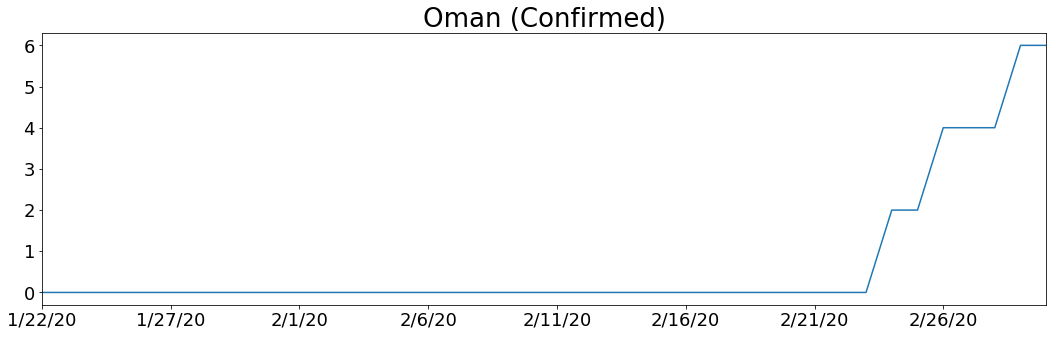

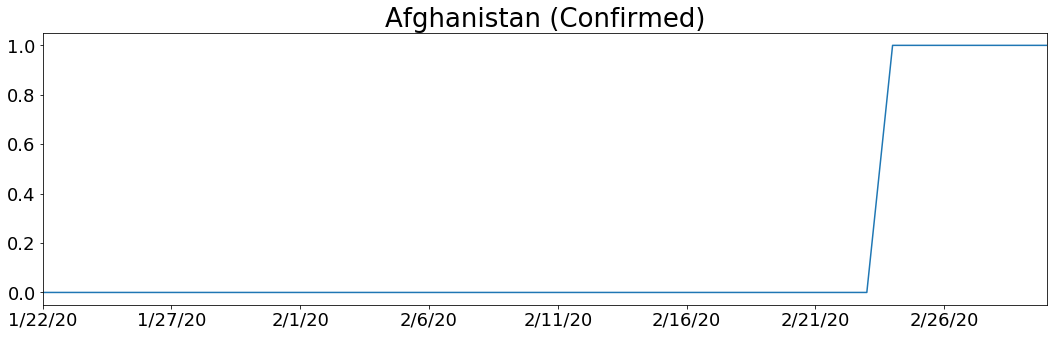

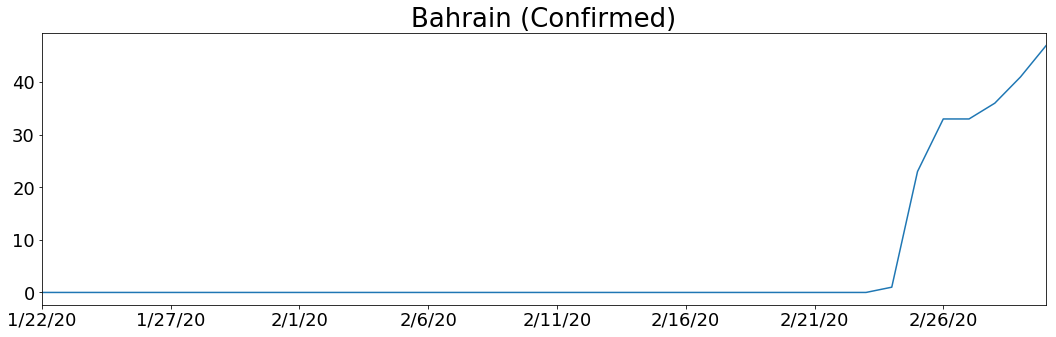

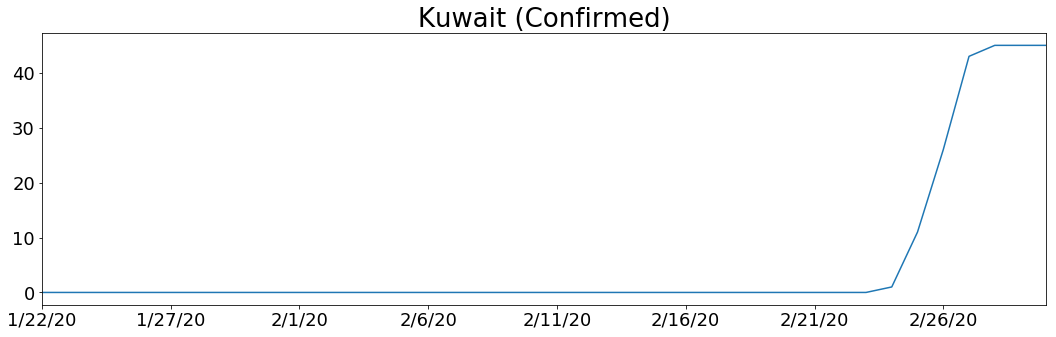

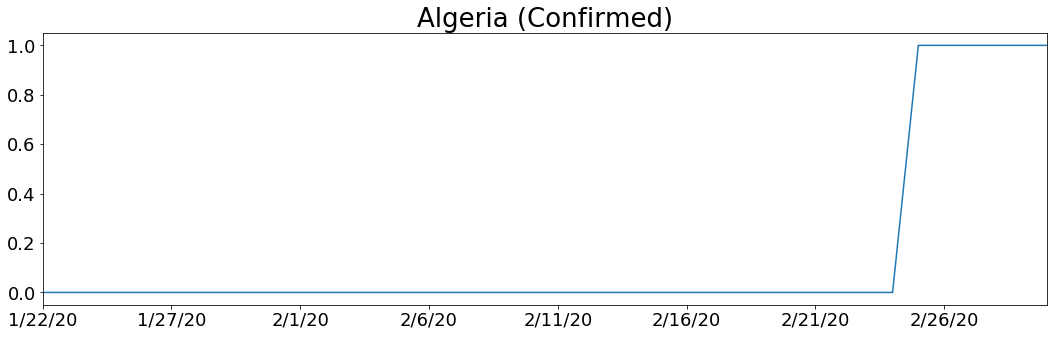

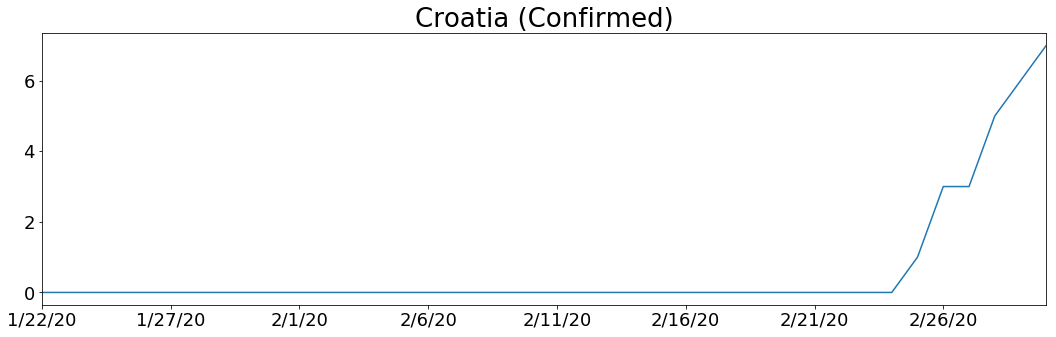

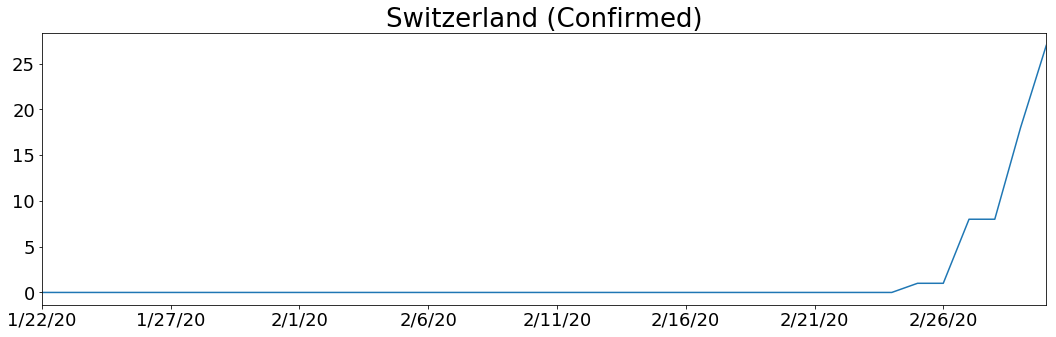

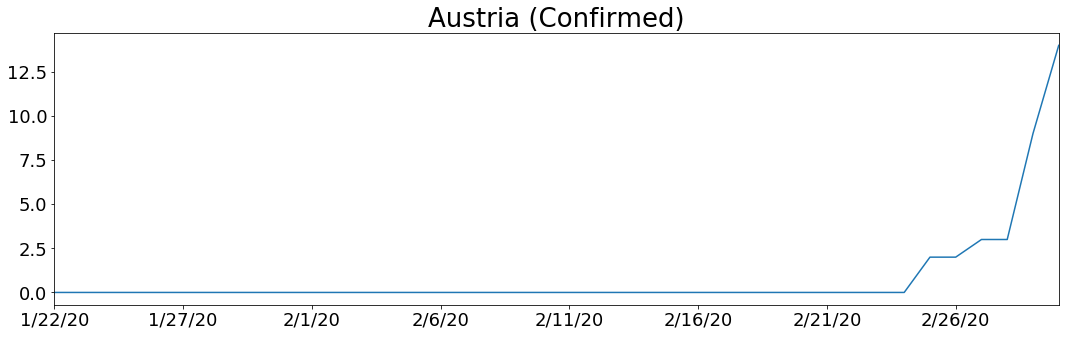

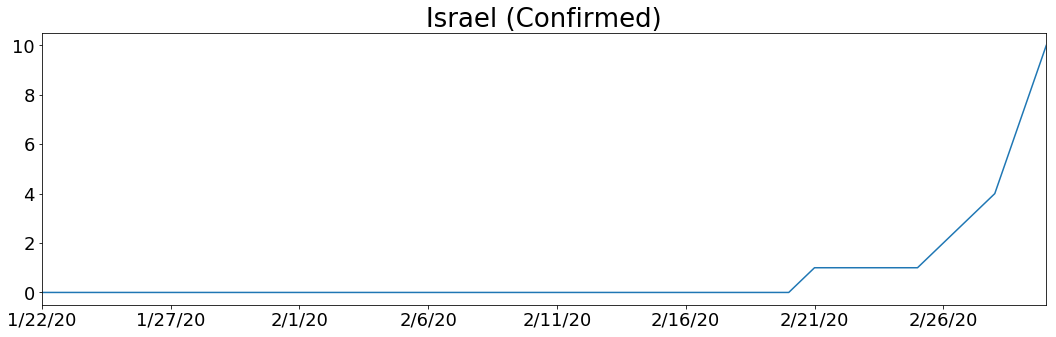

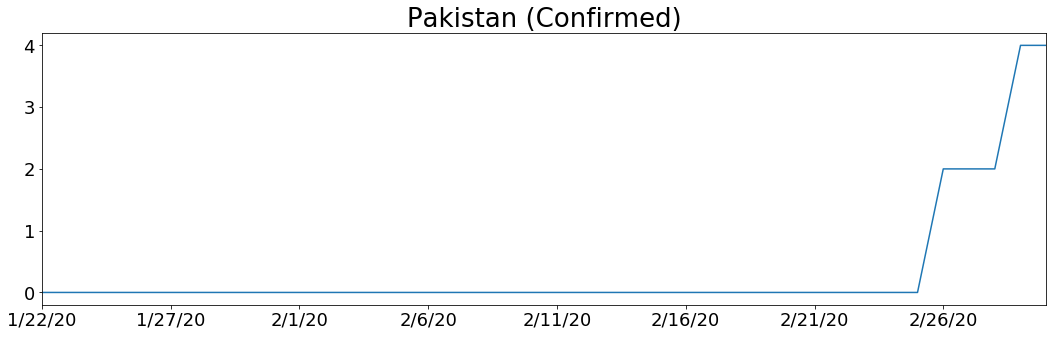

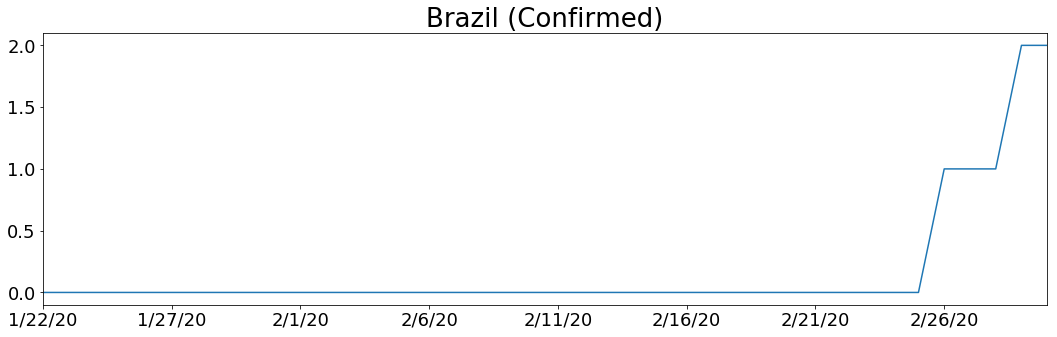

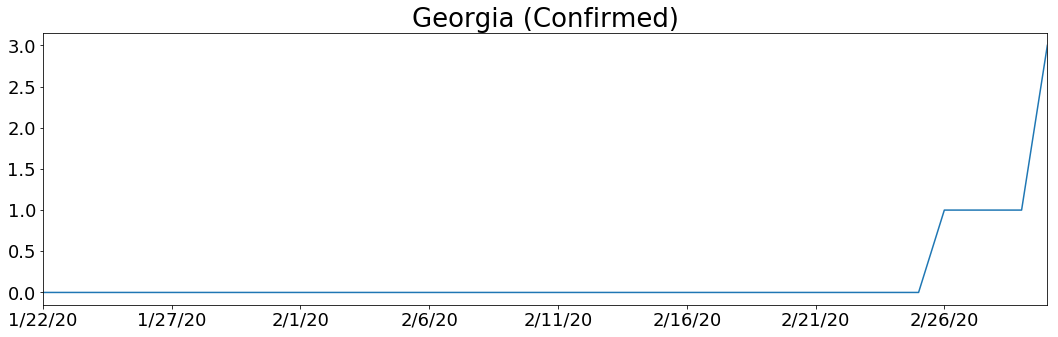

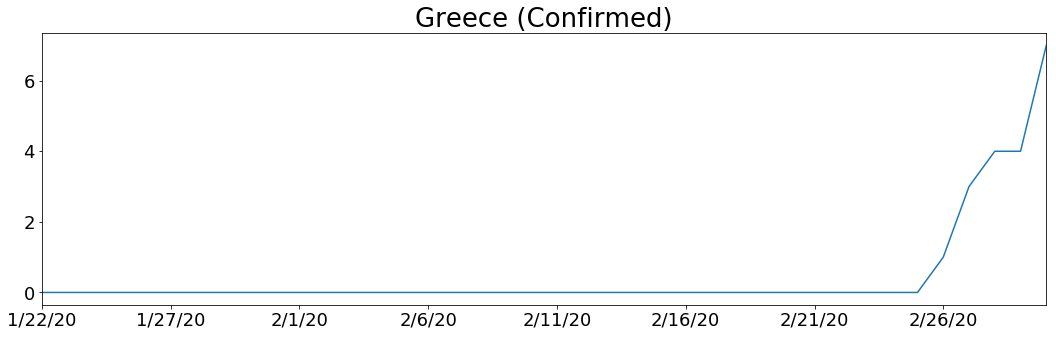

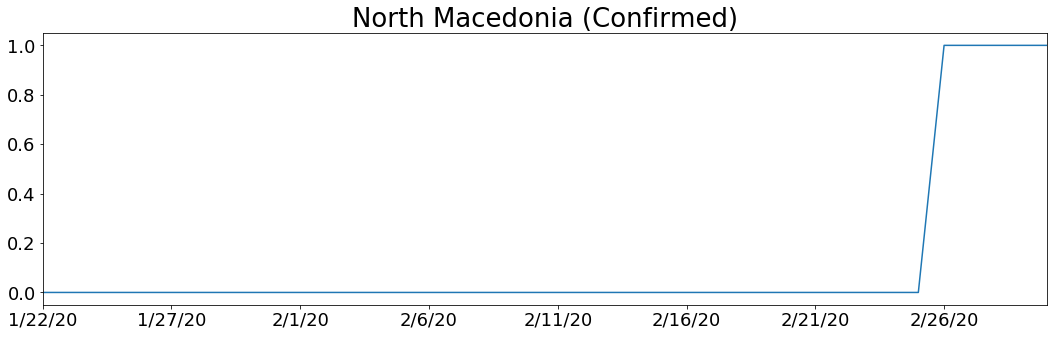

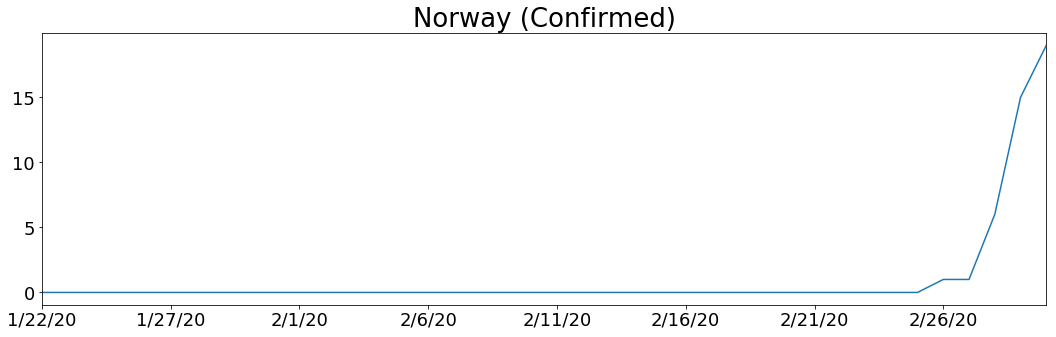

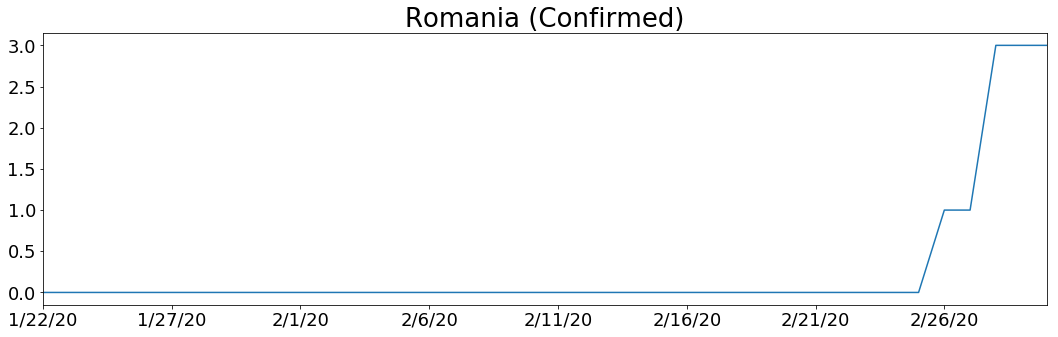

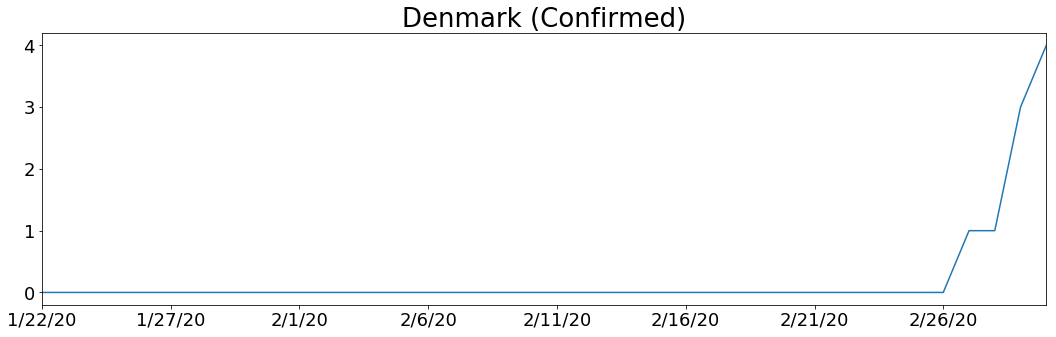

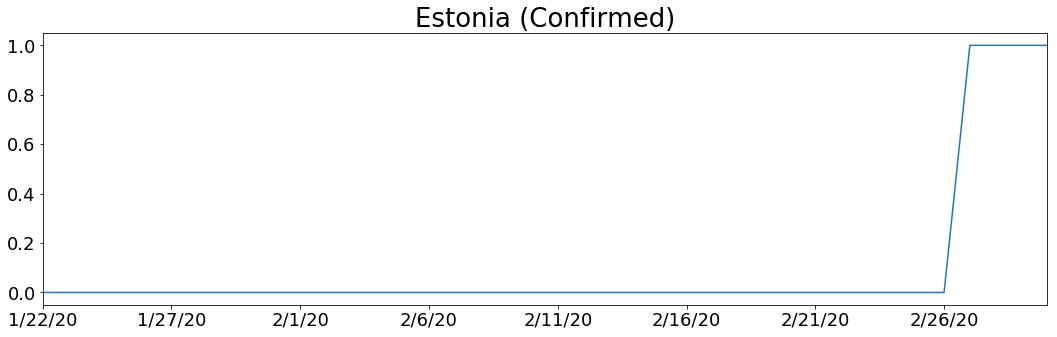

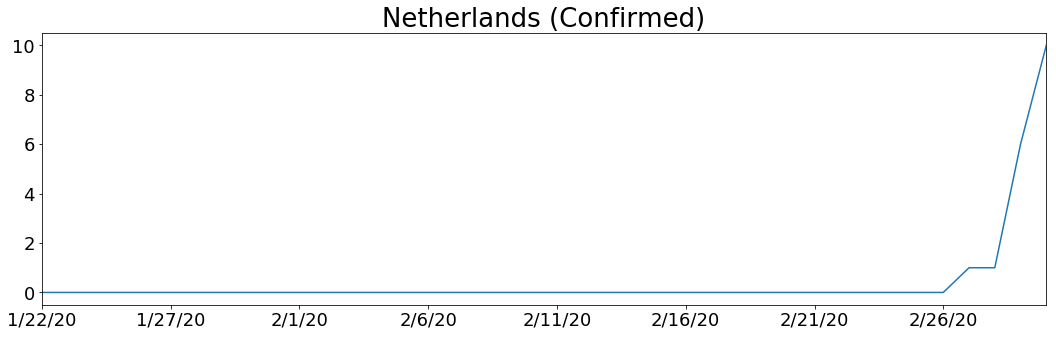

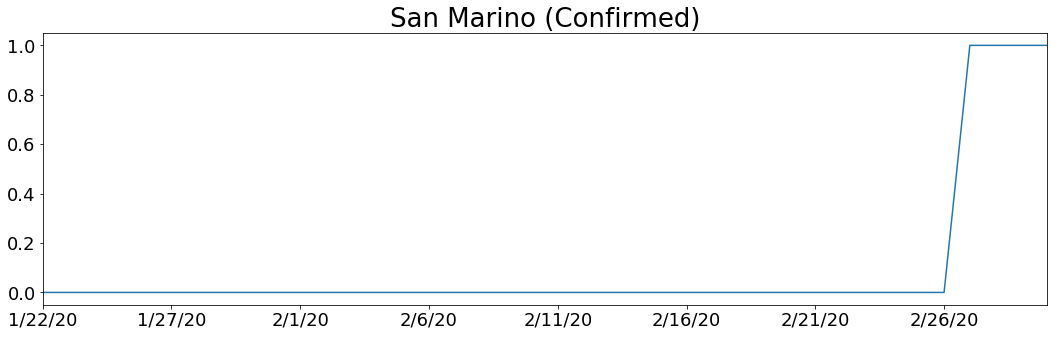

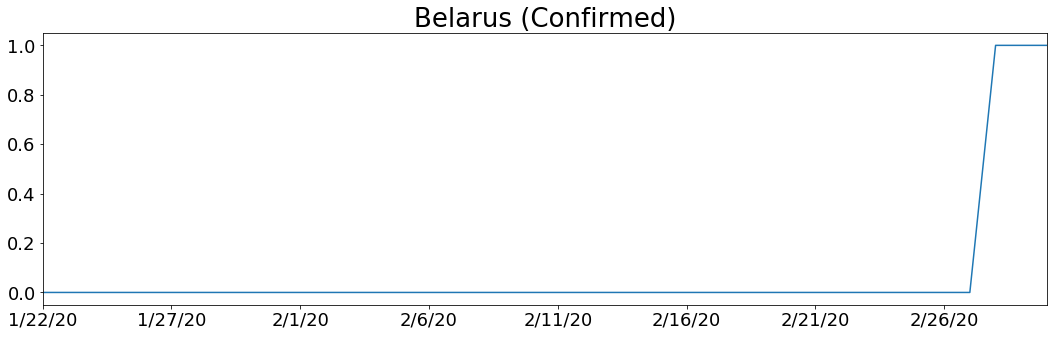

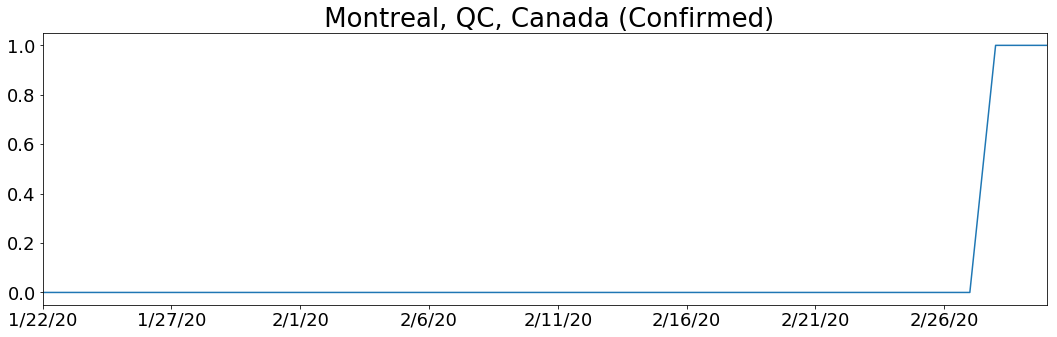

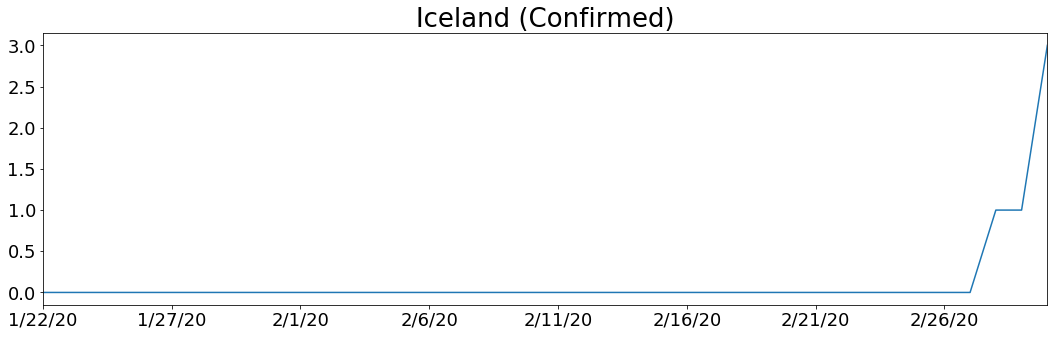

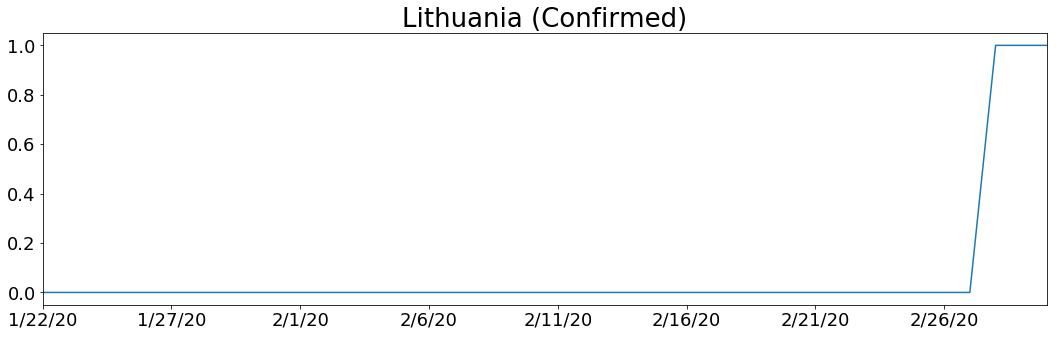

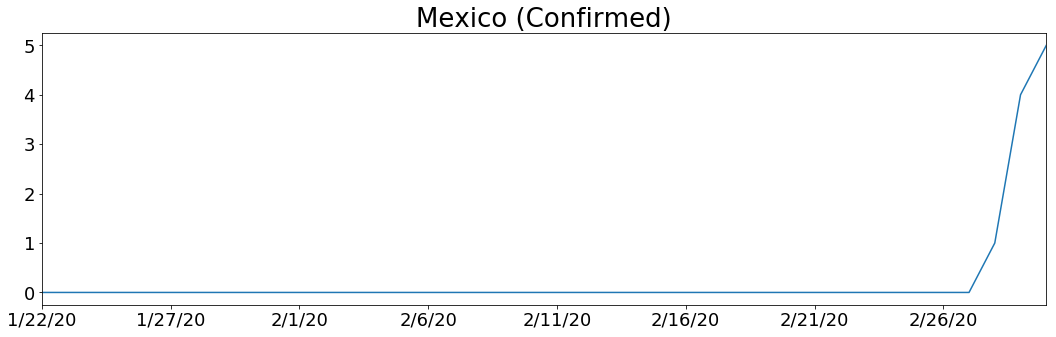

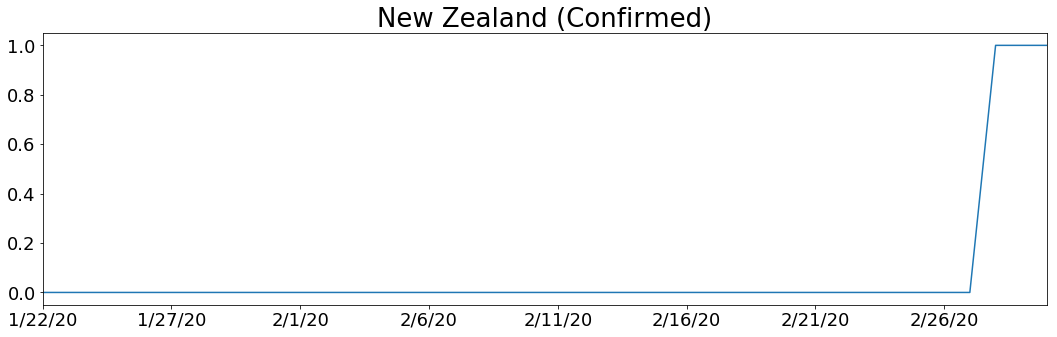

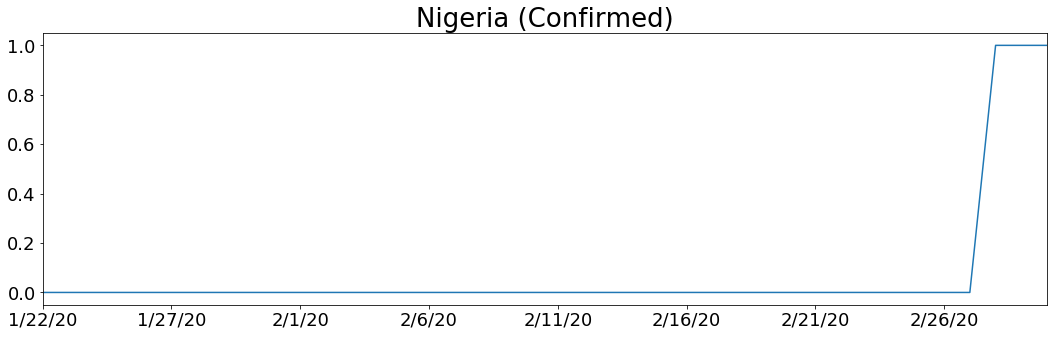

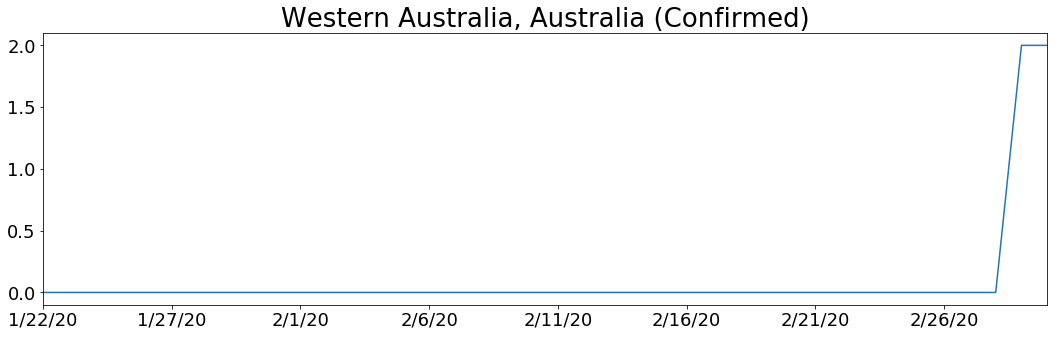

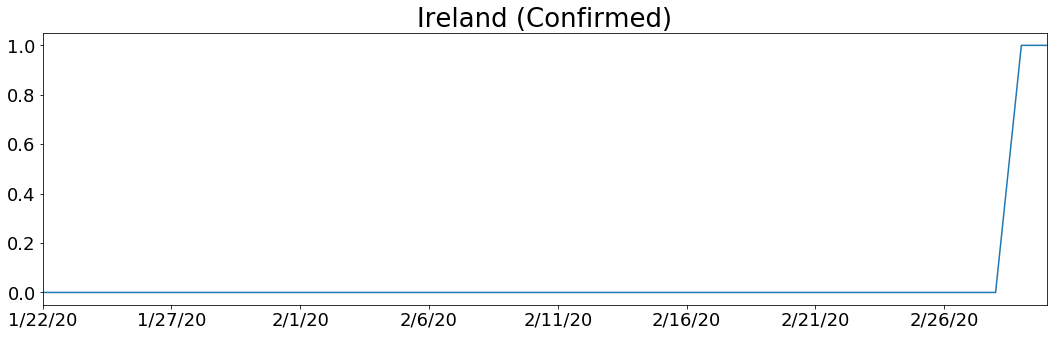

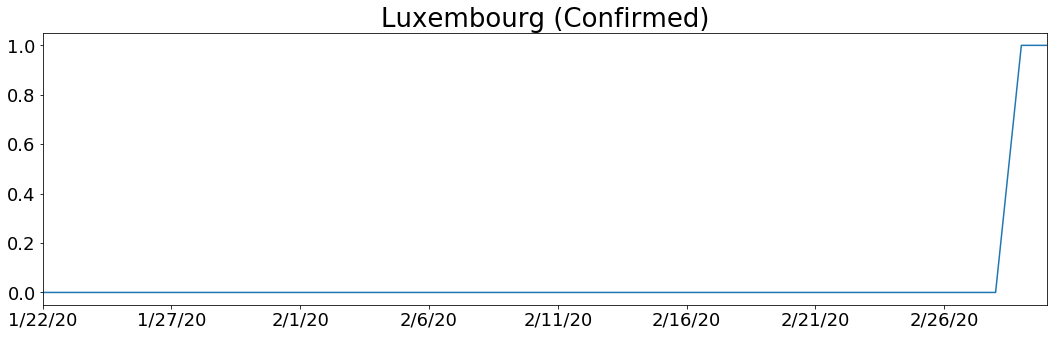

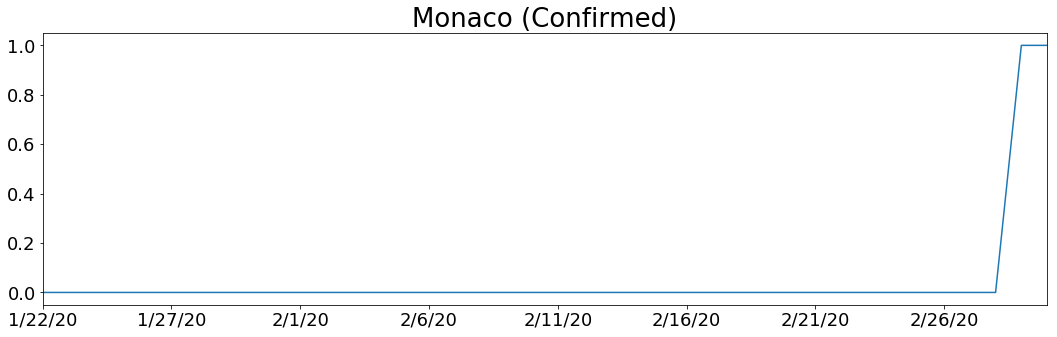

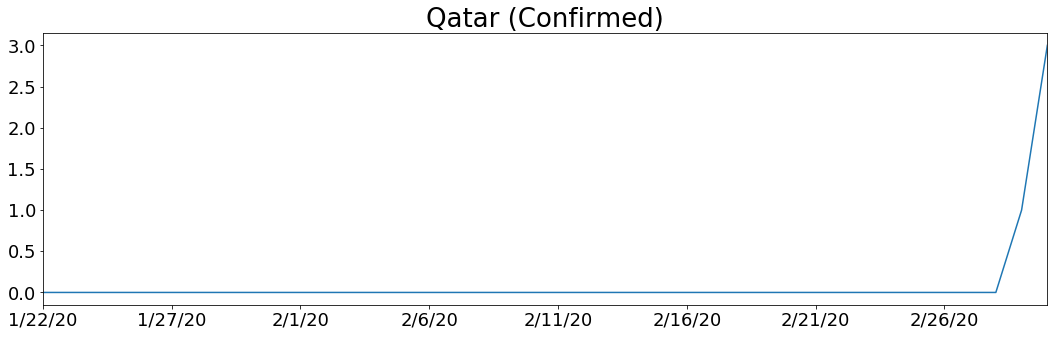

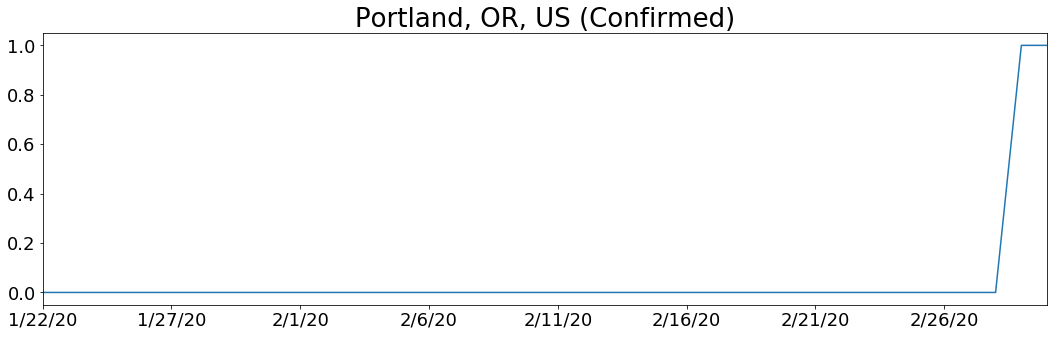

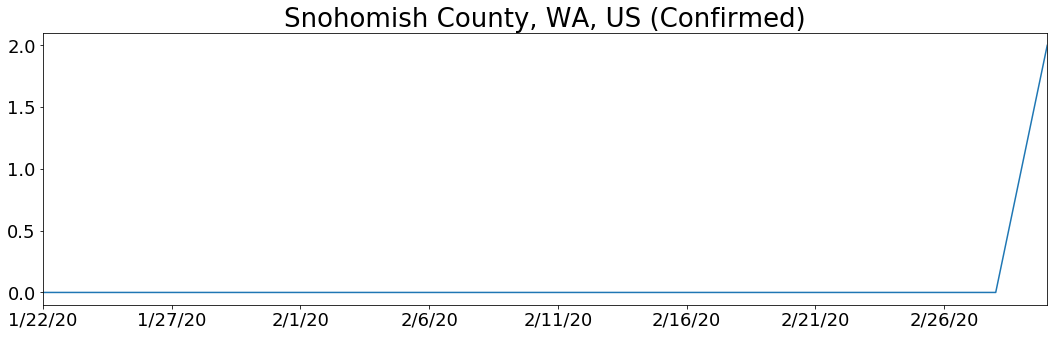

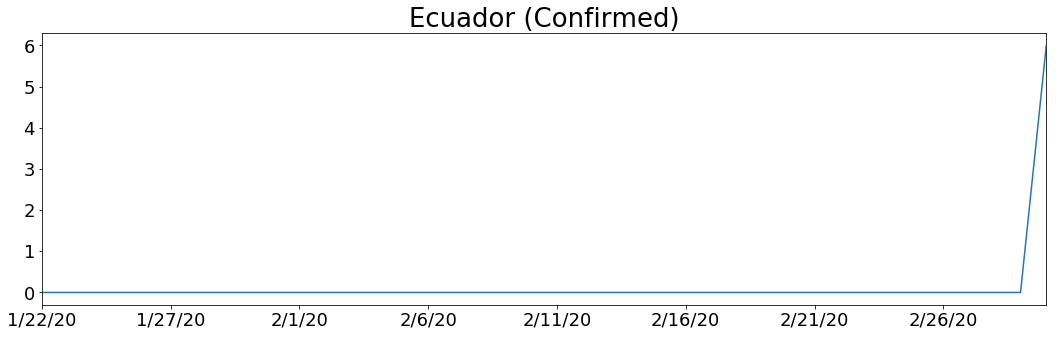

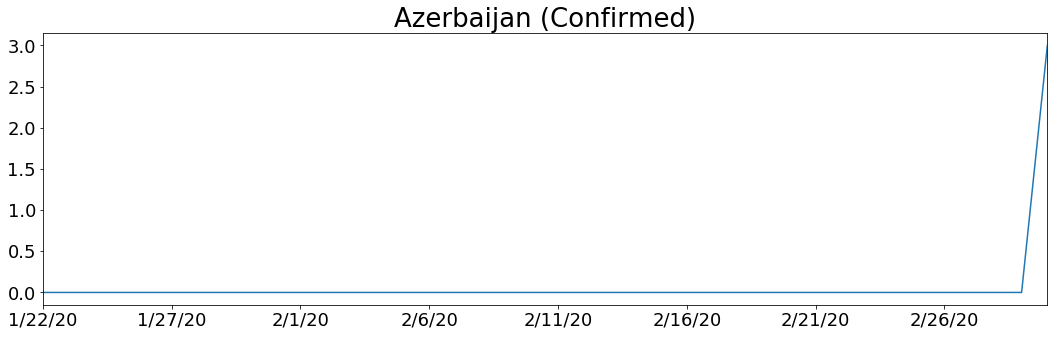

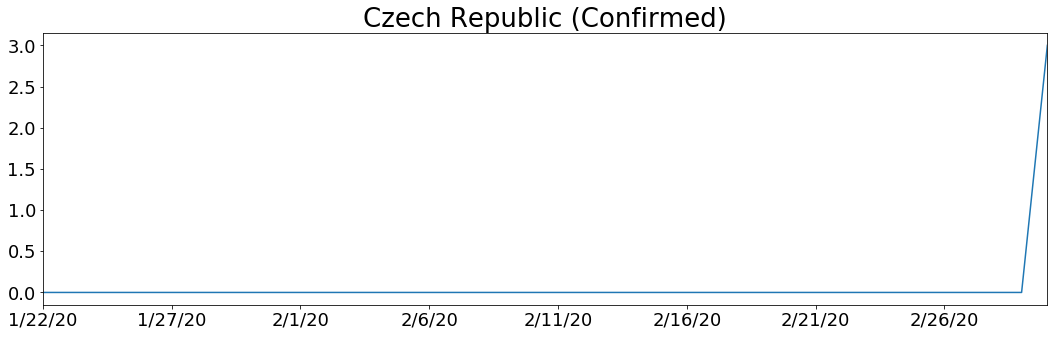

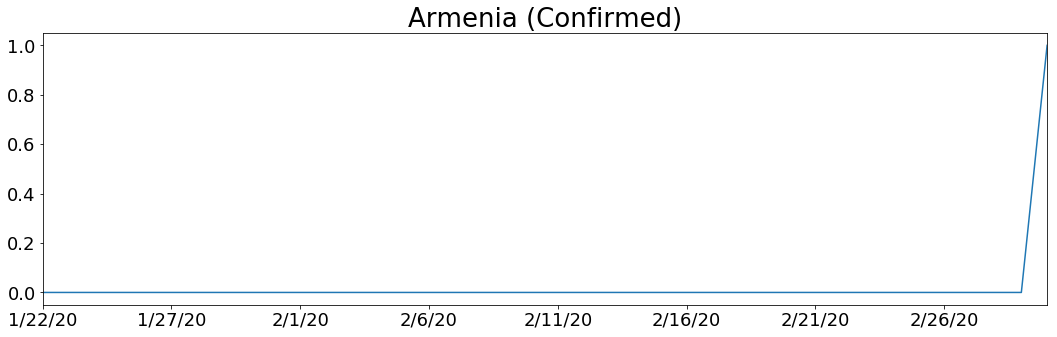

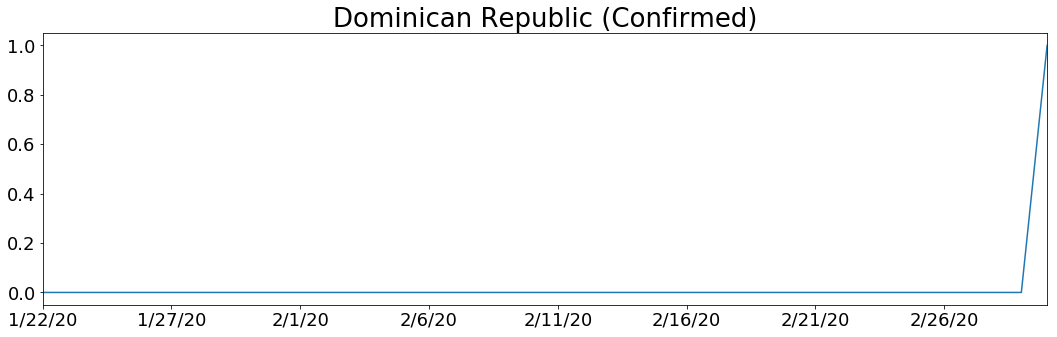

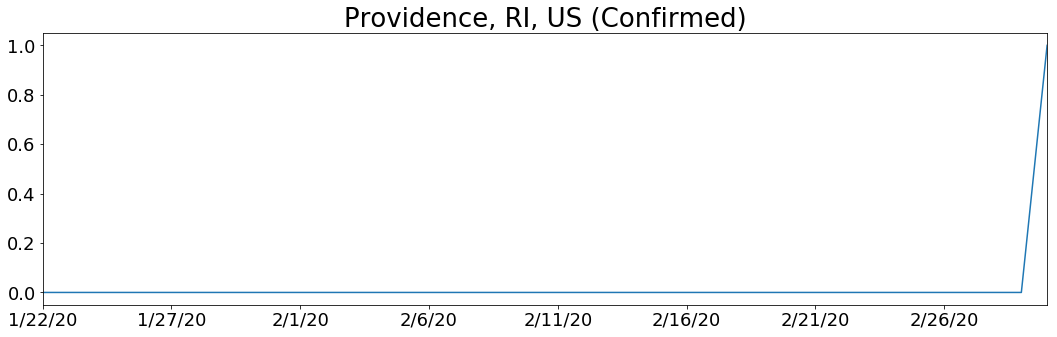

In [22]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Confirmed by Date"
for index, row in time_series_covid_19_confirmed.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Confirmed)")
    else:
        plt.title(row["Country/Region"] + " (Confirmed)")
        
    plt.show()

# Deaths

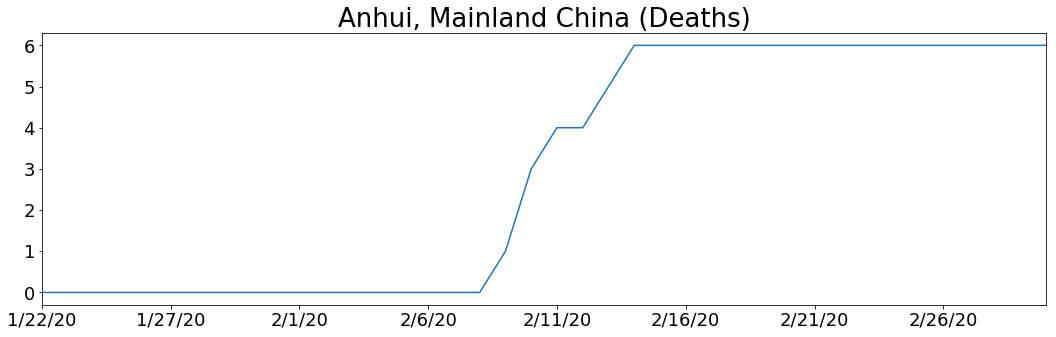

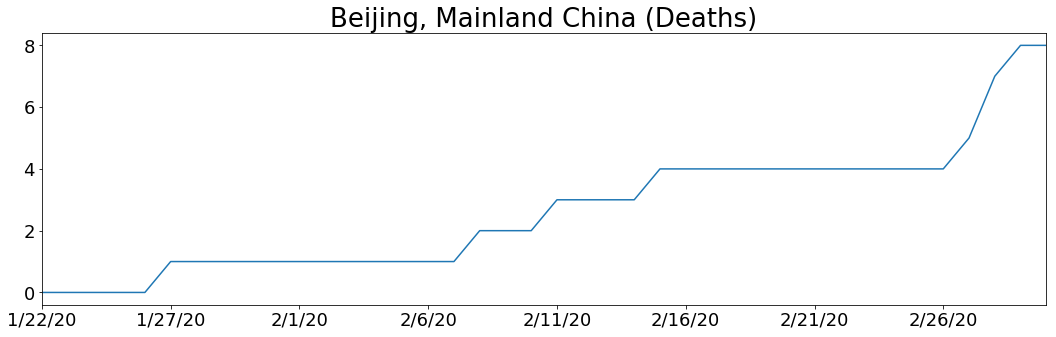

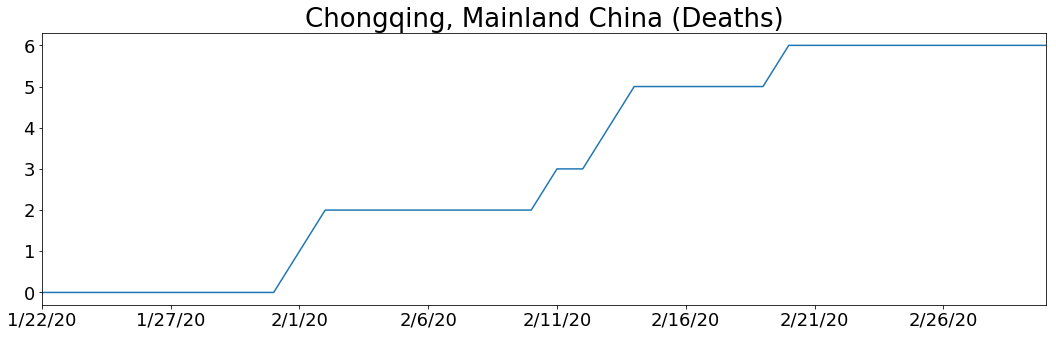

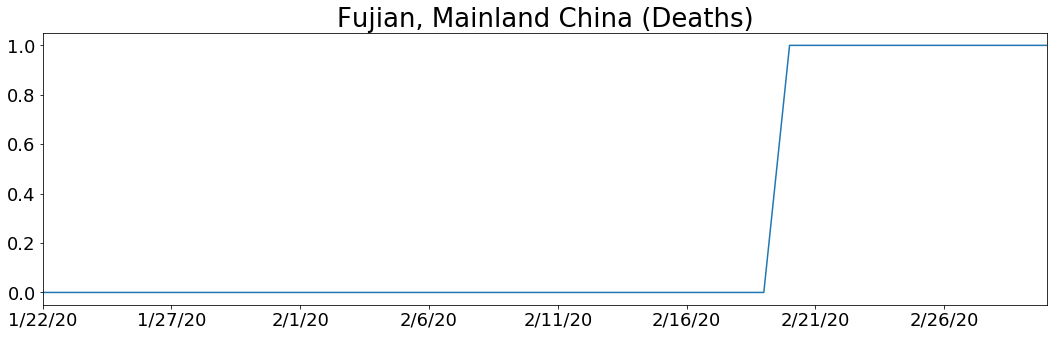

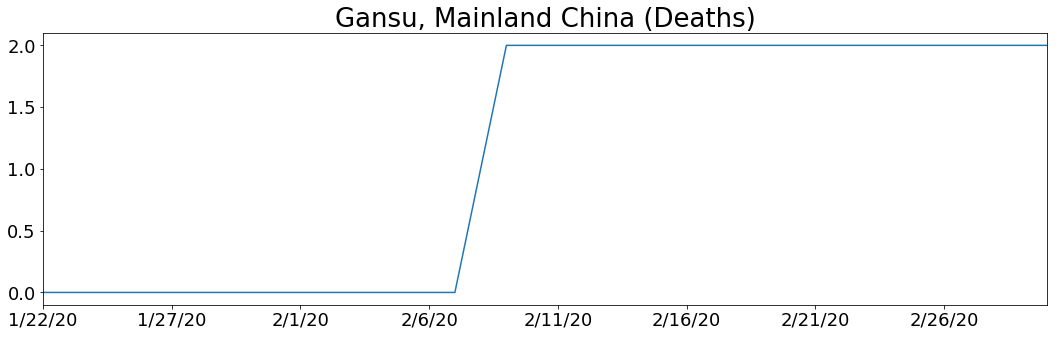

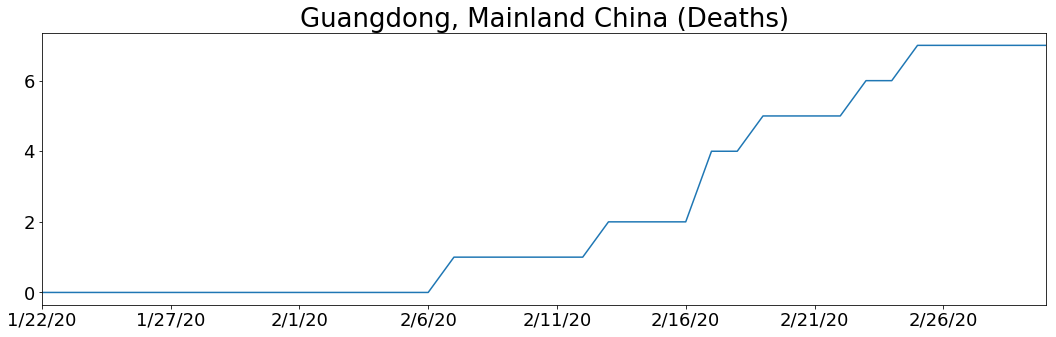

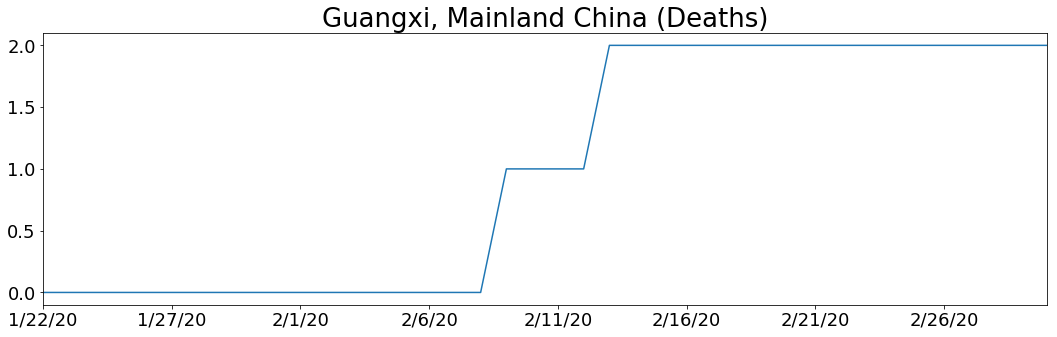

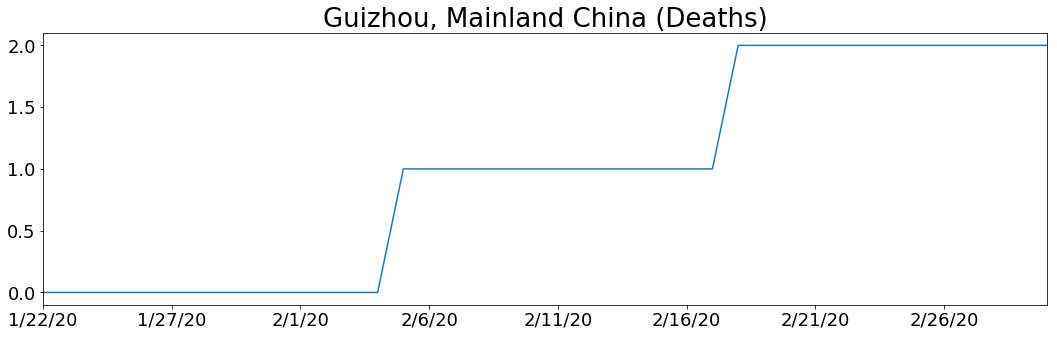

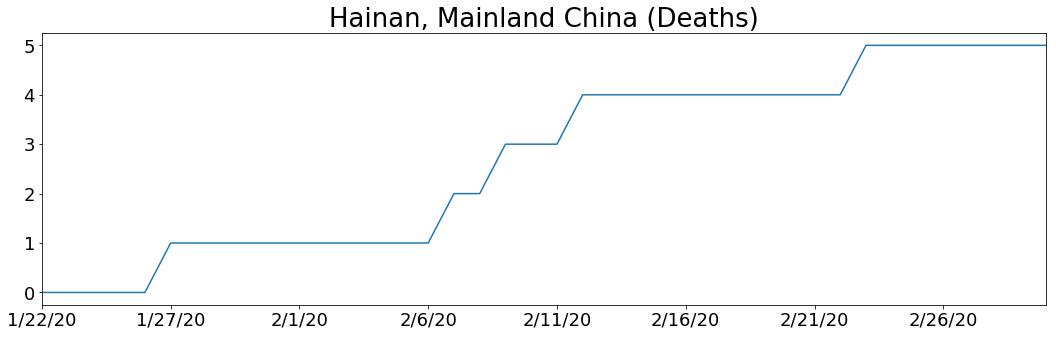

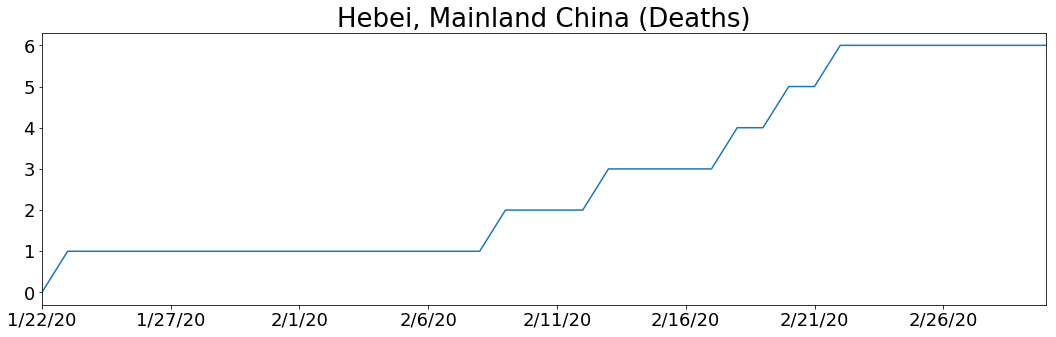

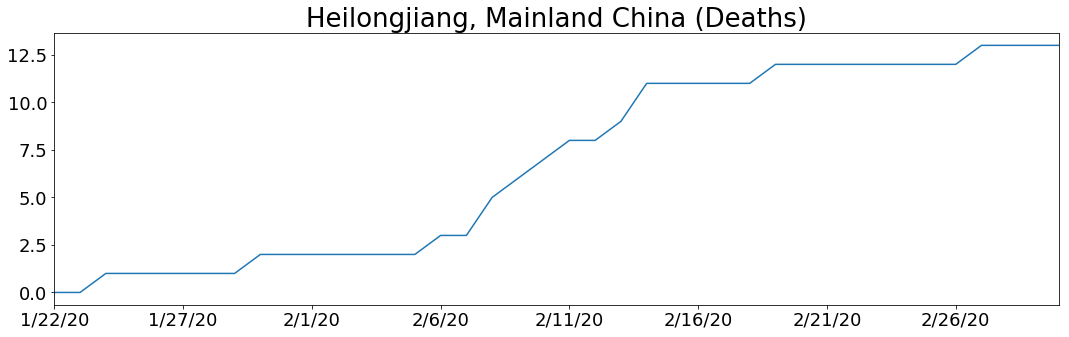

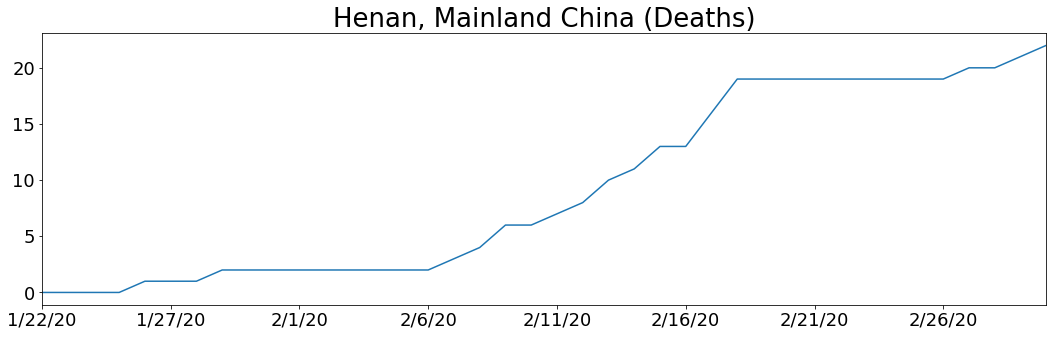

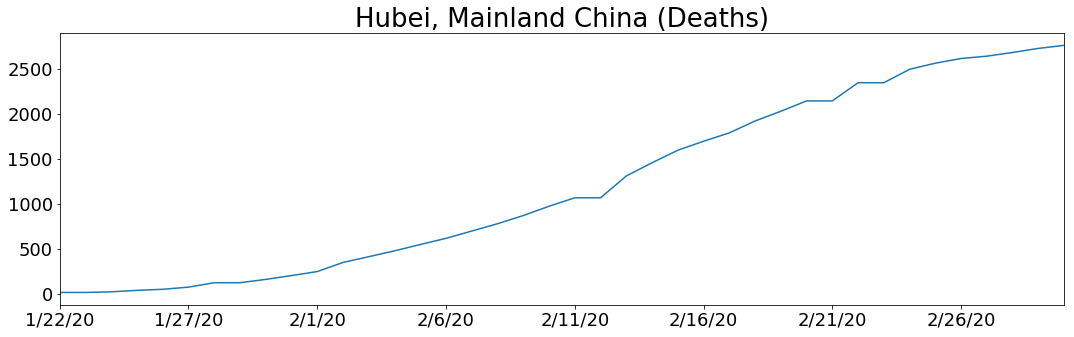

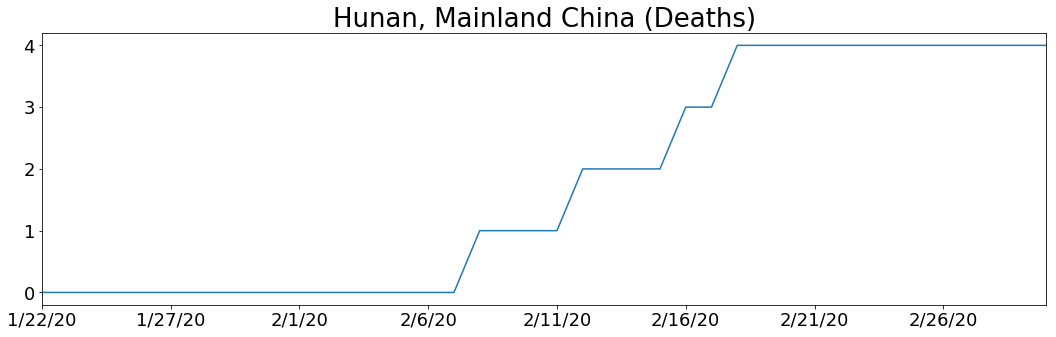

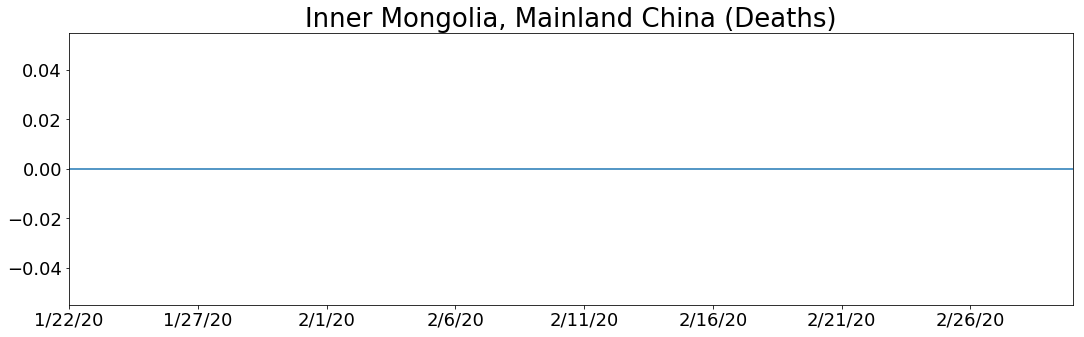

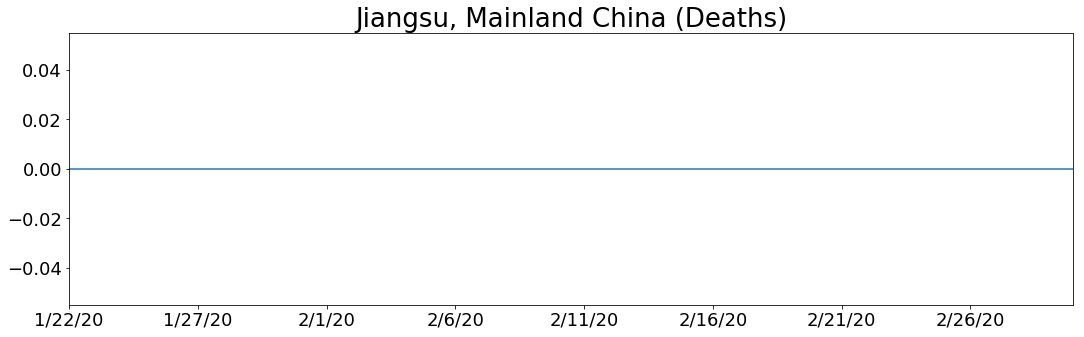

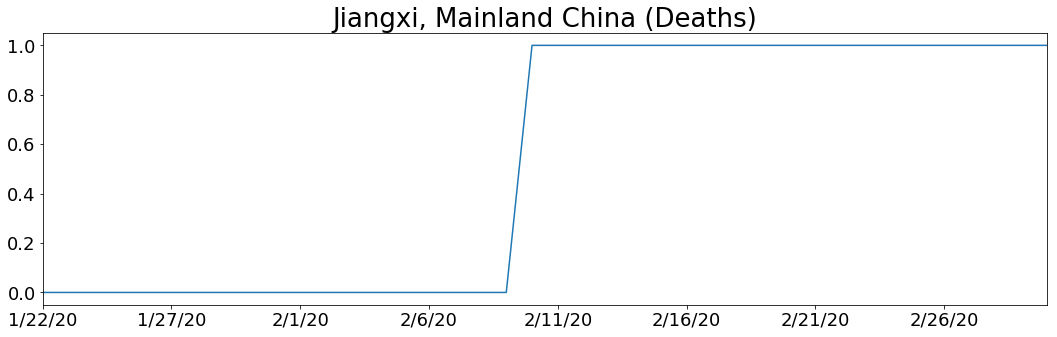

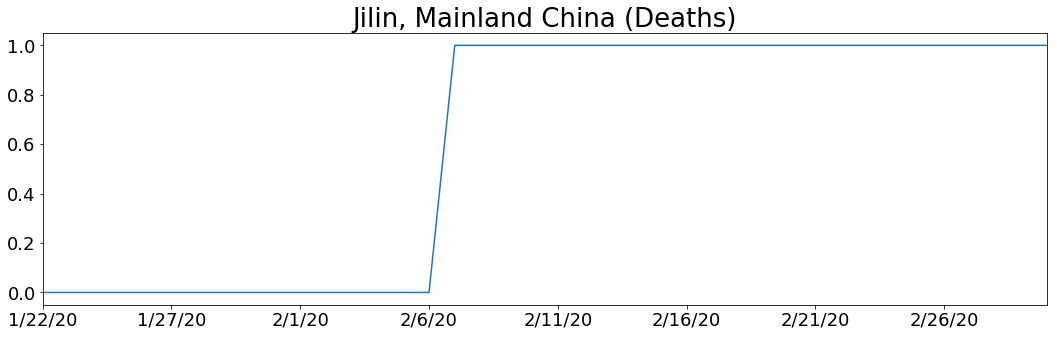

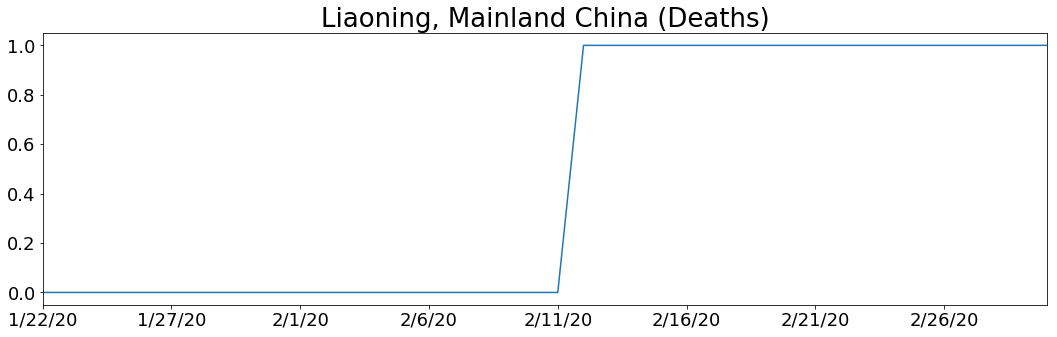

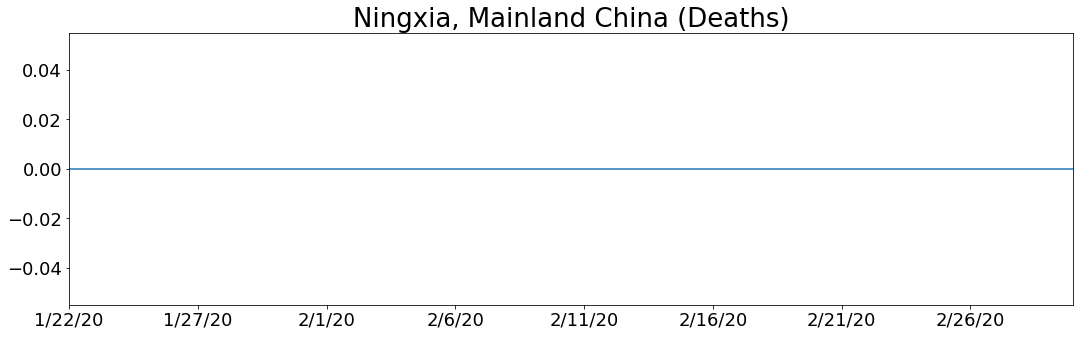

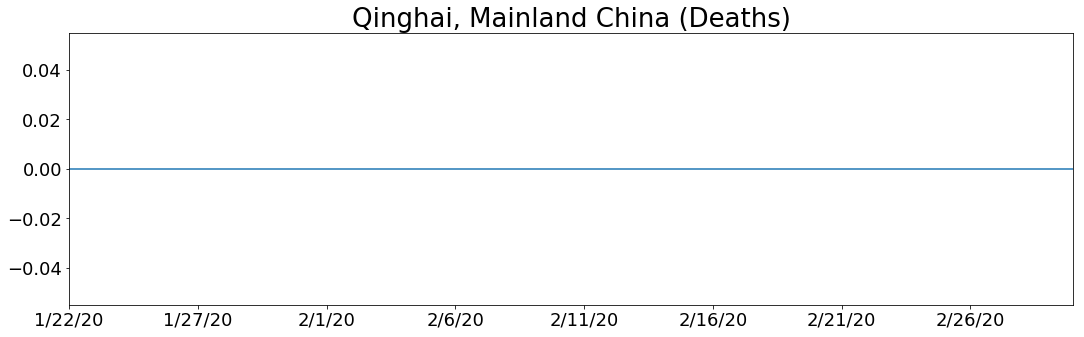

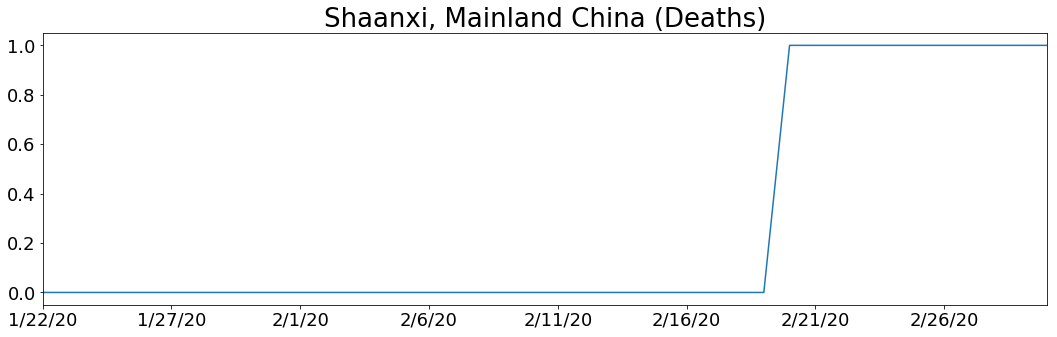

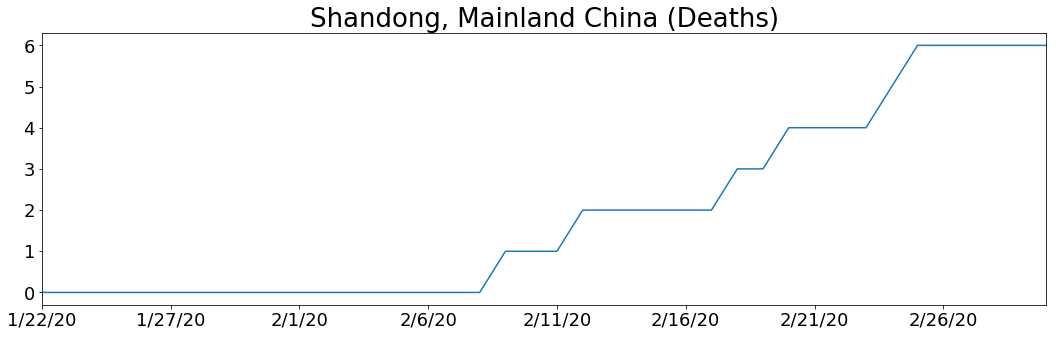

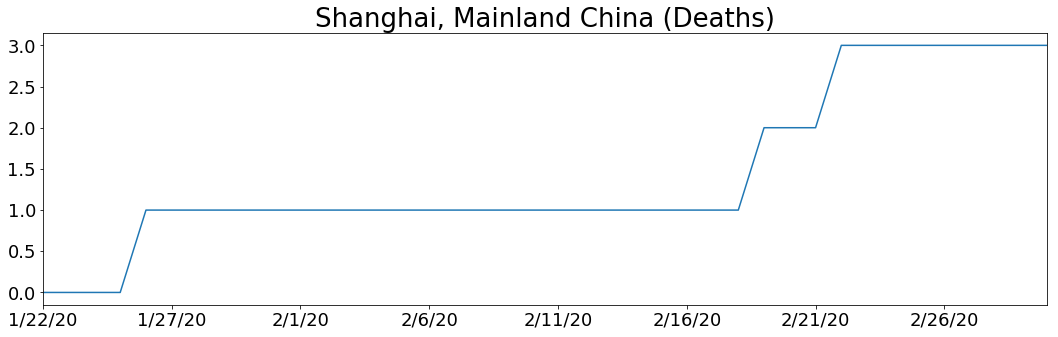

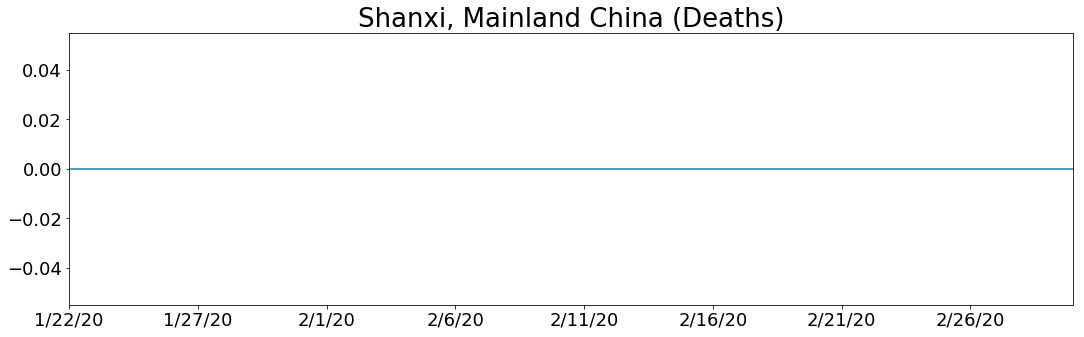

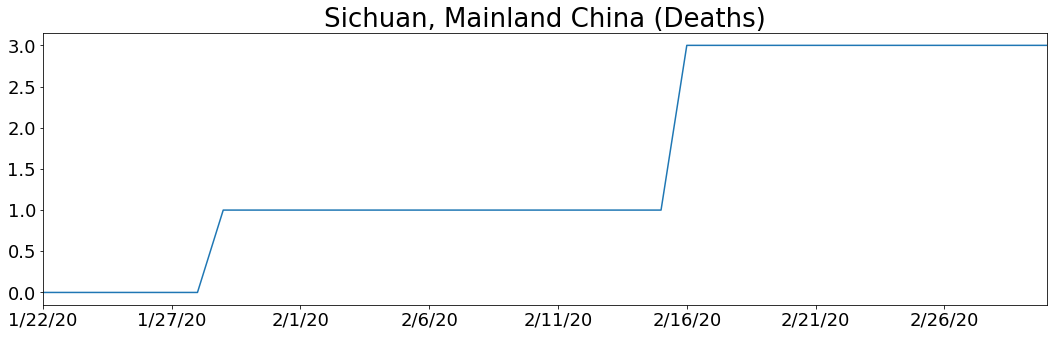

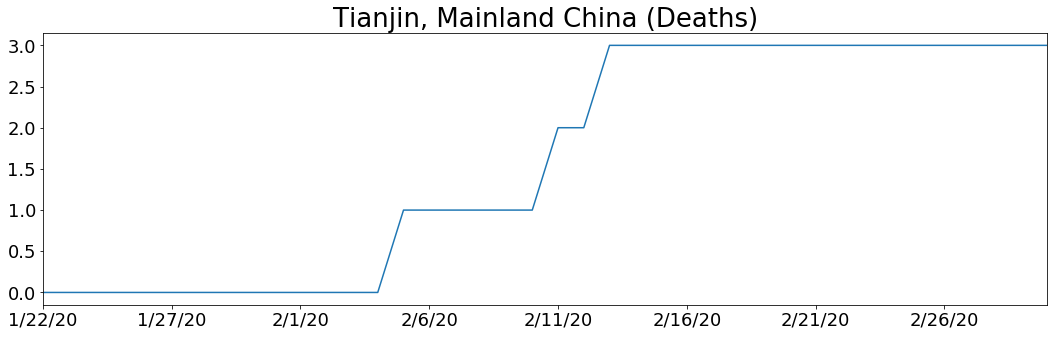

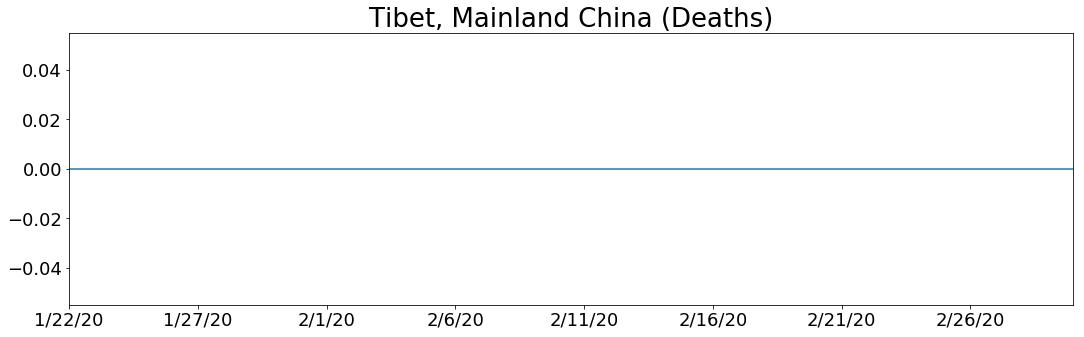

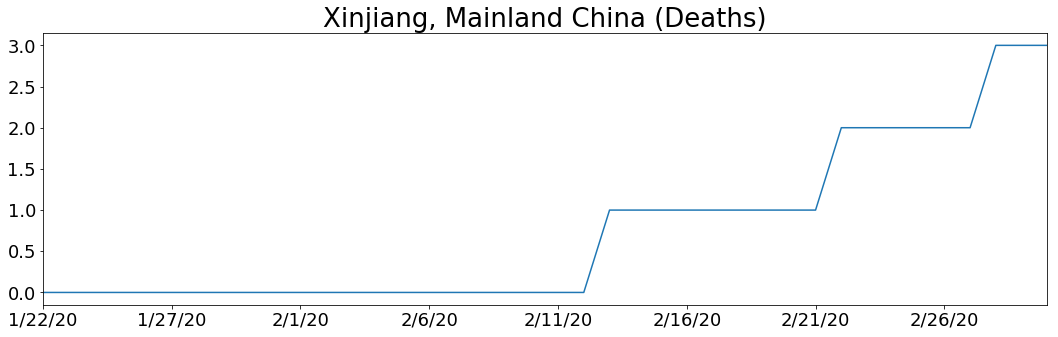

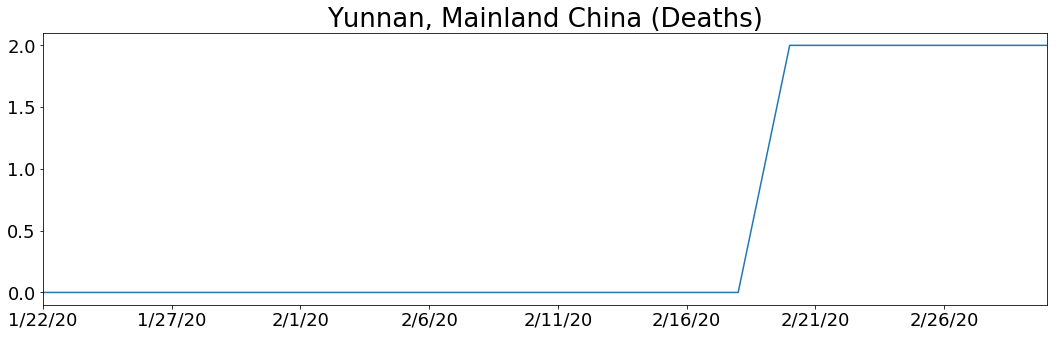

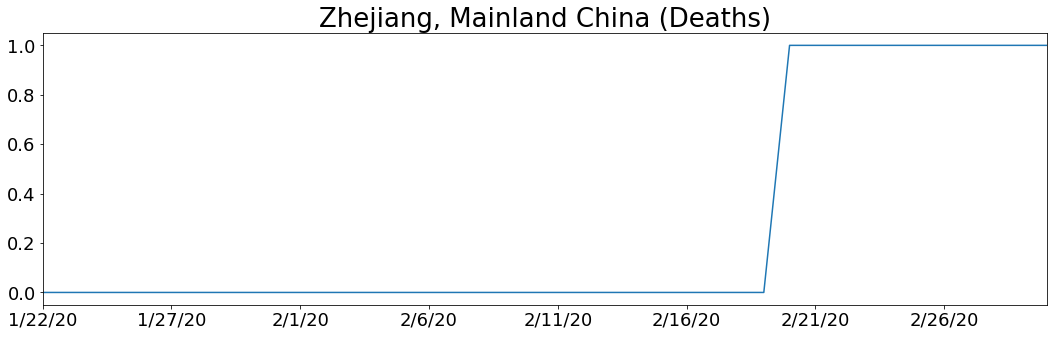

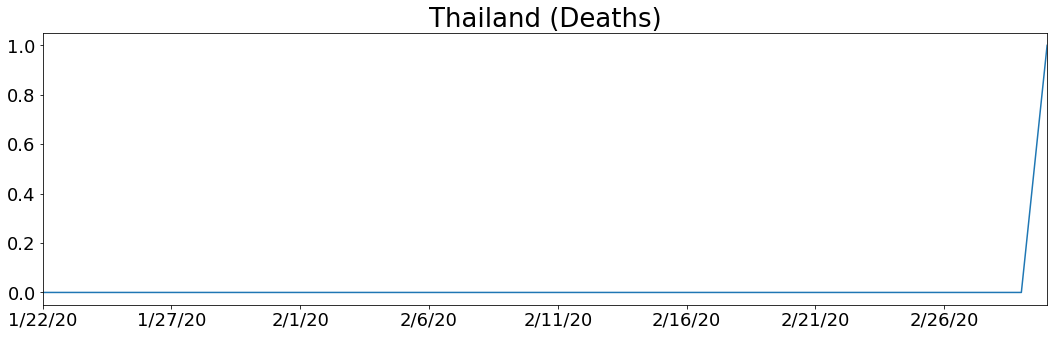

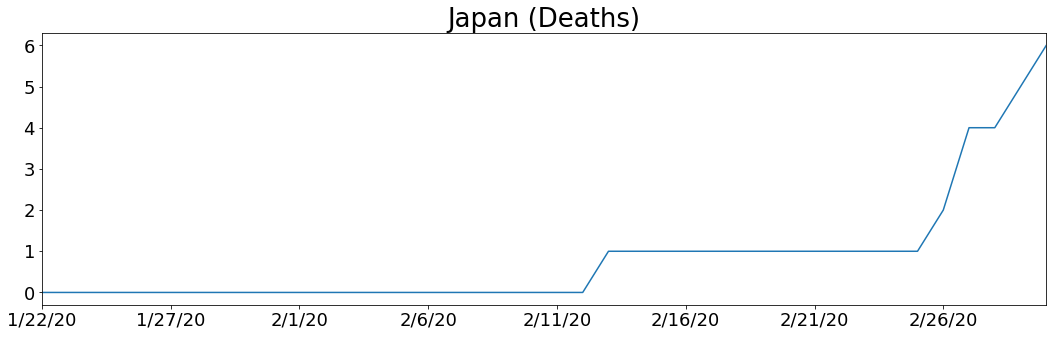

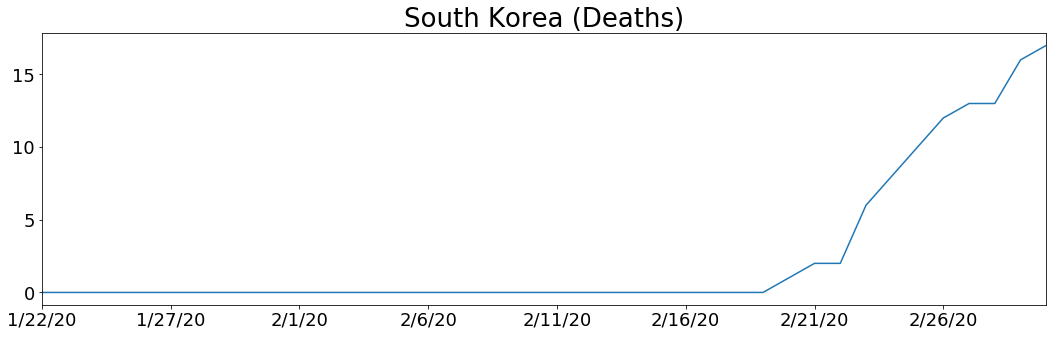

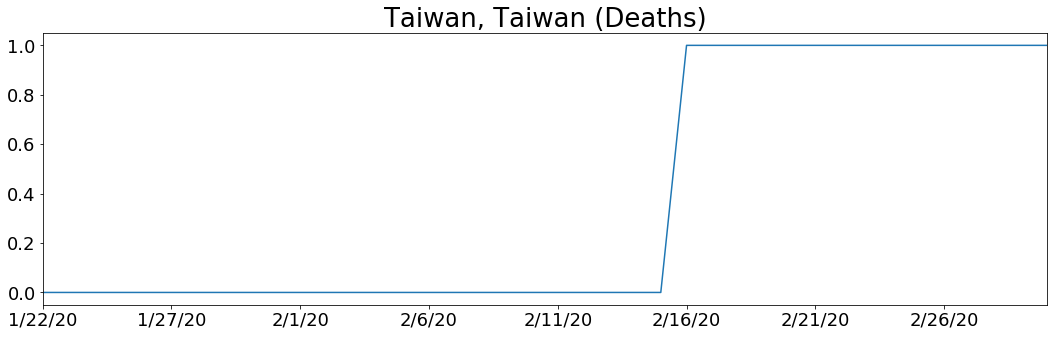

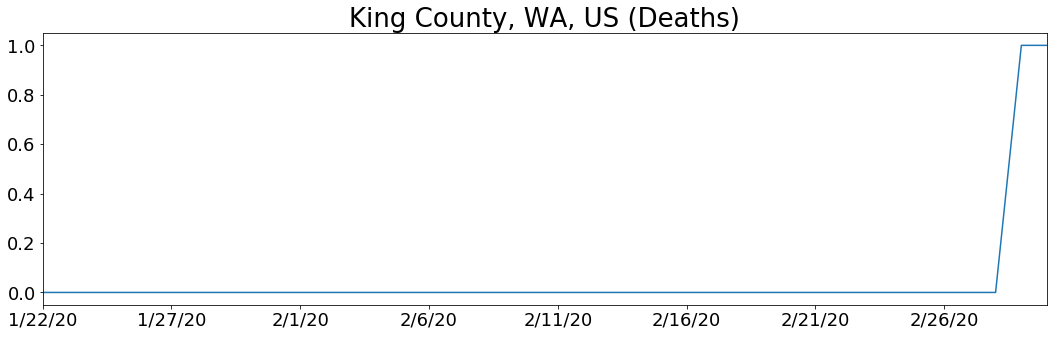

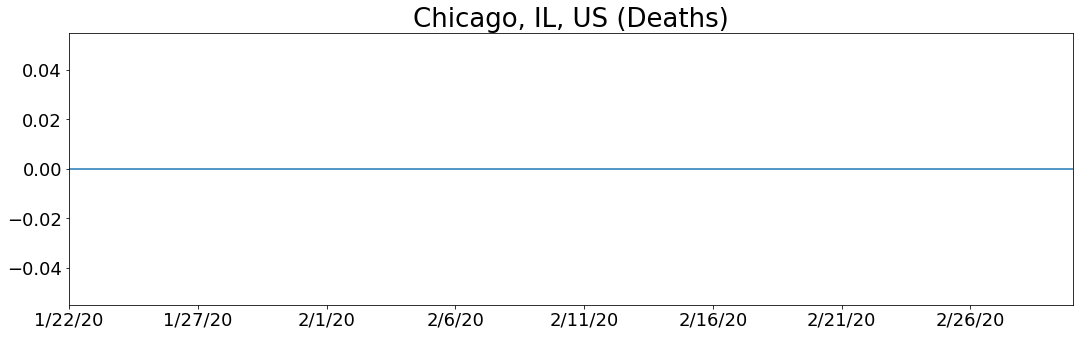

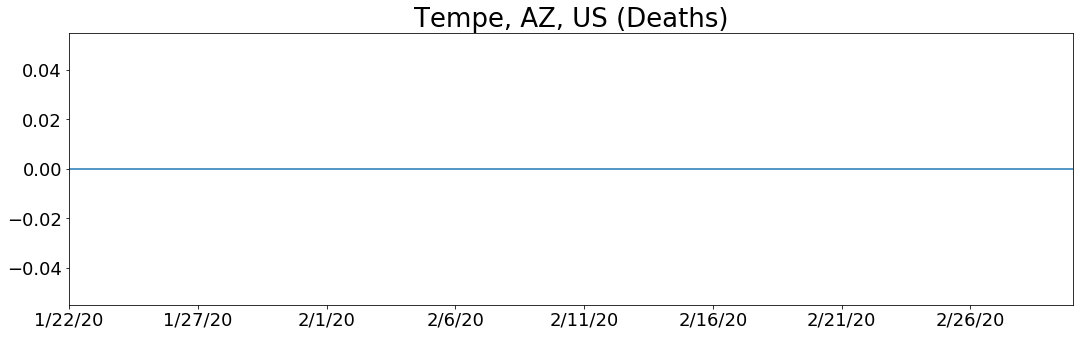

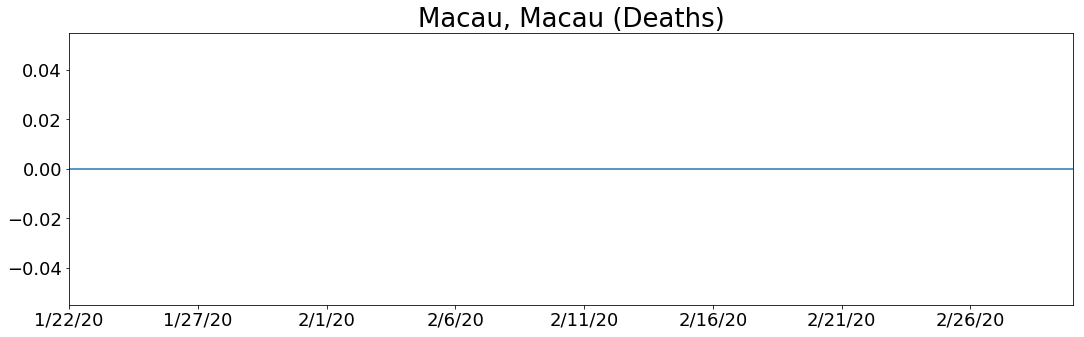

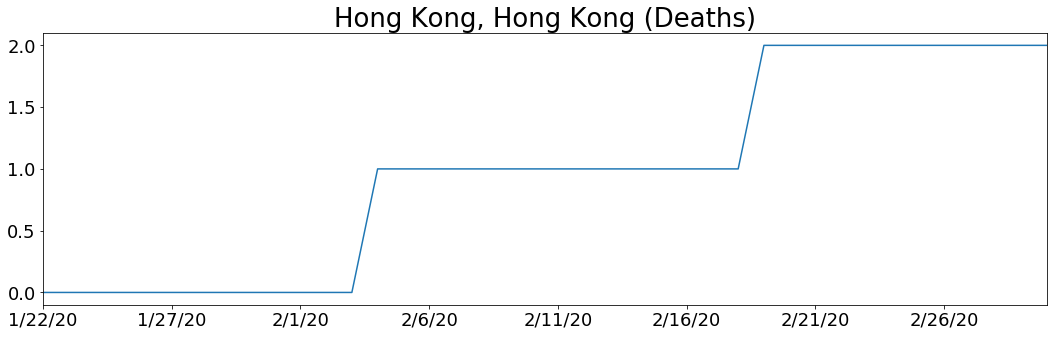

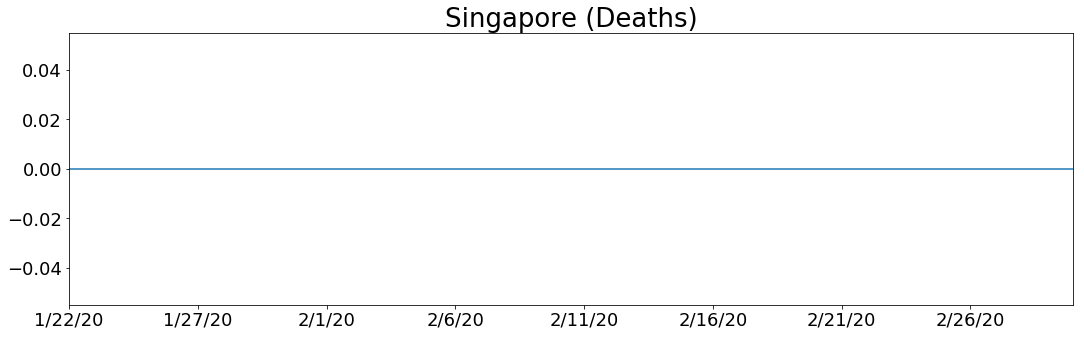

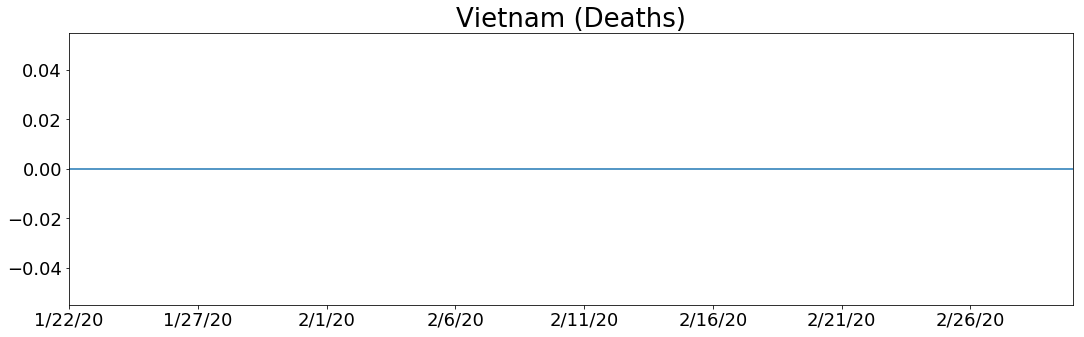

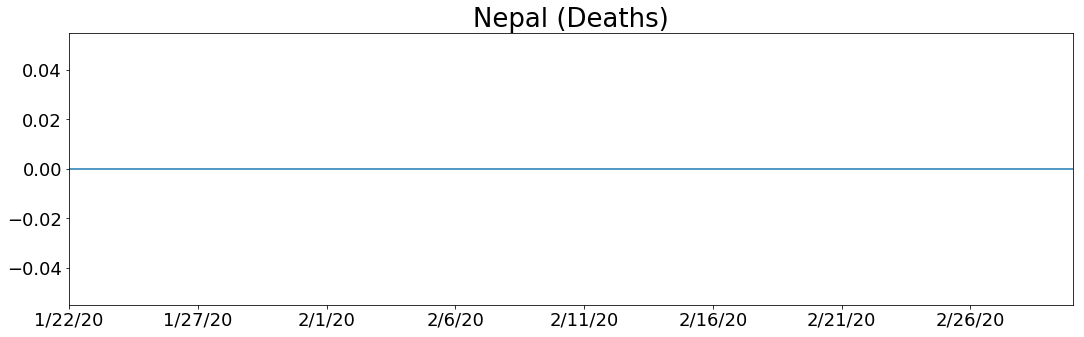

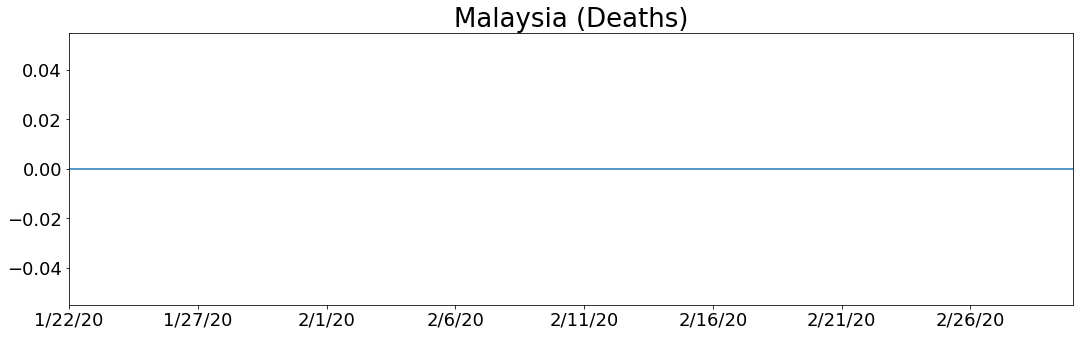

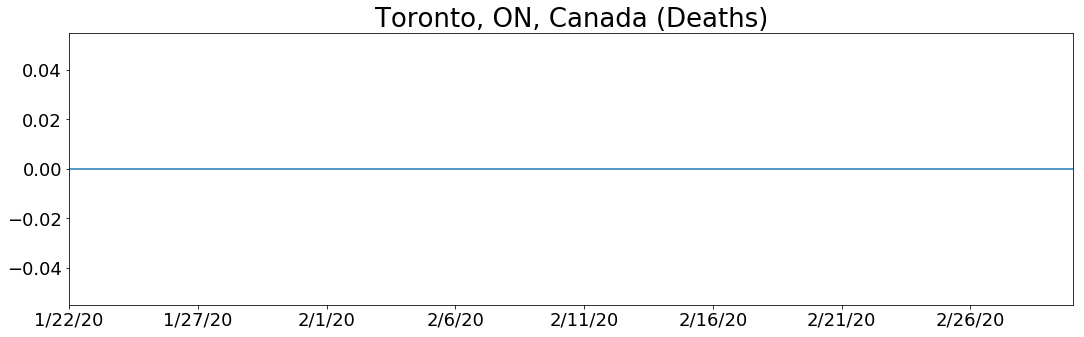

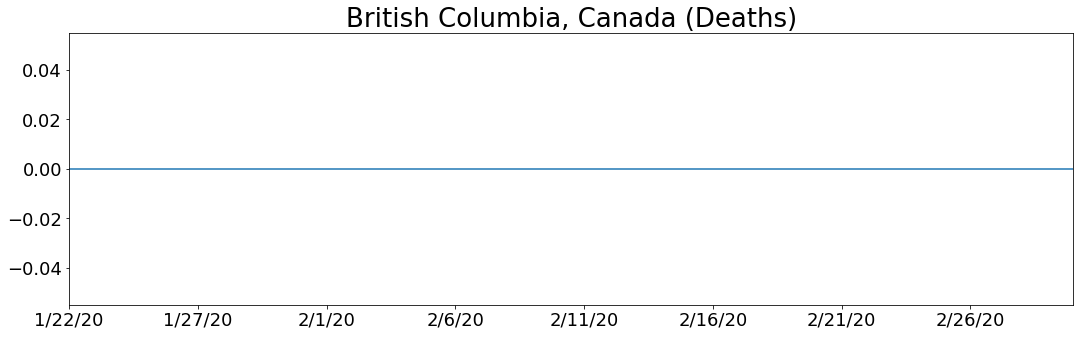

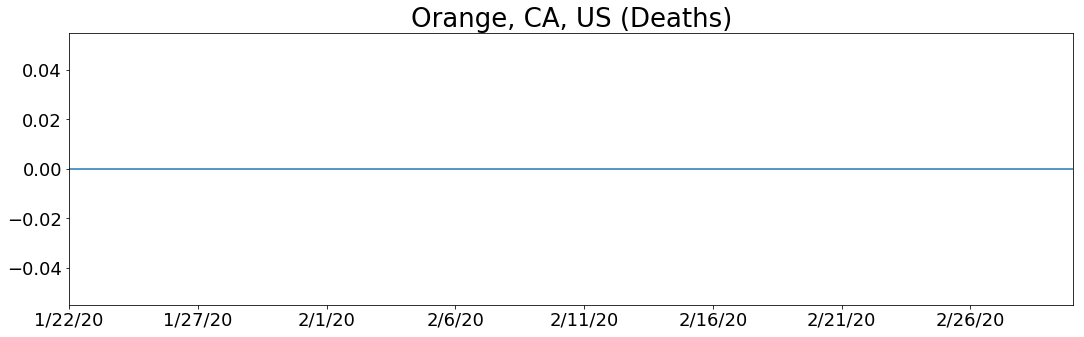

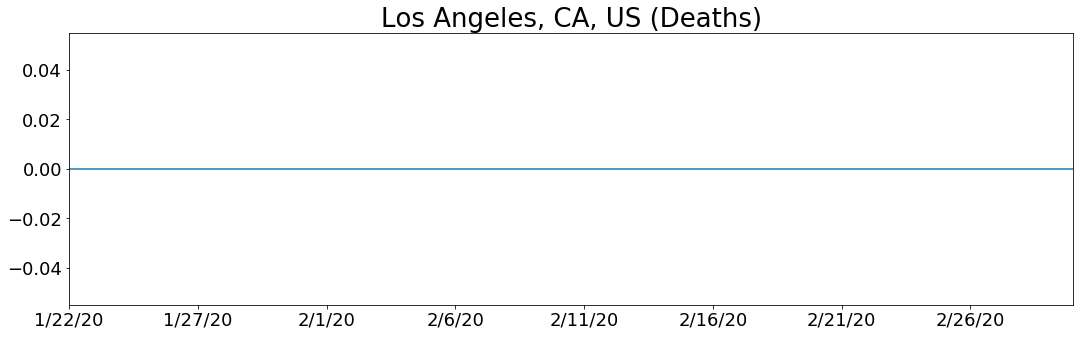

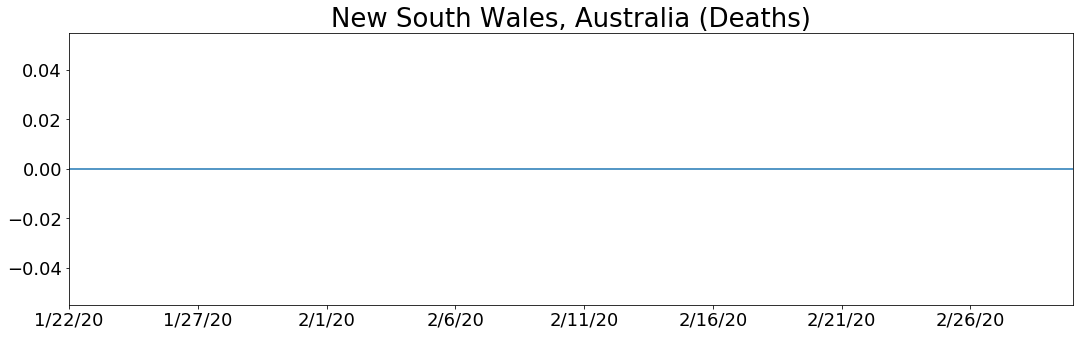

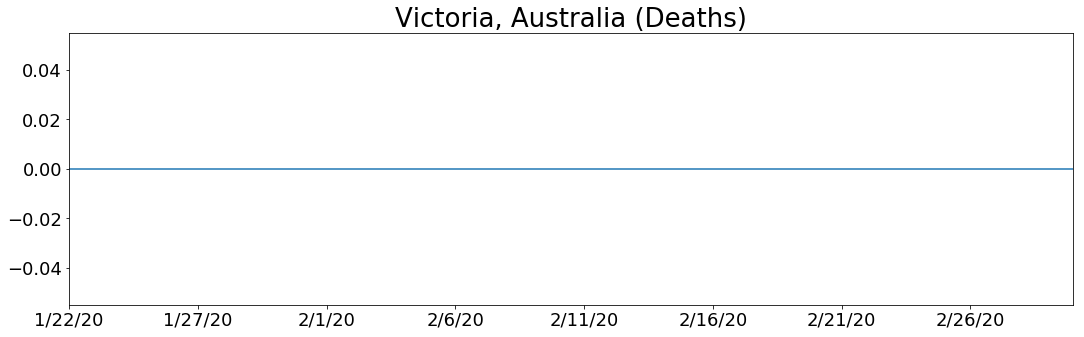

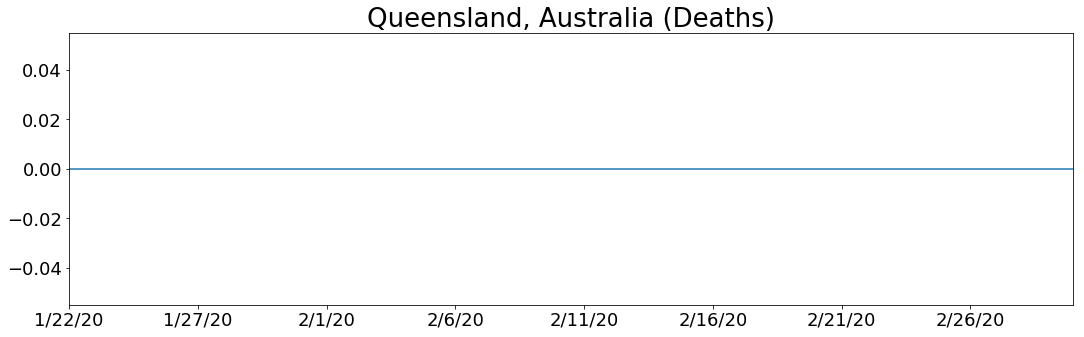

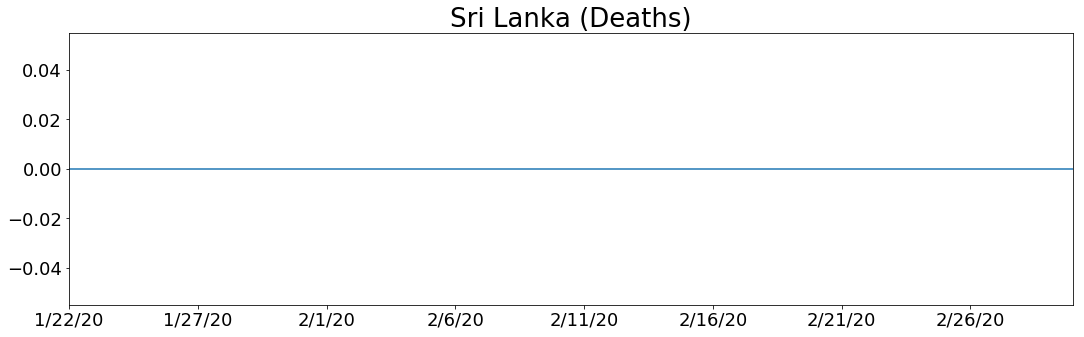

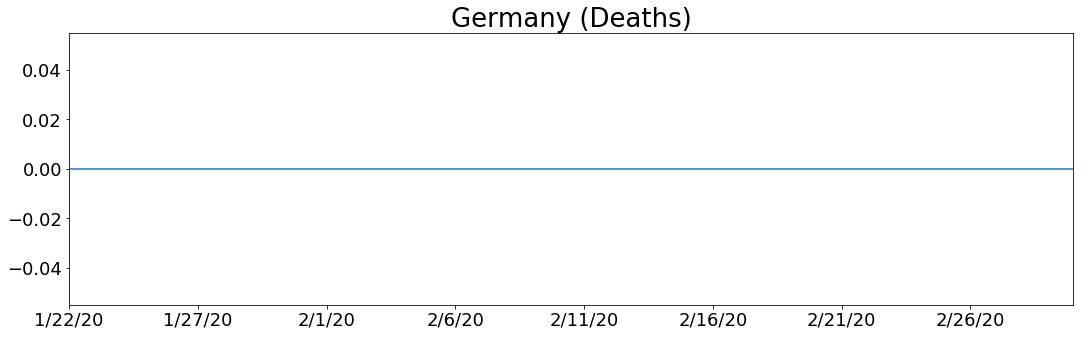

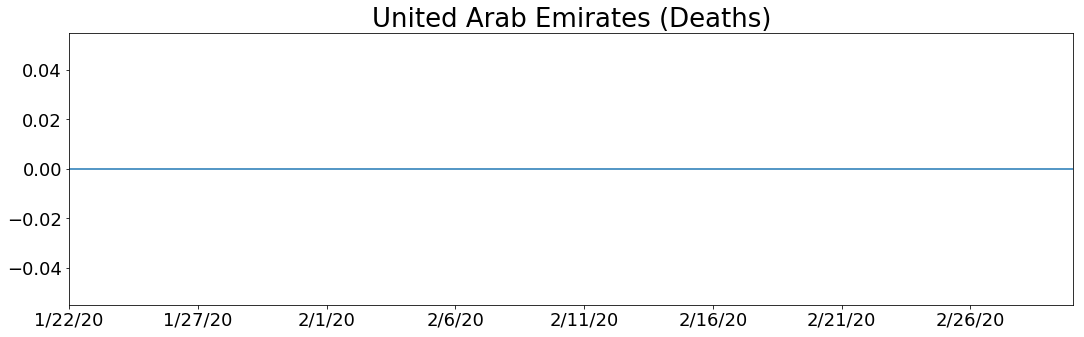

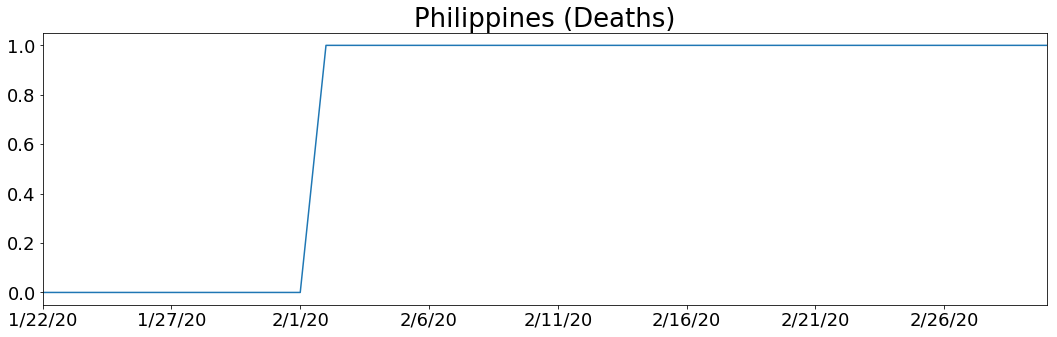

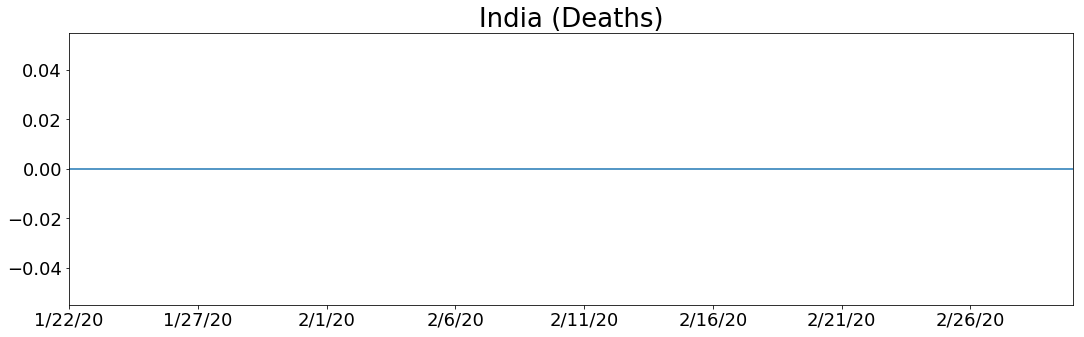

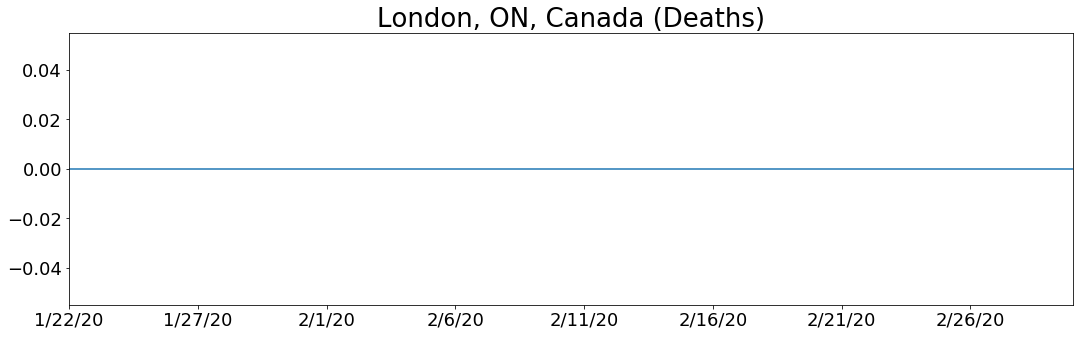

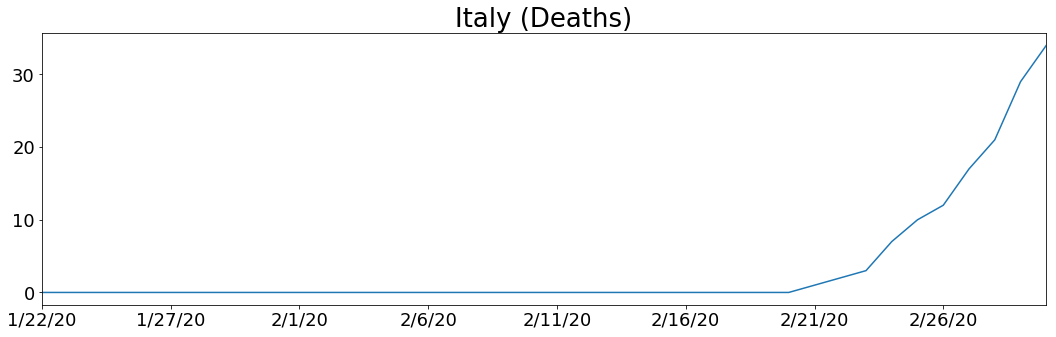

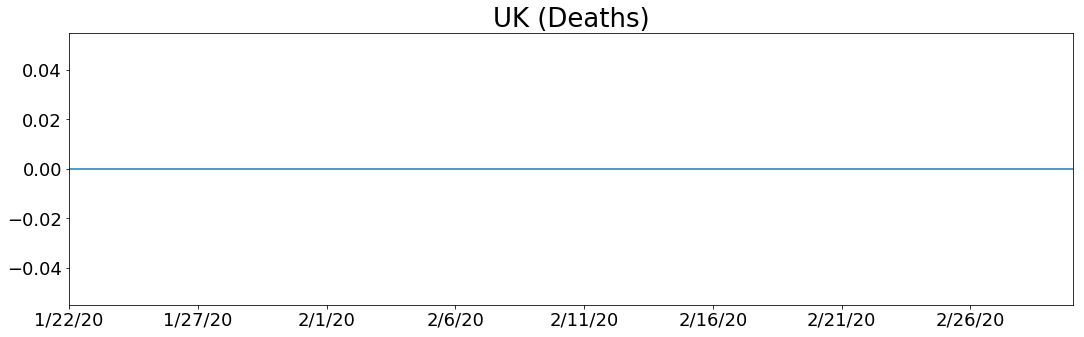

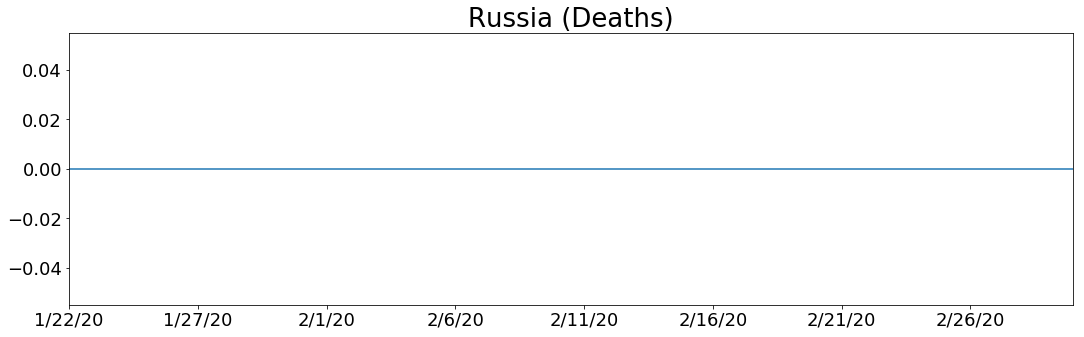

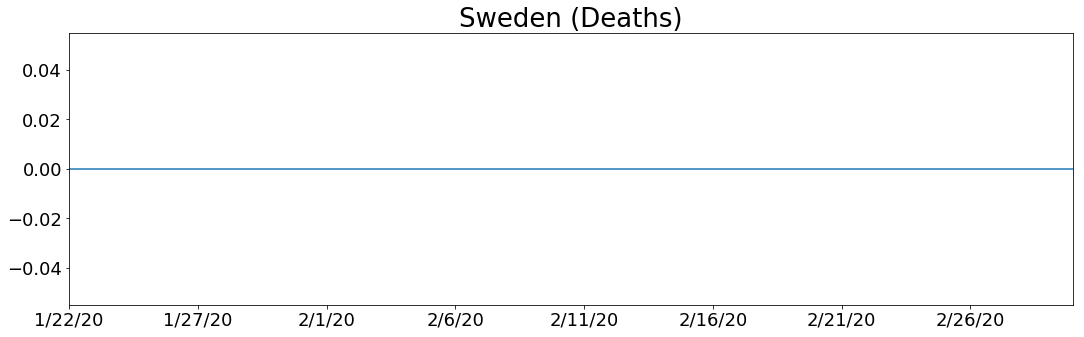

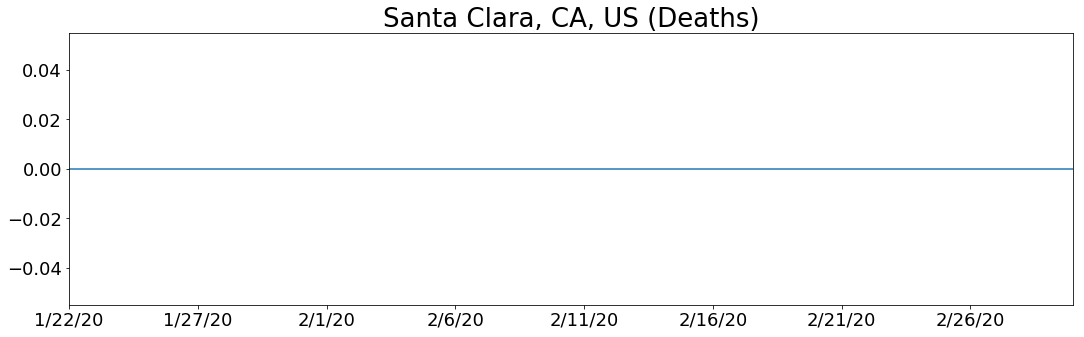

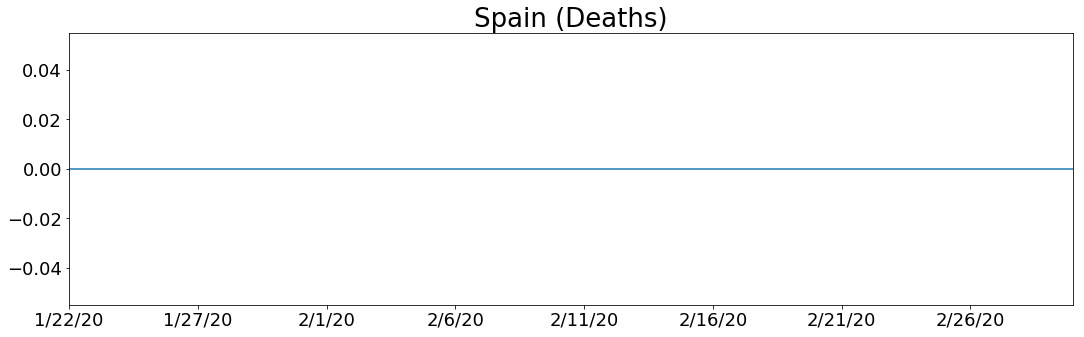

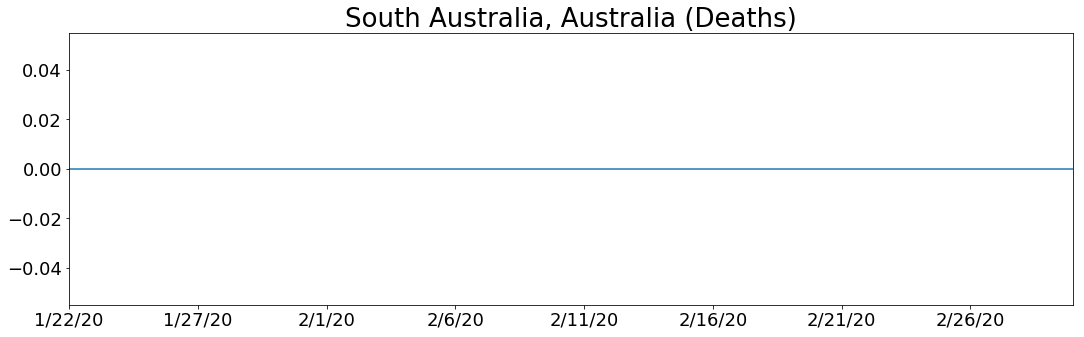

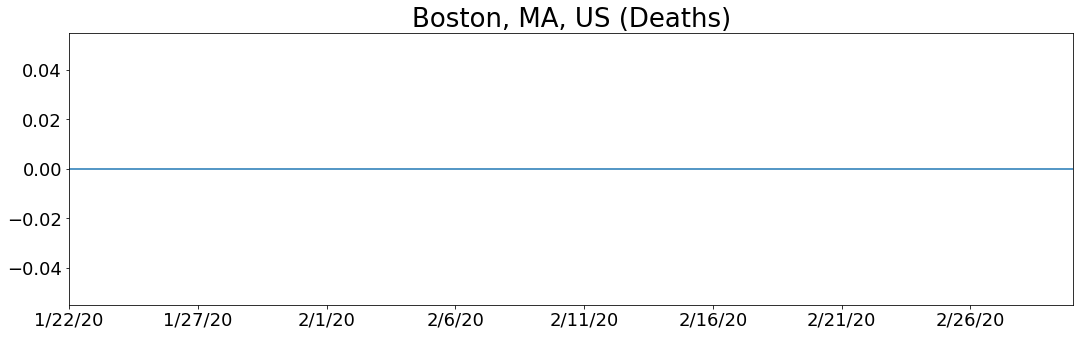

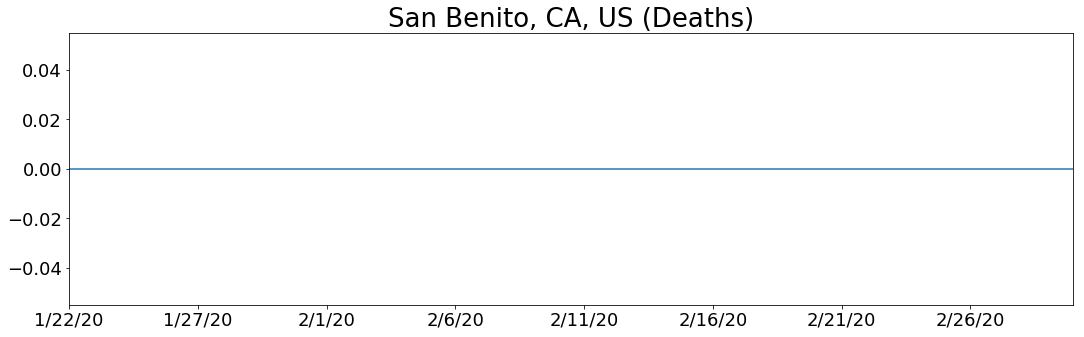

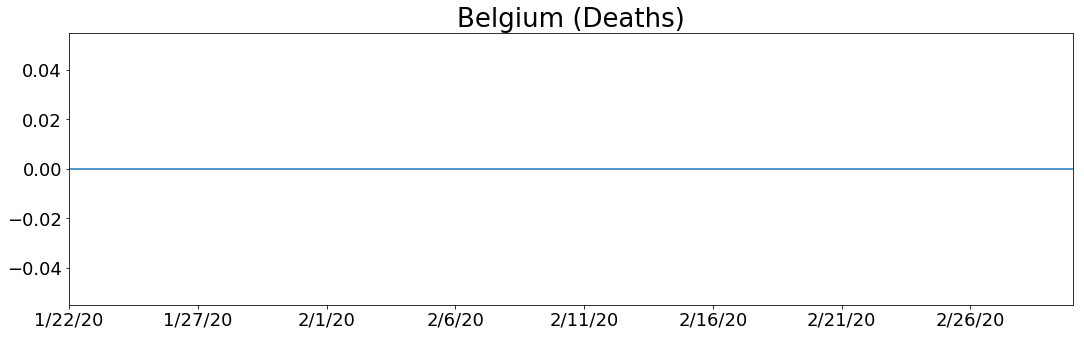

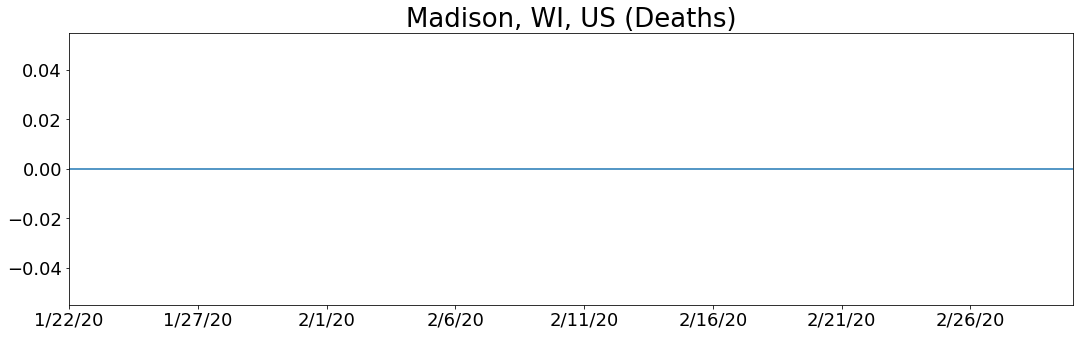

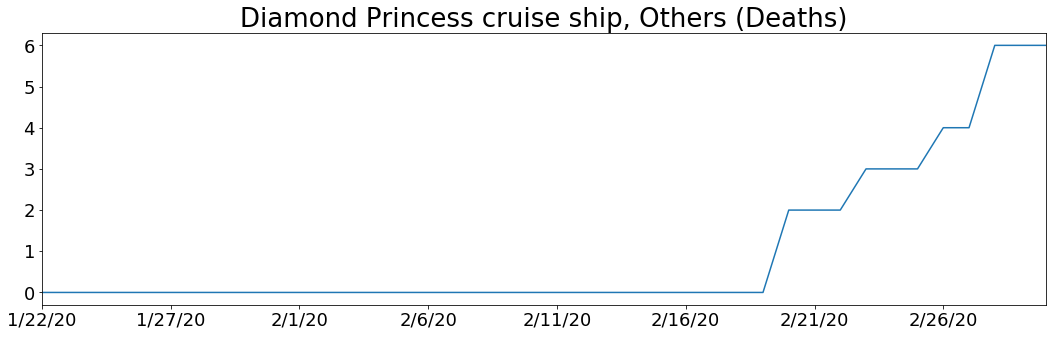

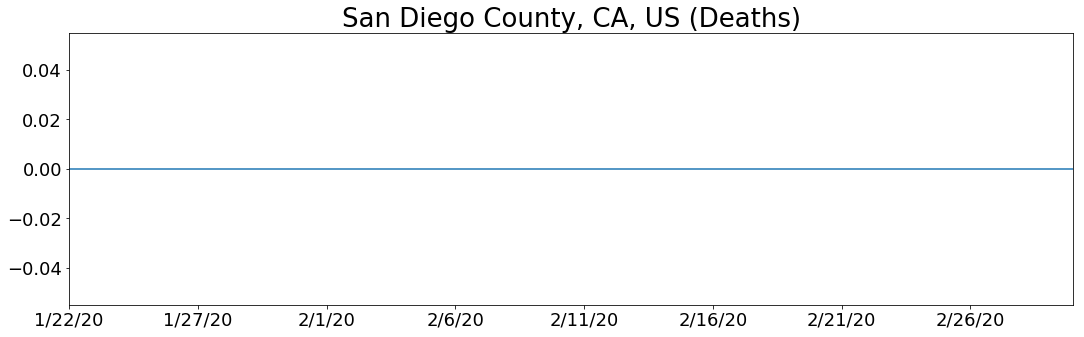

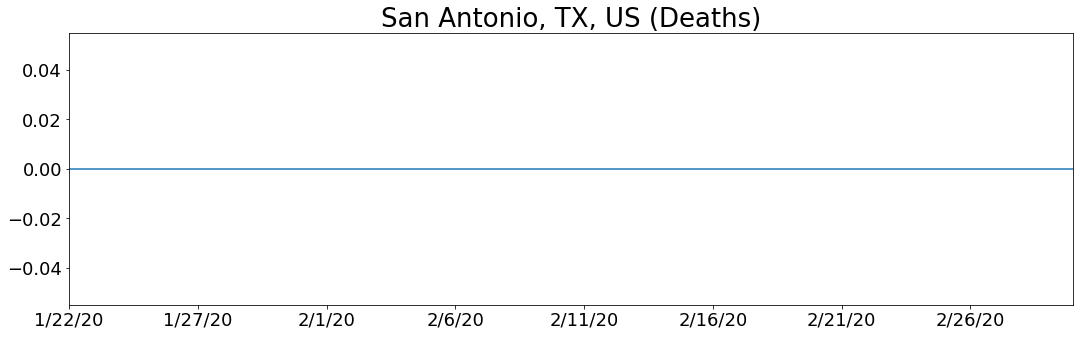

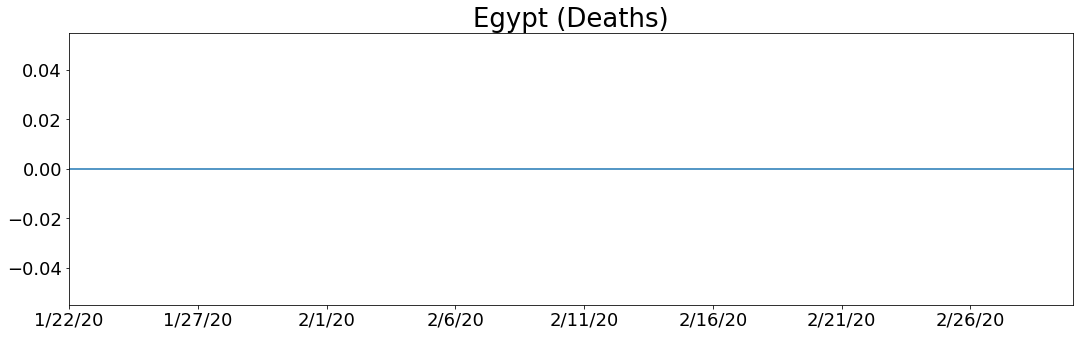

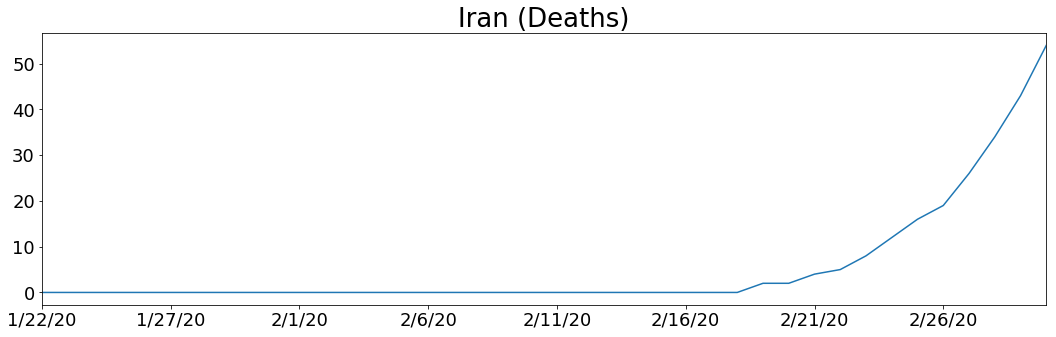

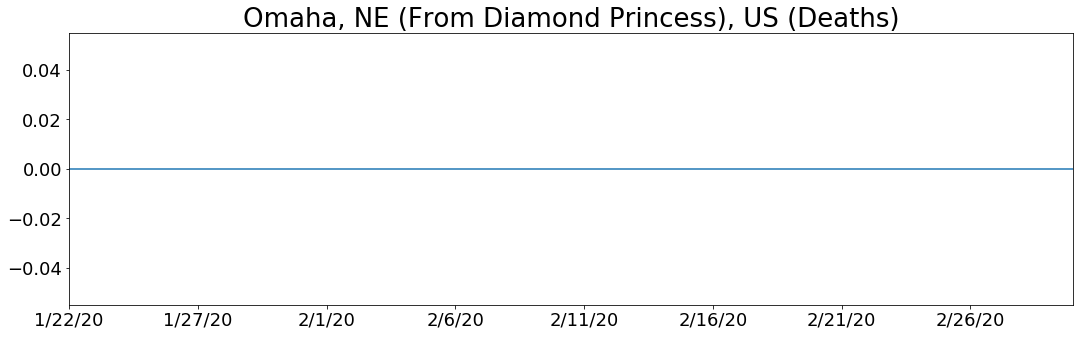

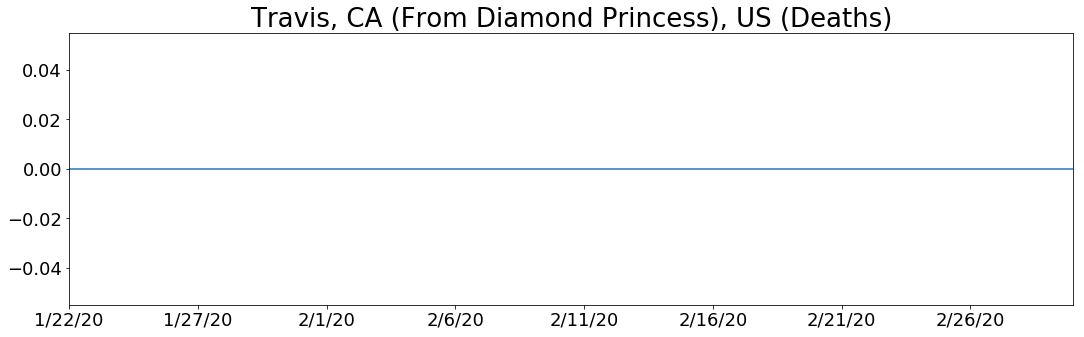

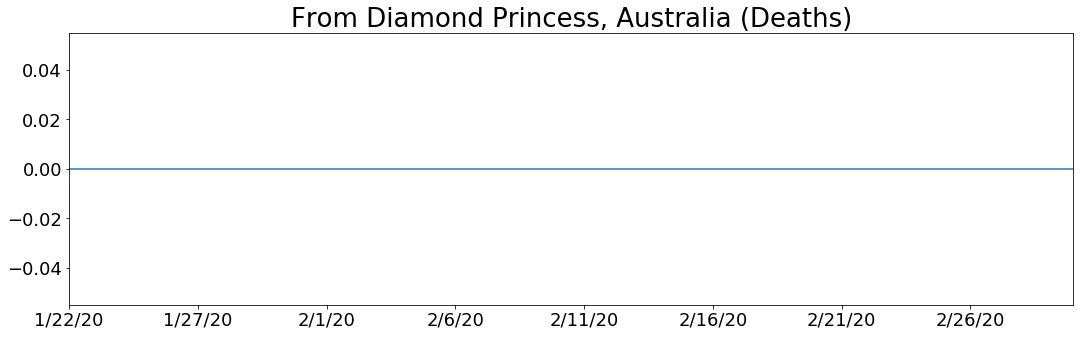

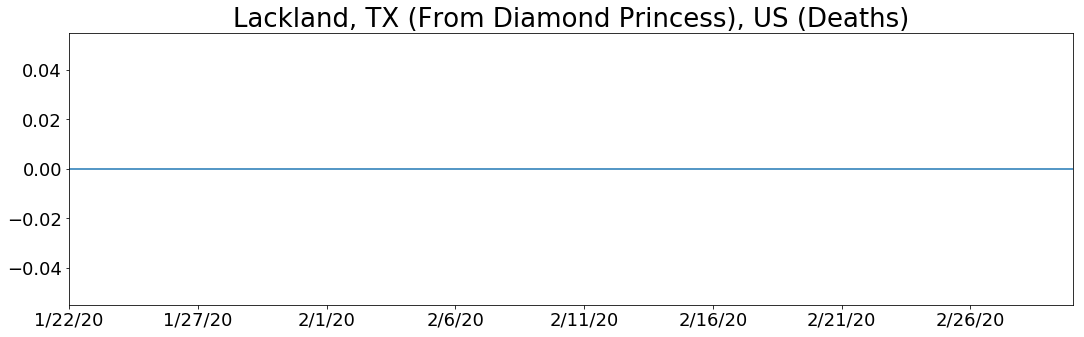

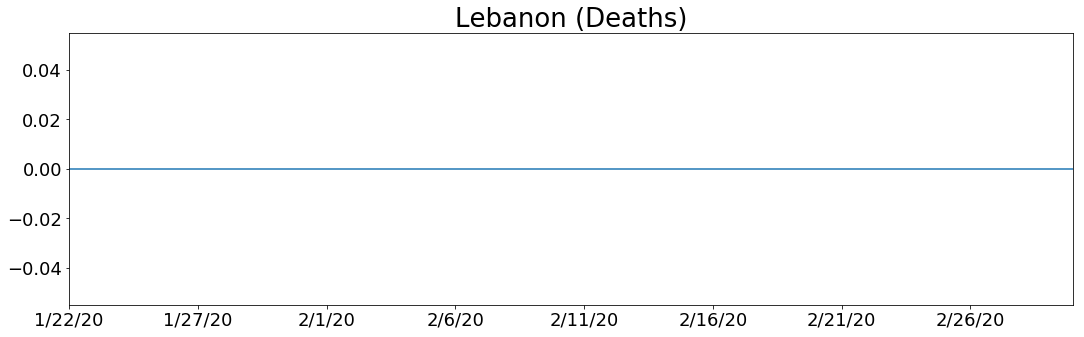

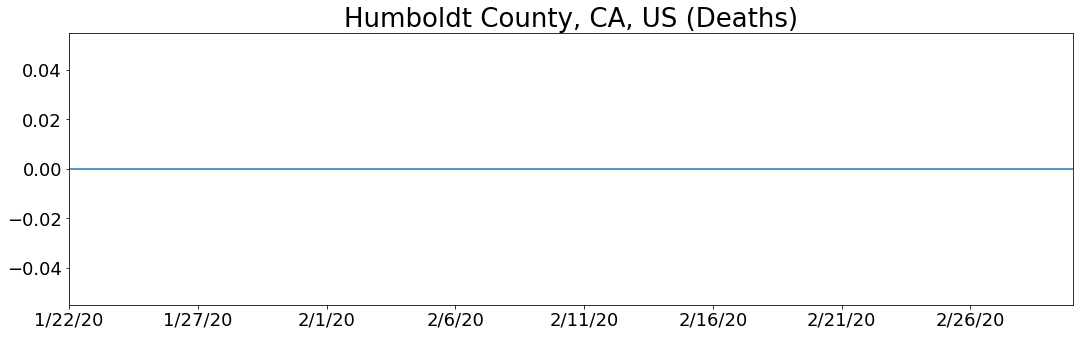

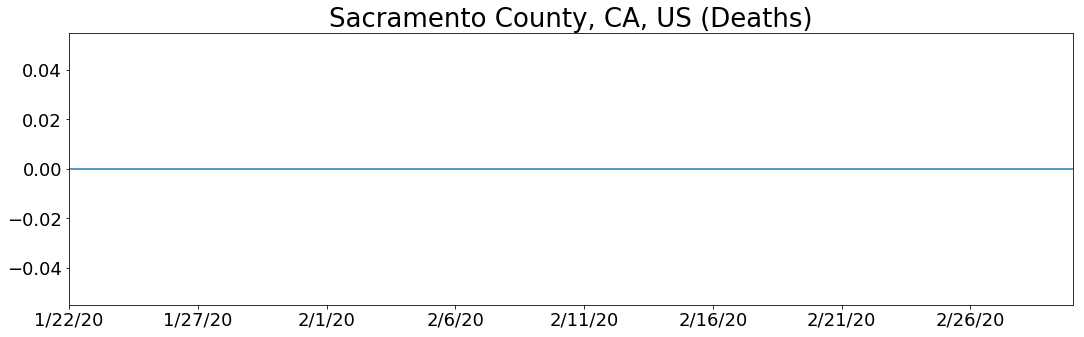

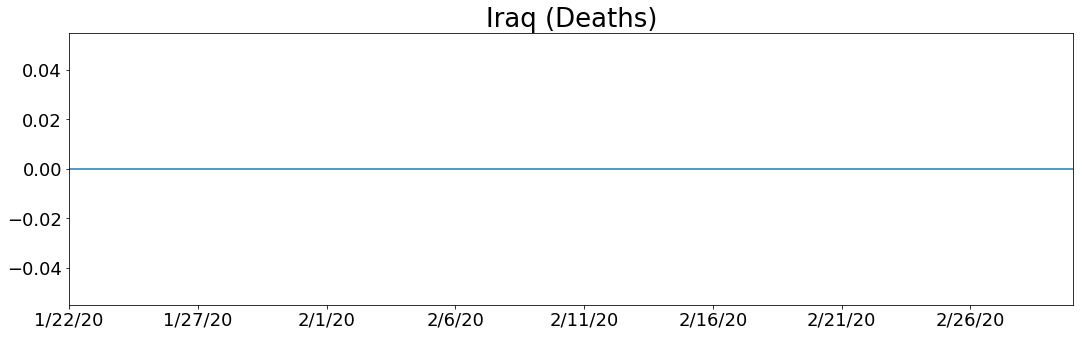

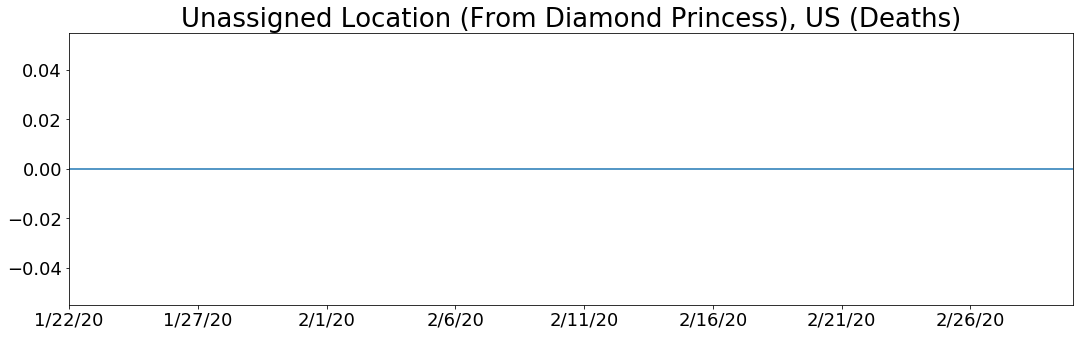

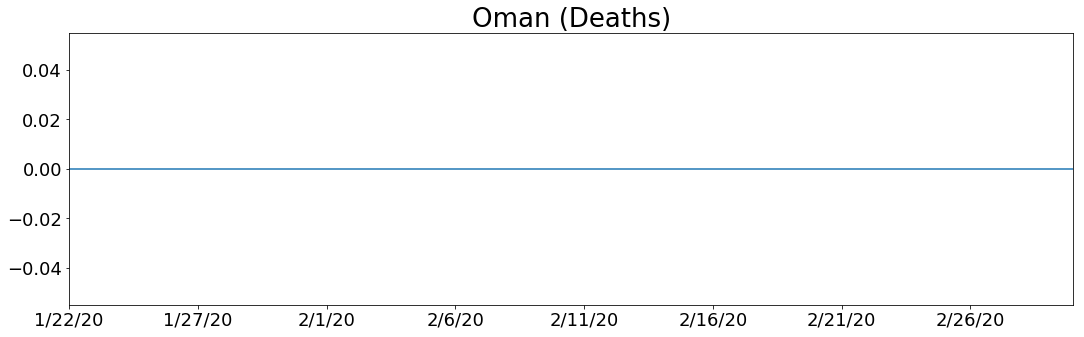

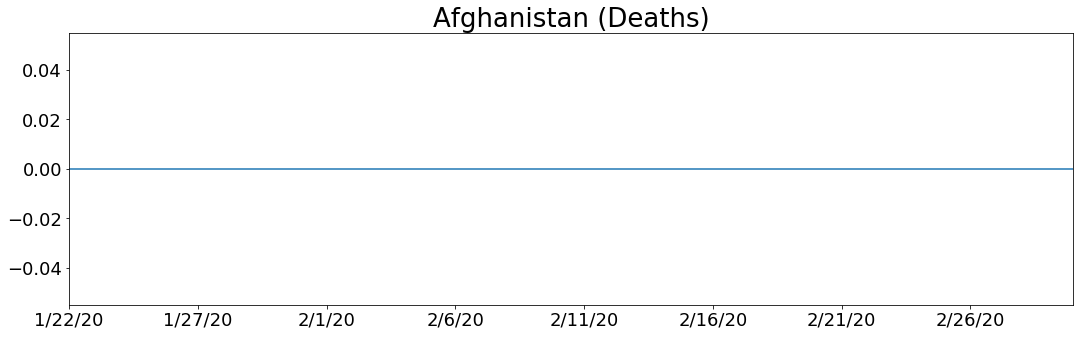

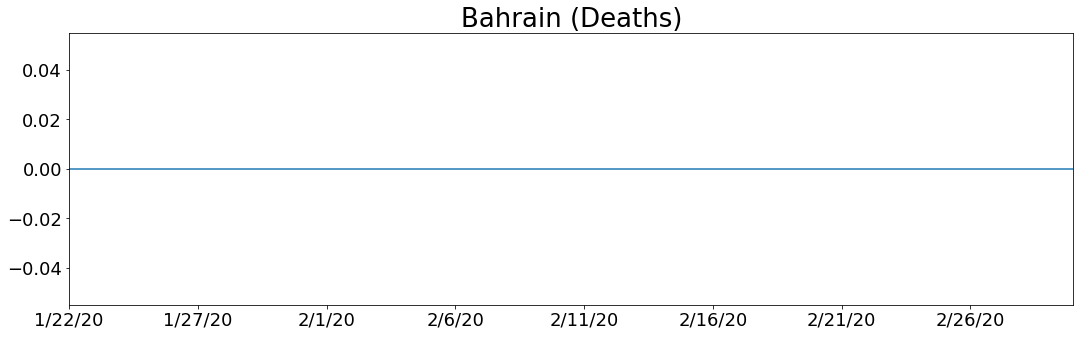

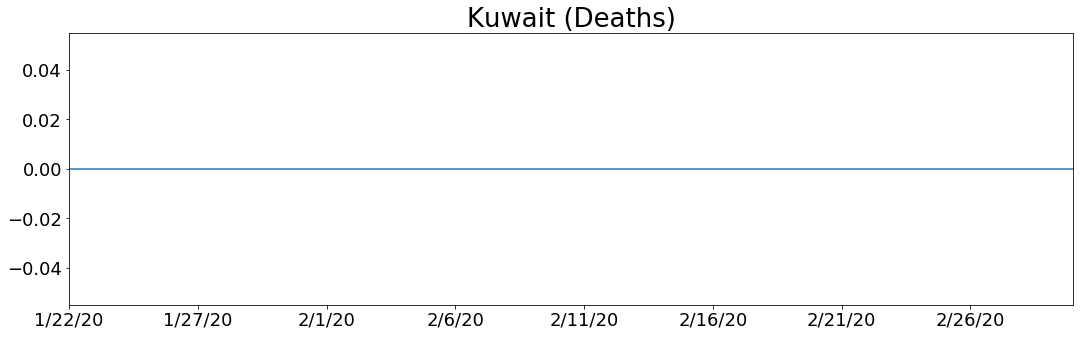

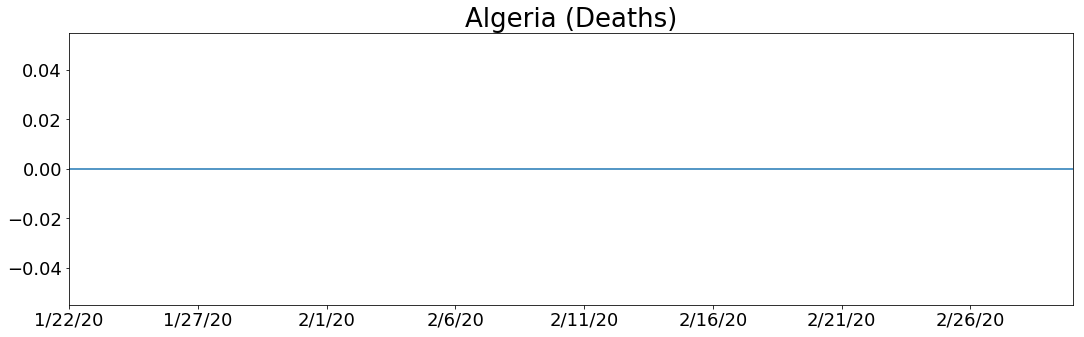

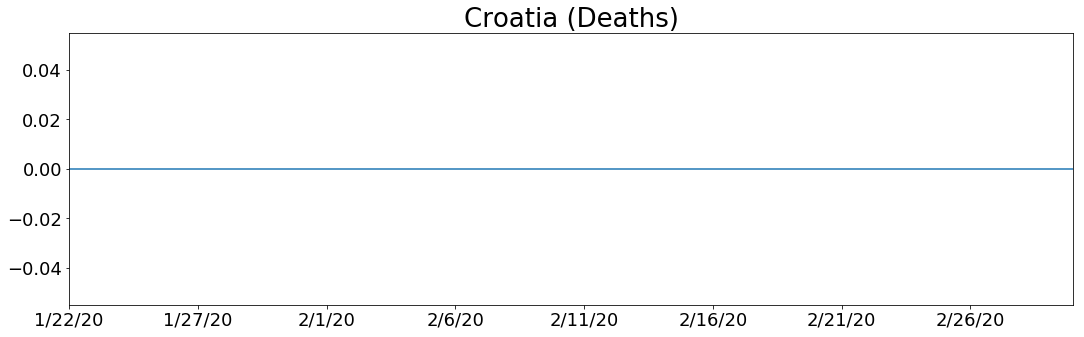

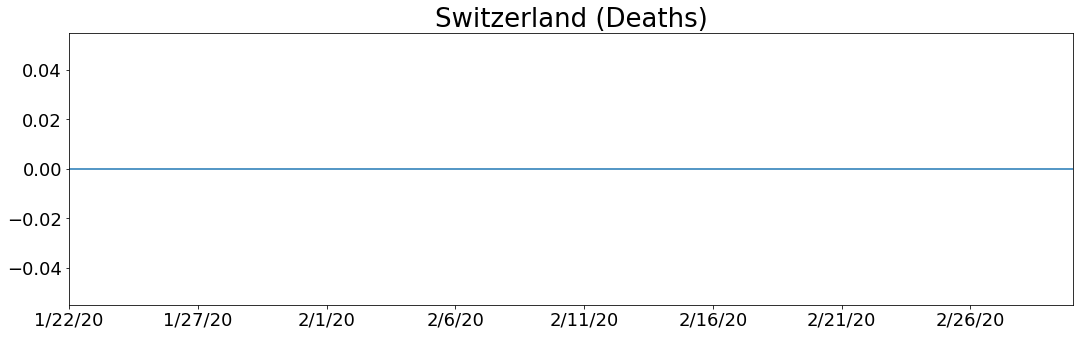

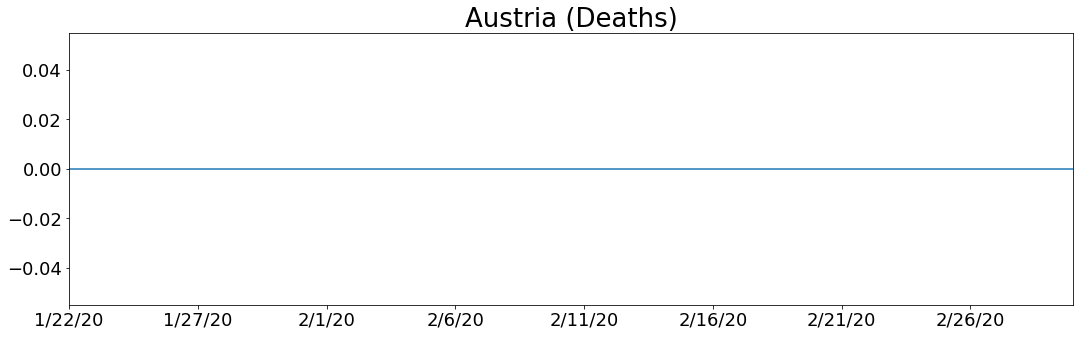

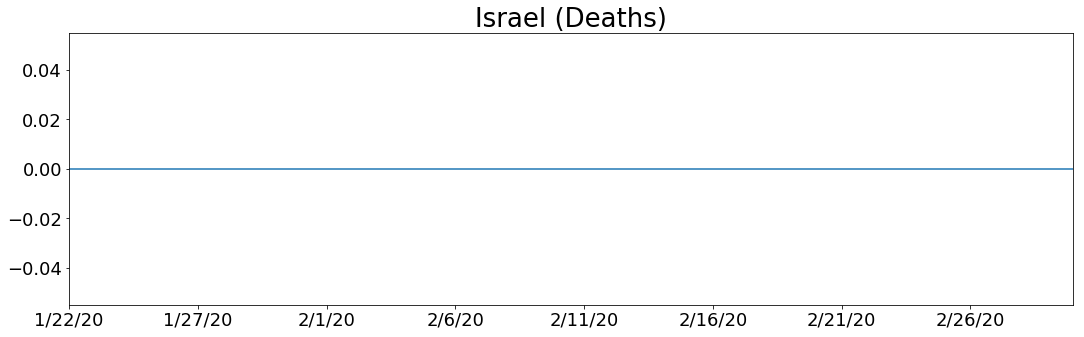

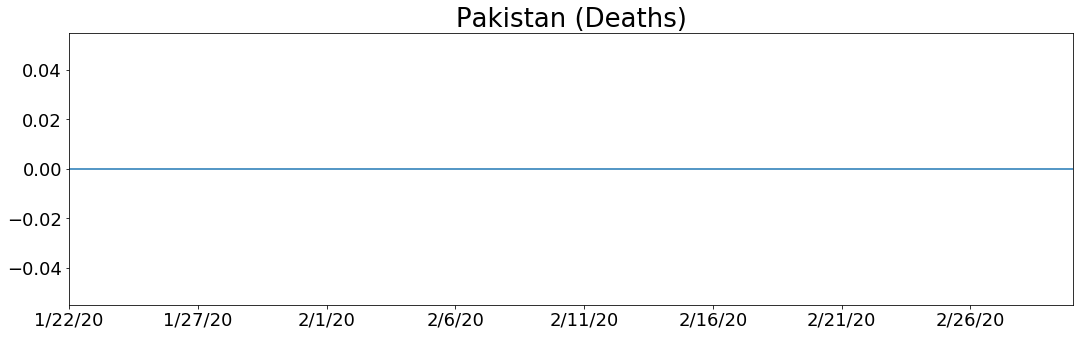

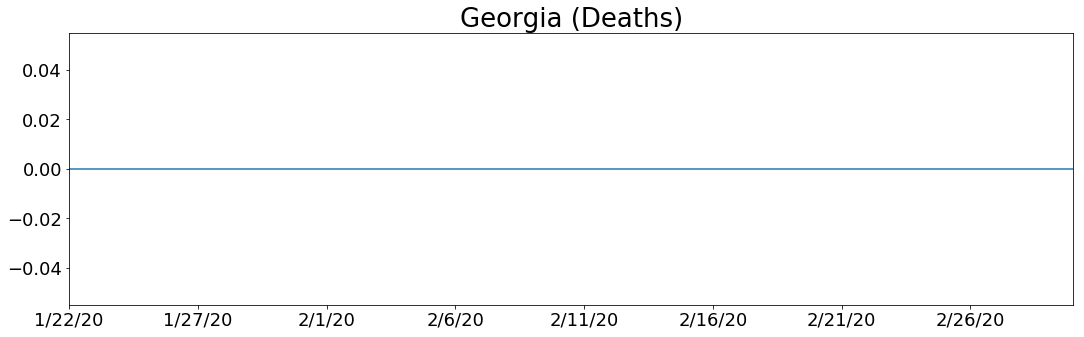

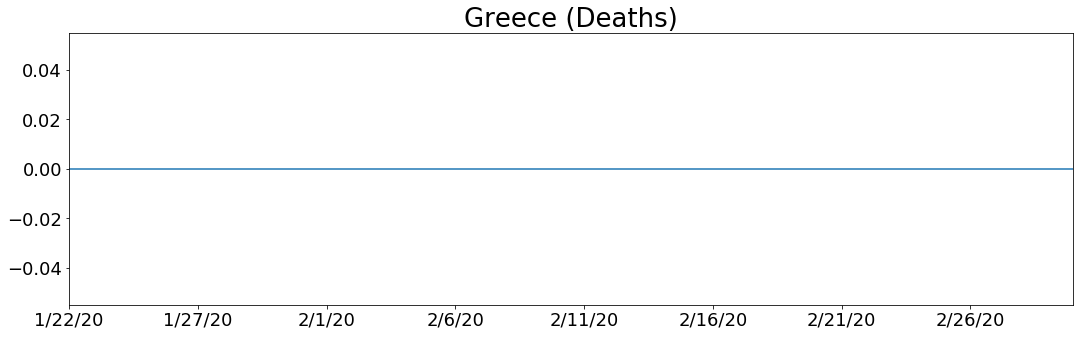

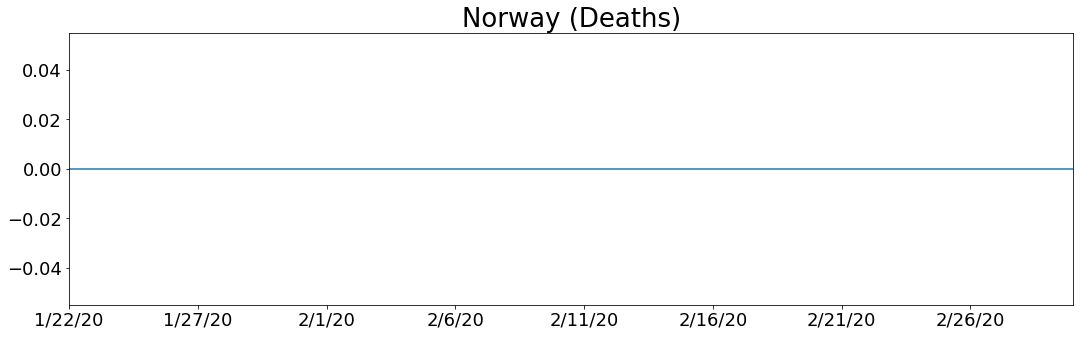

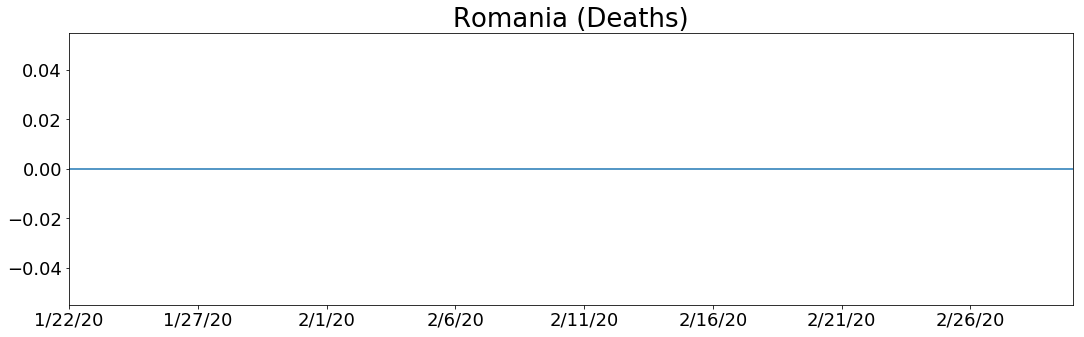

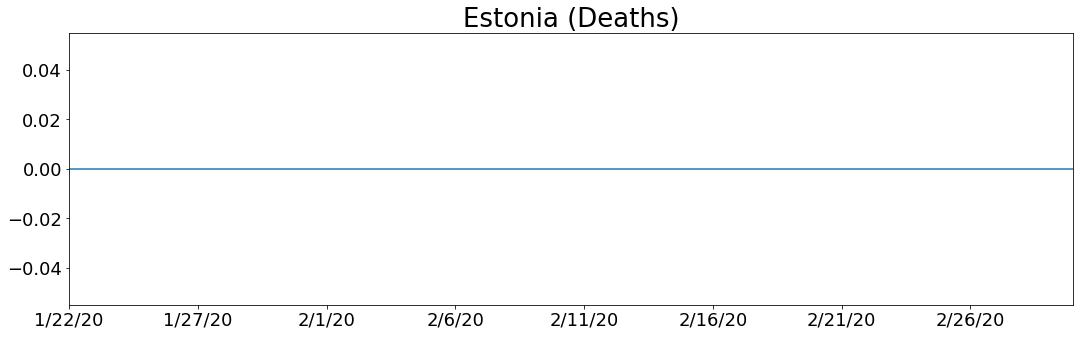

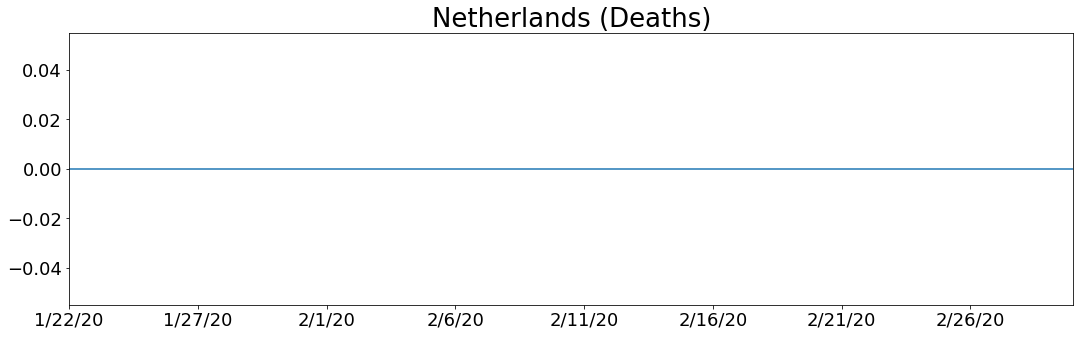

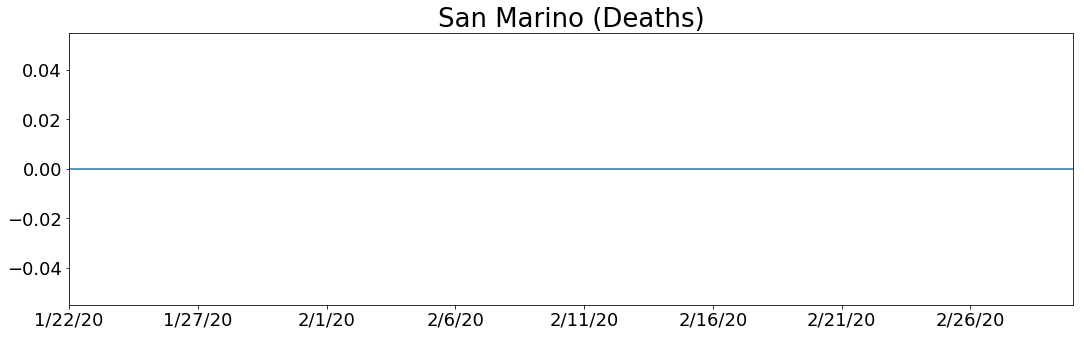

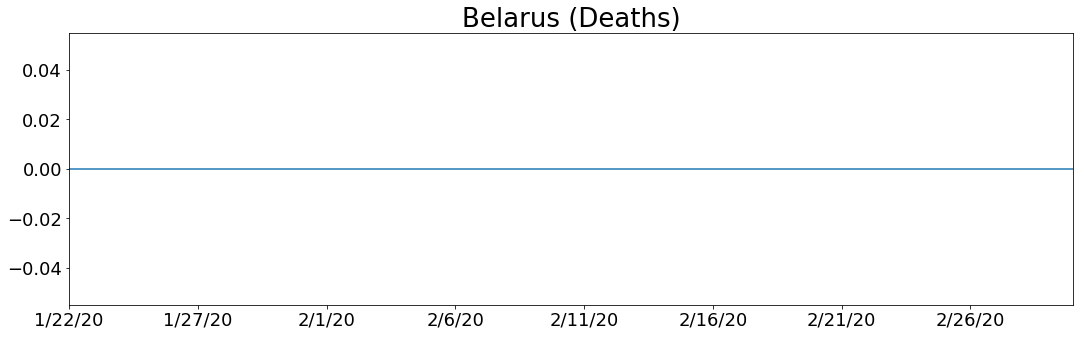

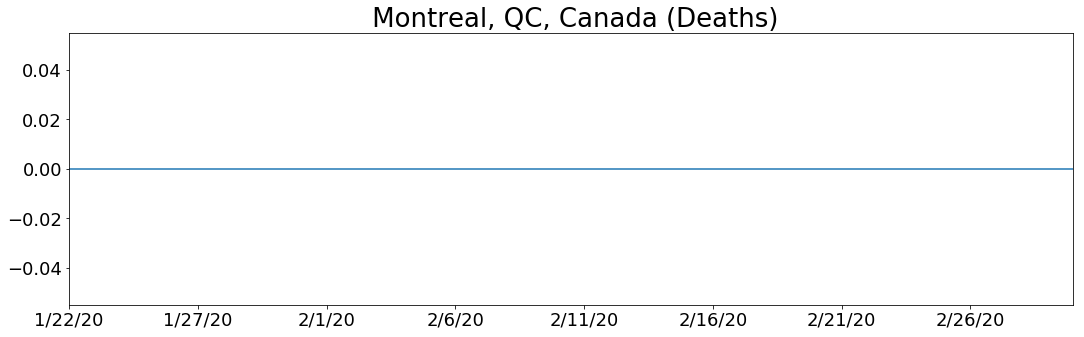

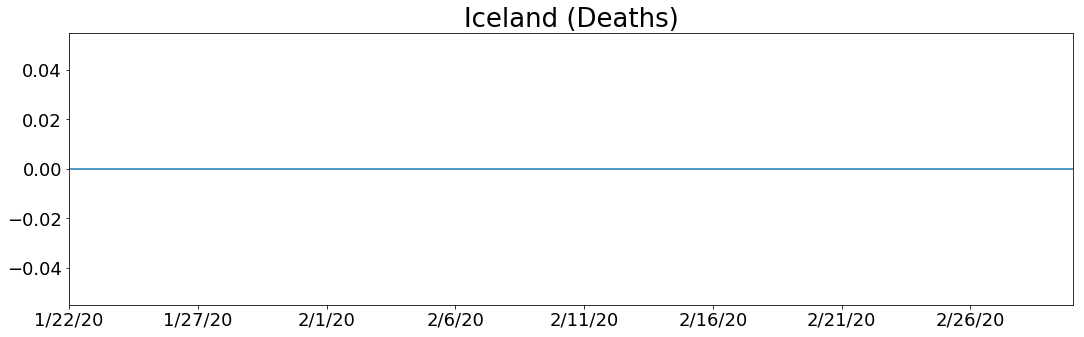

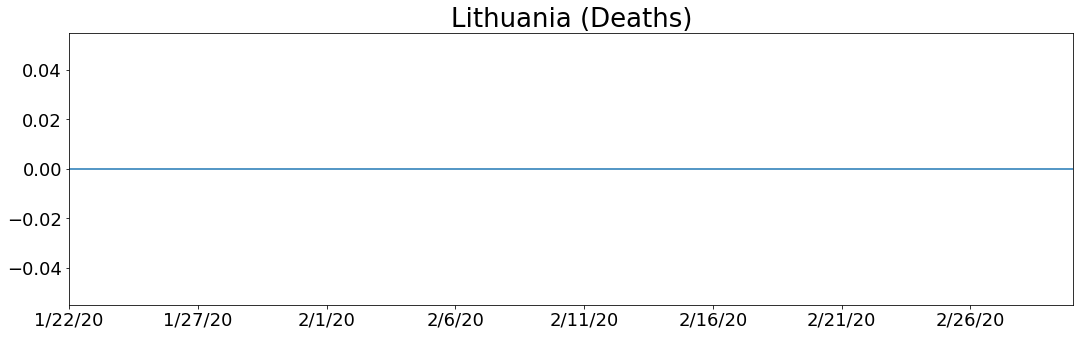

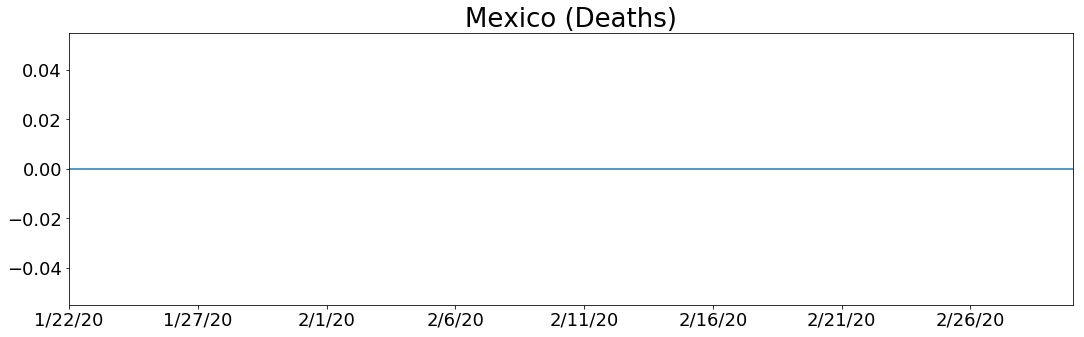

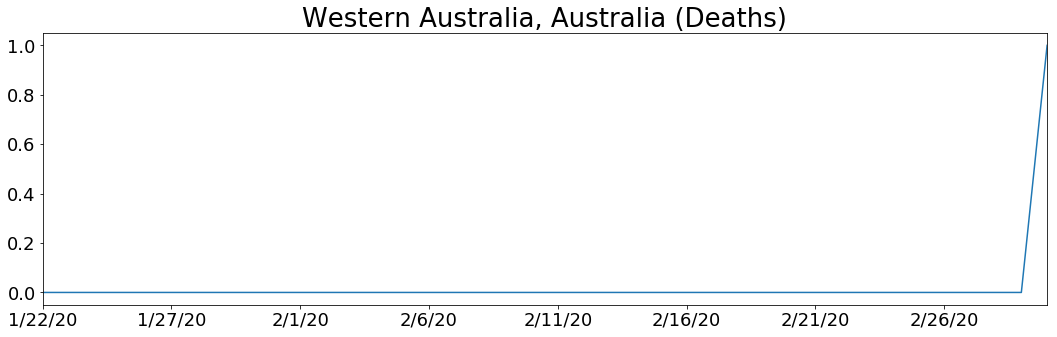

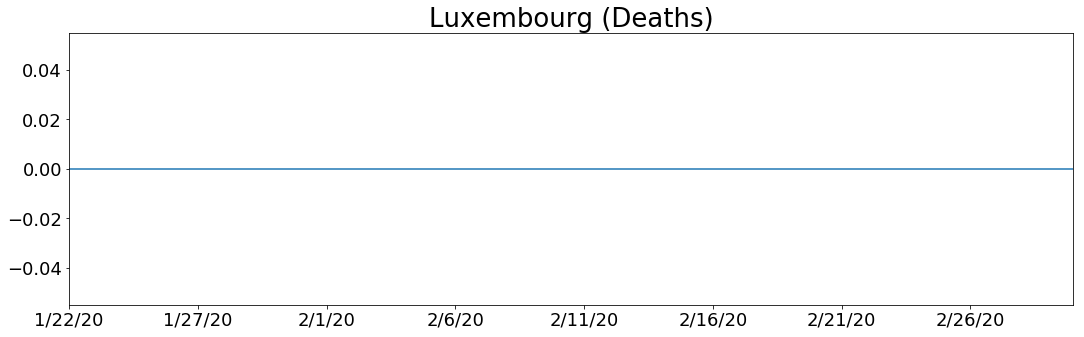

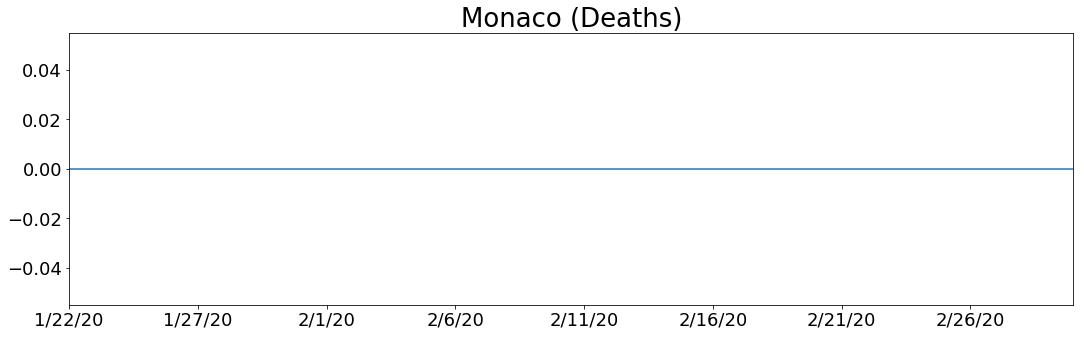

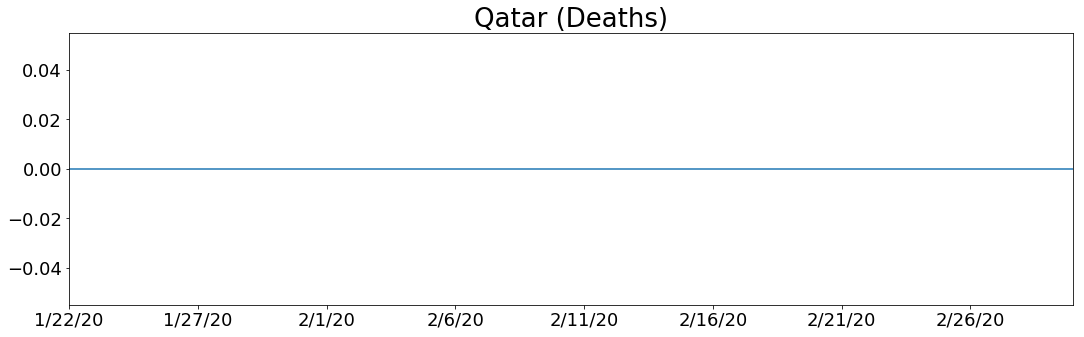

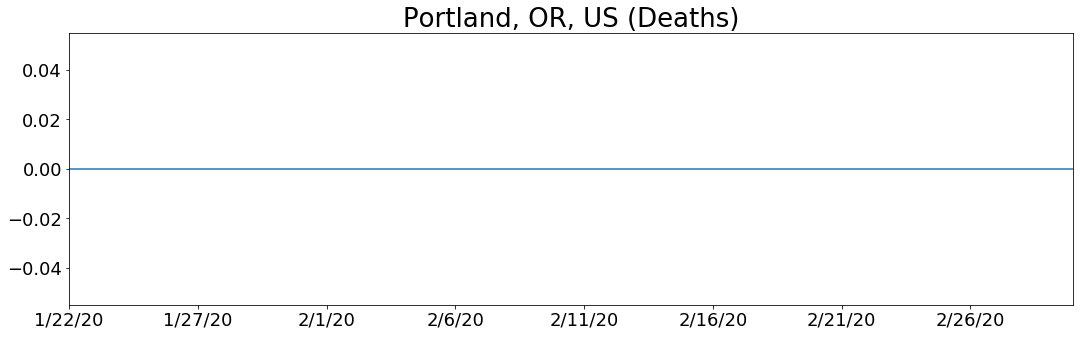

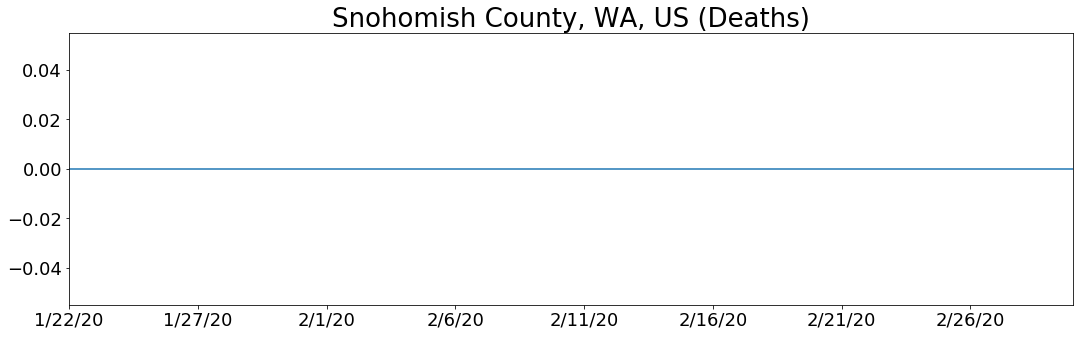

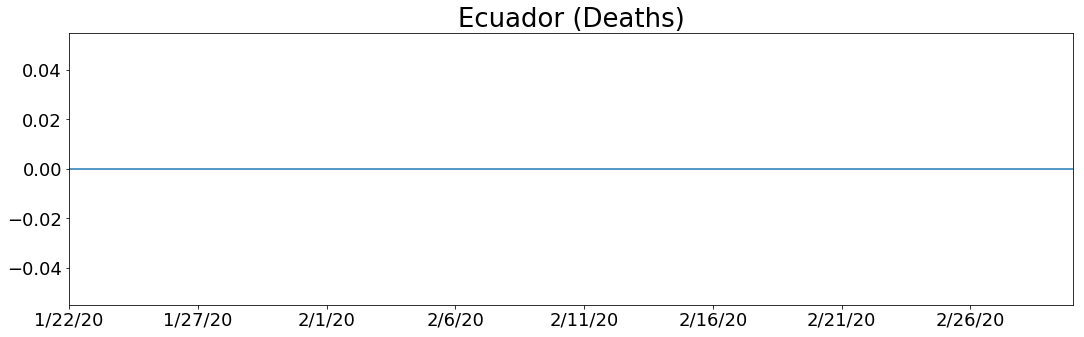

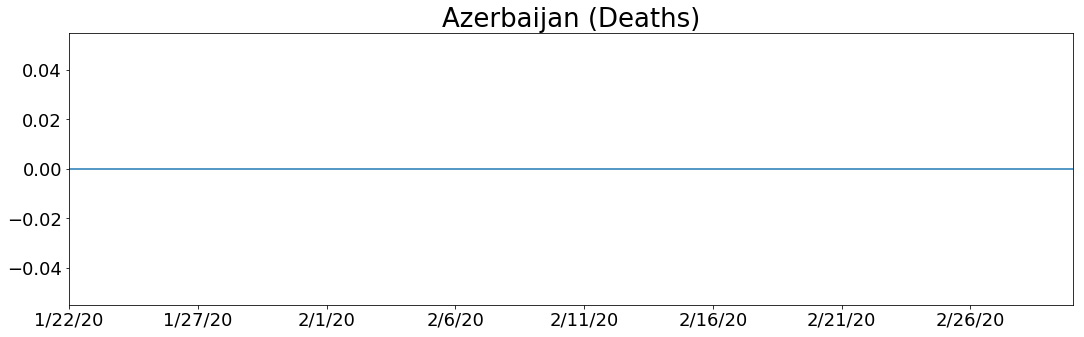

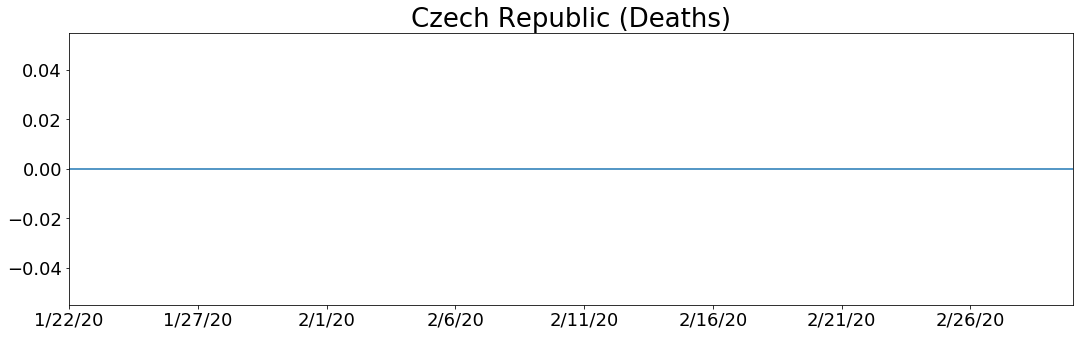

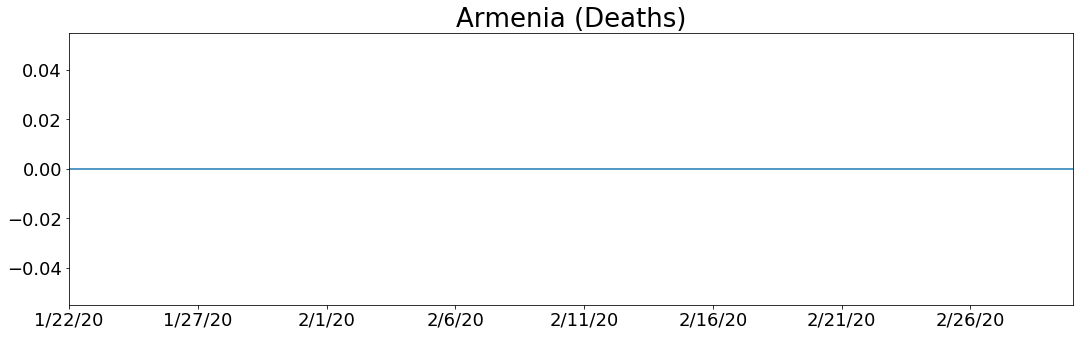

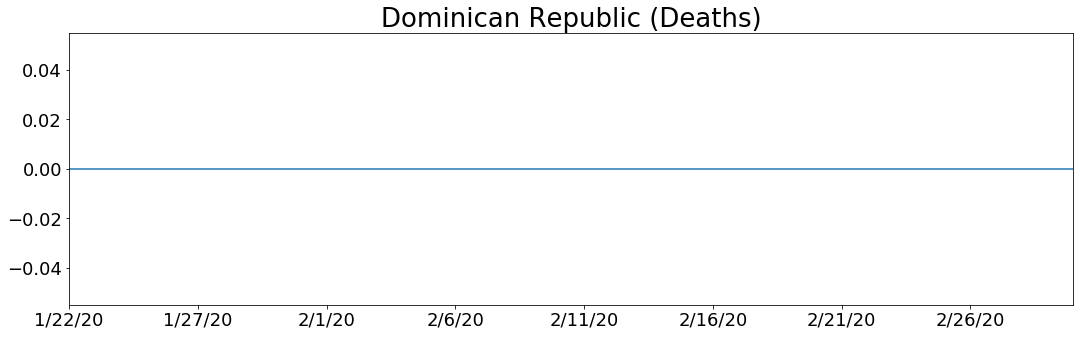

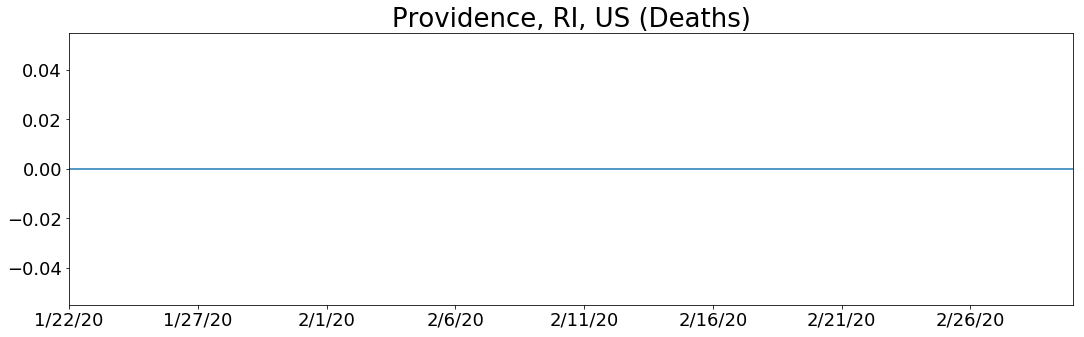

In [23]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Deaths by Date"
for index, row in time_series_covid_19_deaths.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Deaths)")
    else:
        plt.title(row["Country/Region"] + " (Deaths)")
    plt.show()

# Recovered

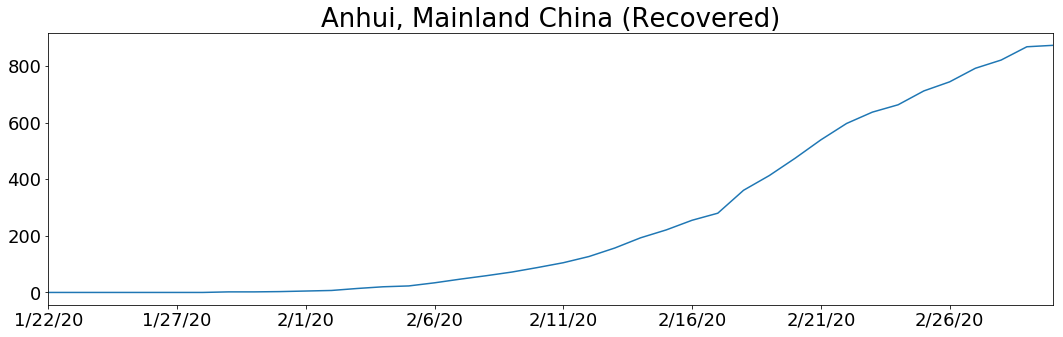

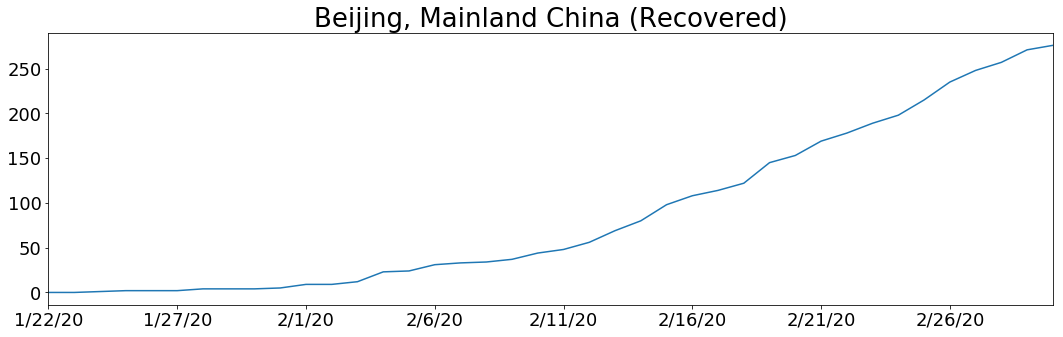

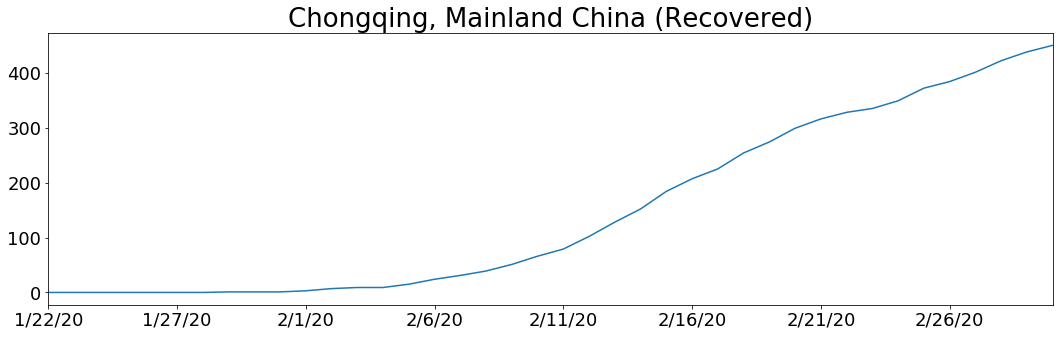

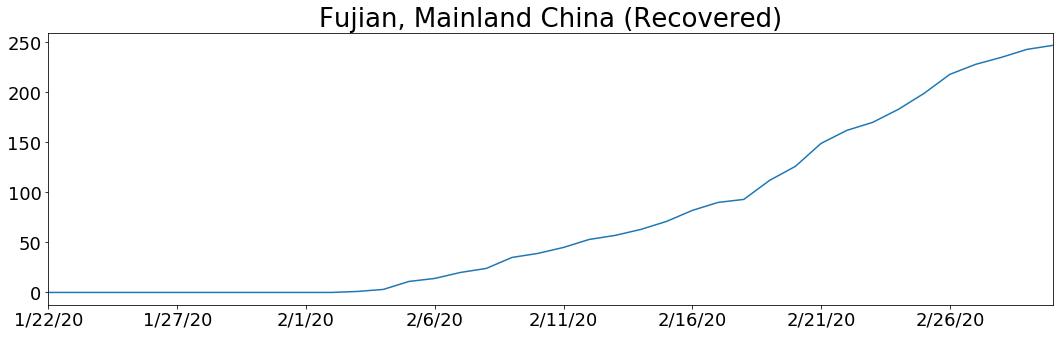

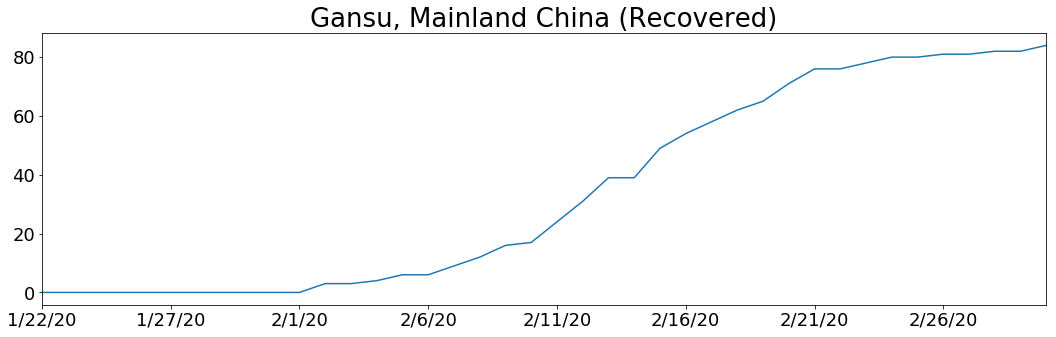

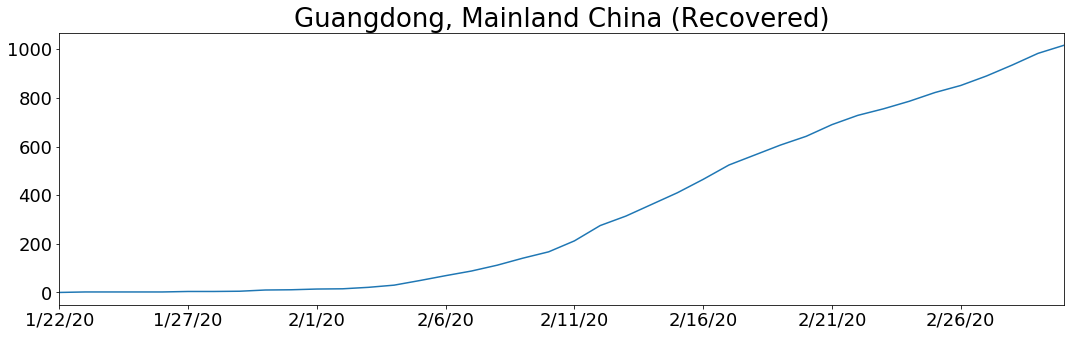

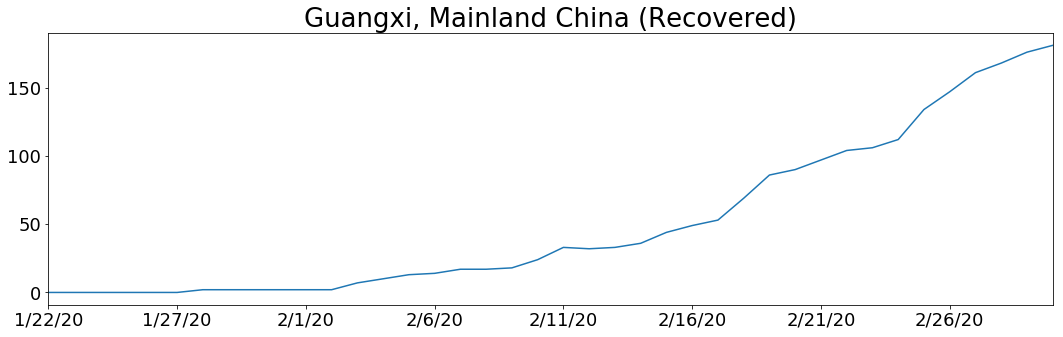

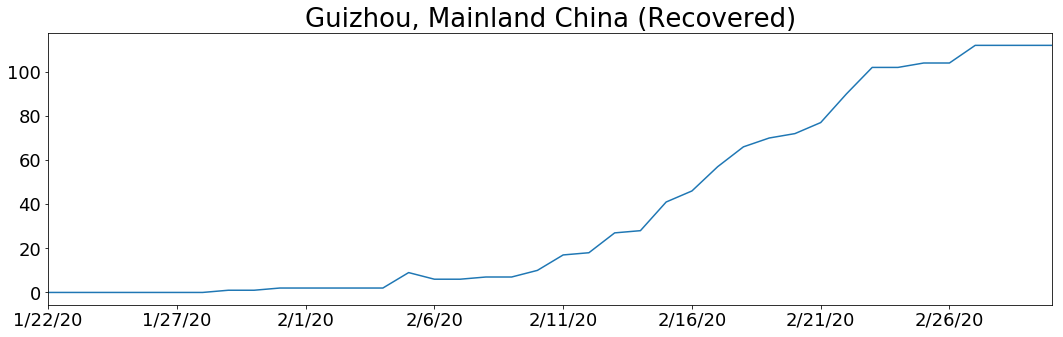

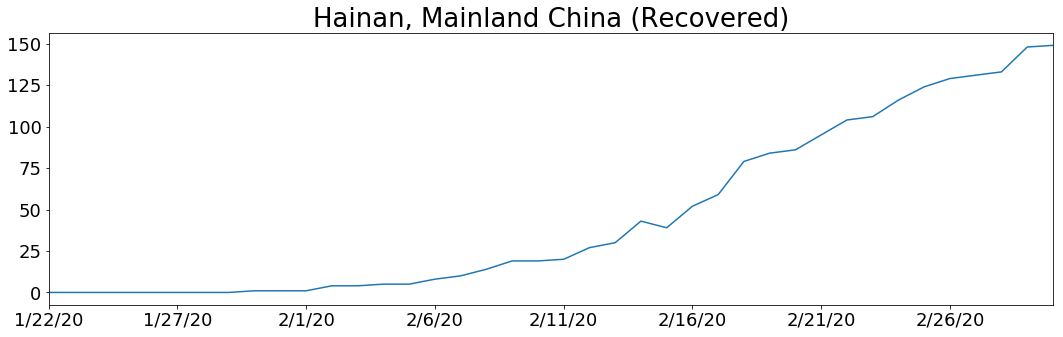

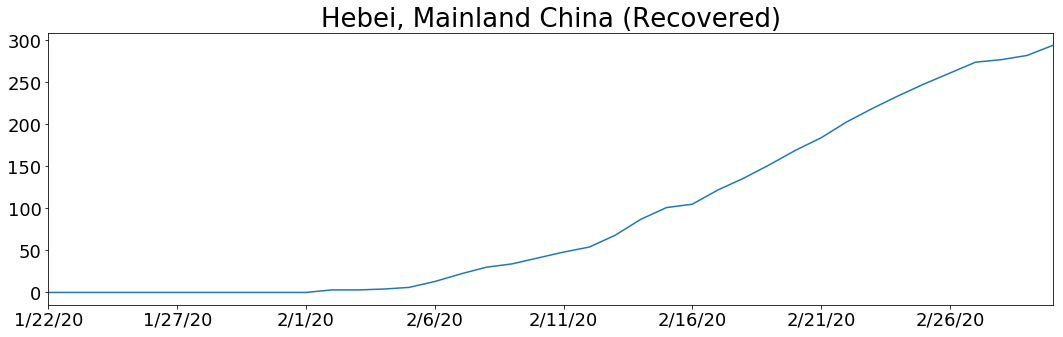

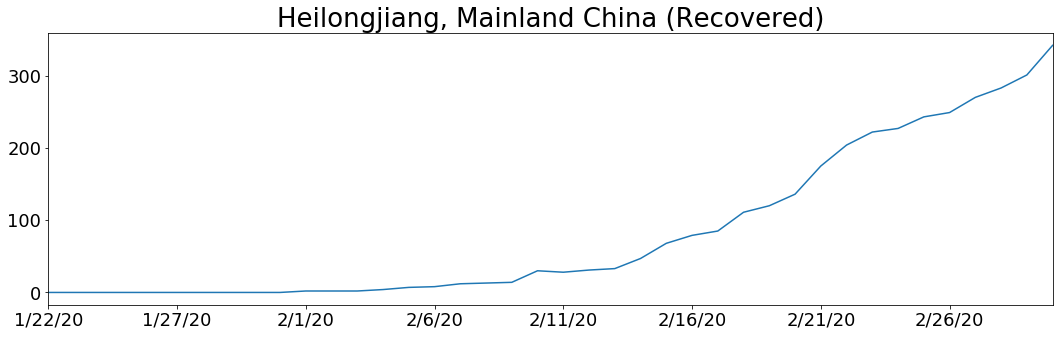

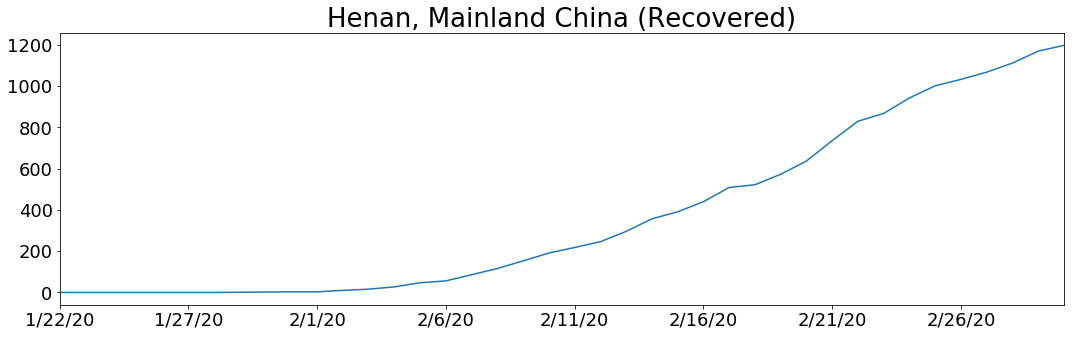

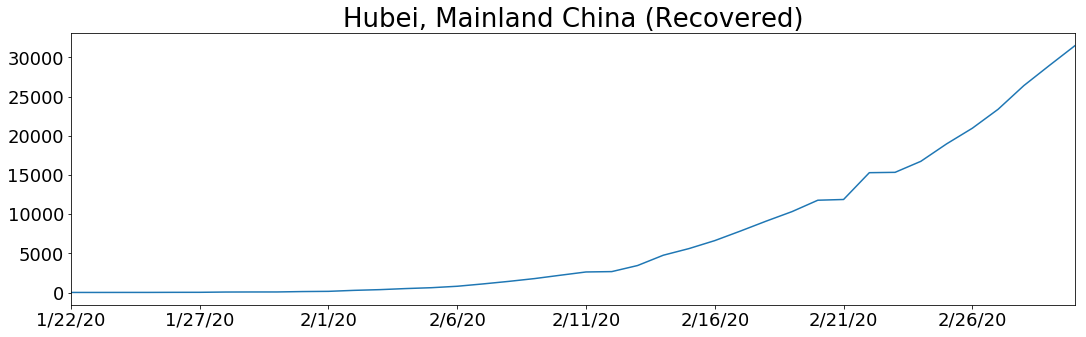

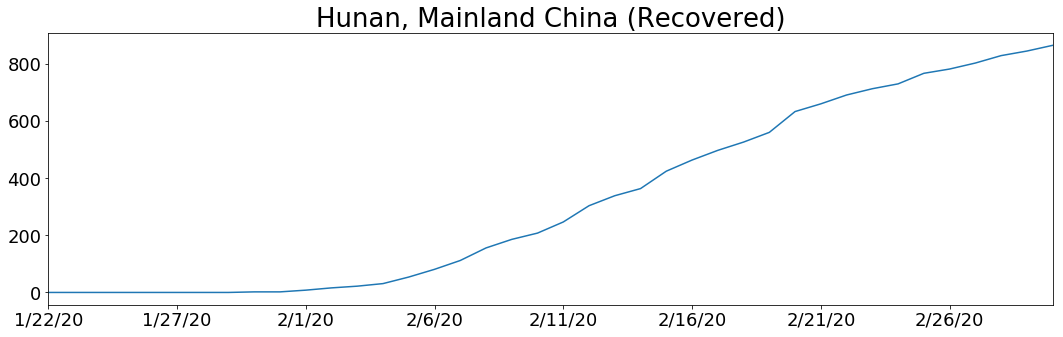

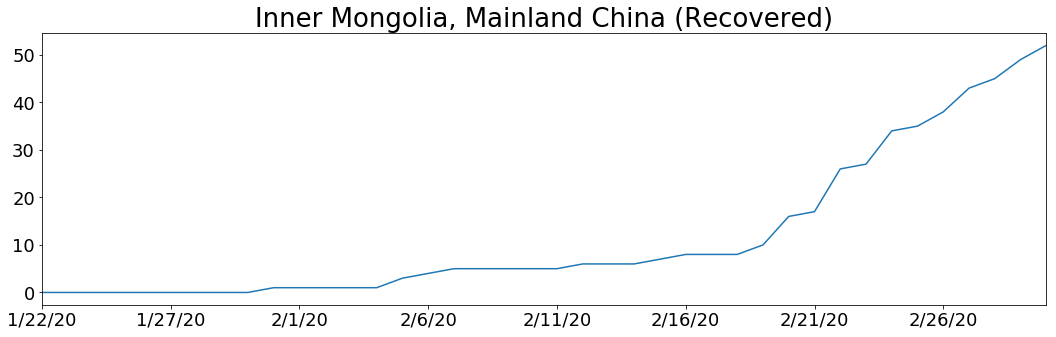

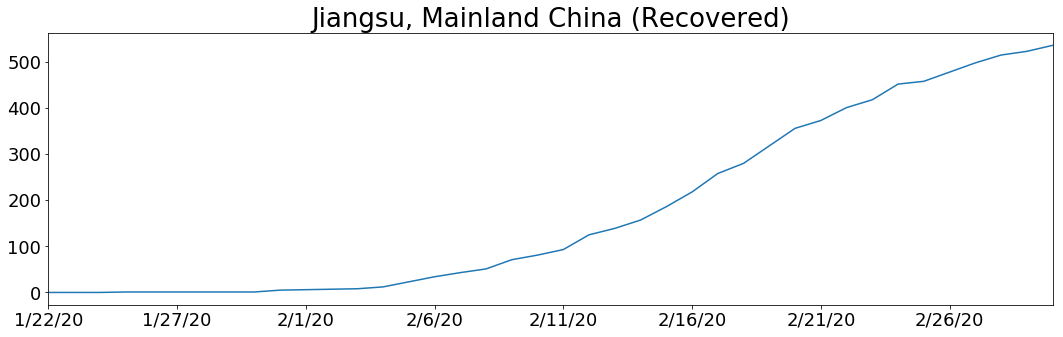

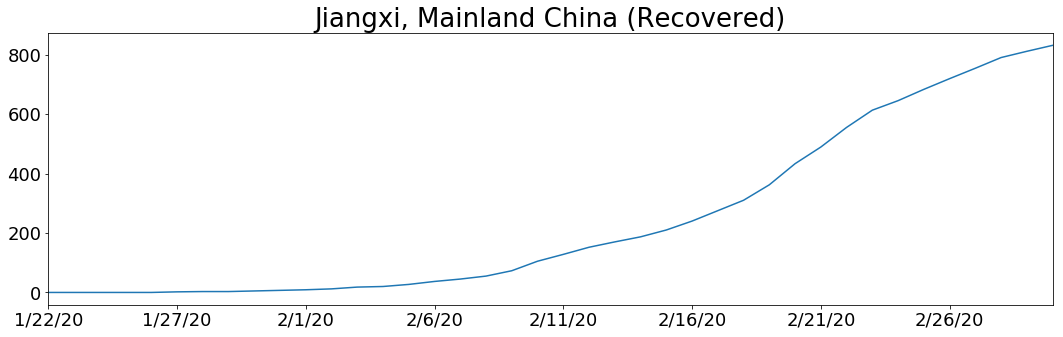

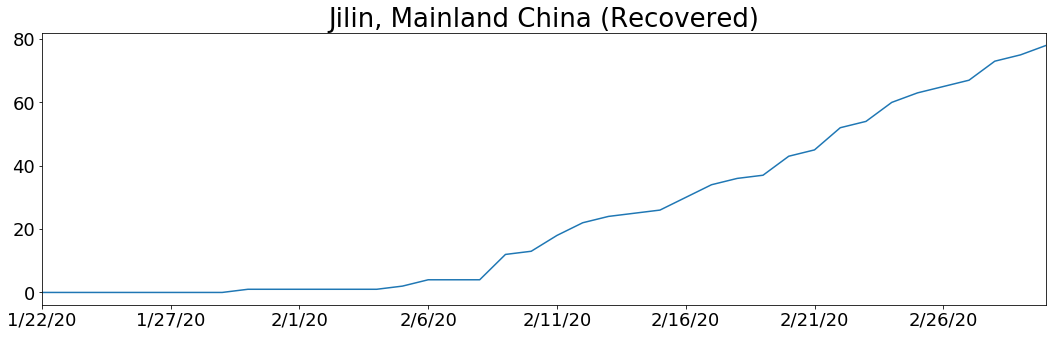

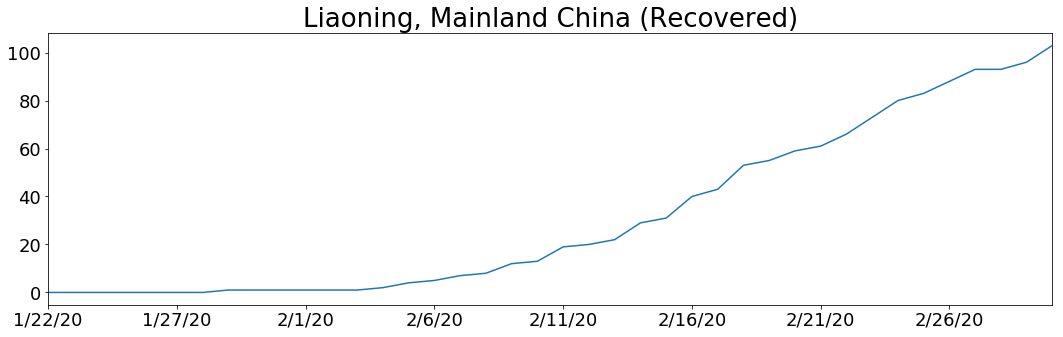

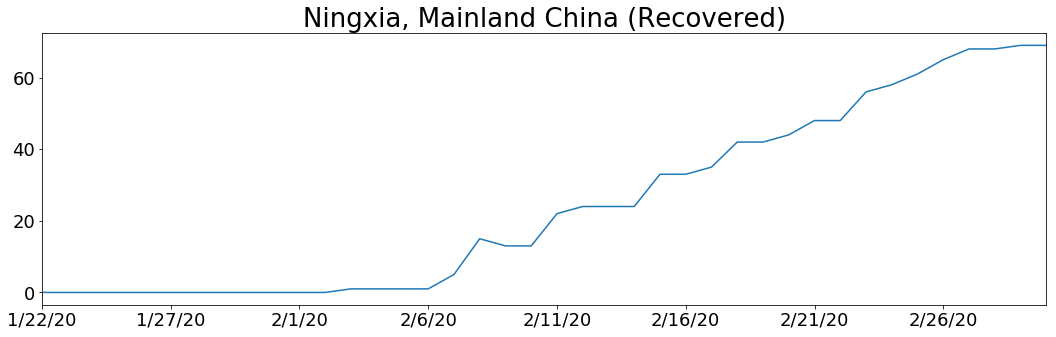

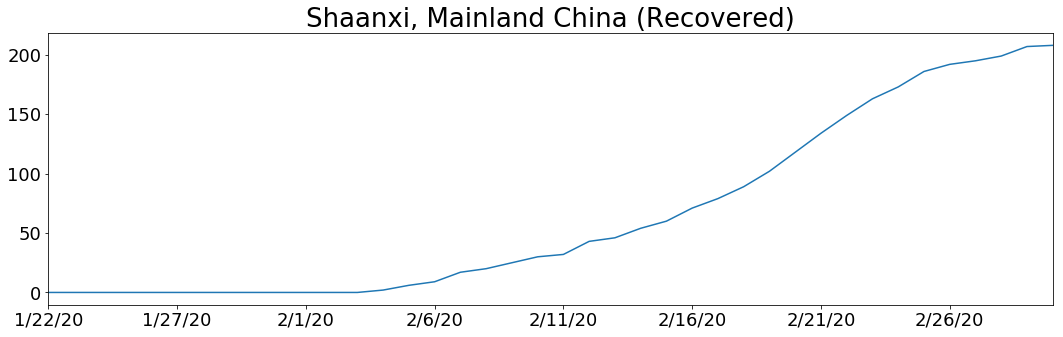

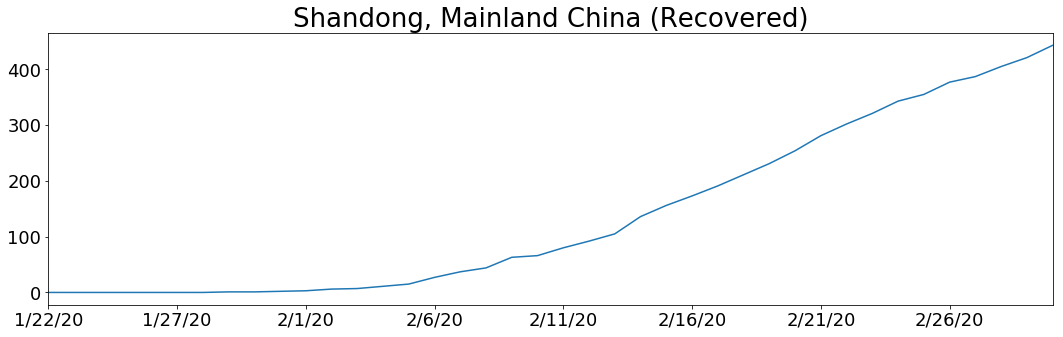

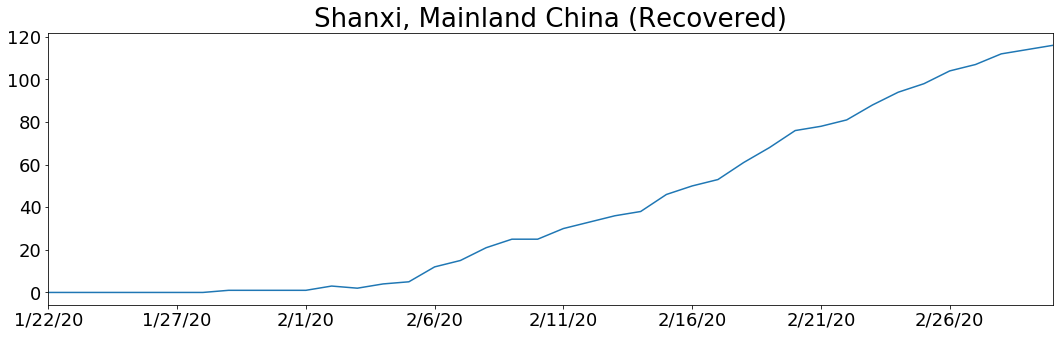

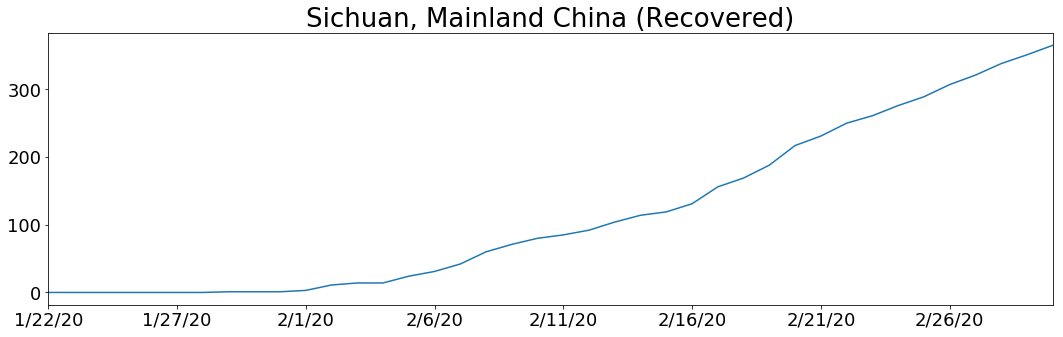

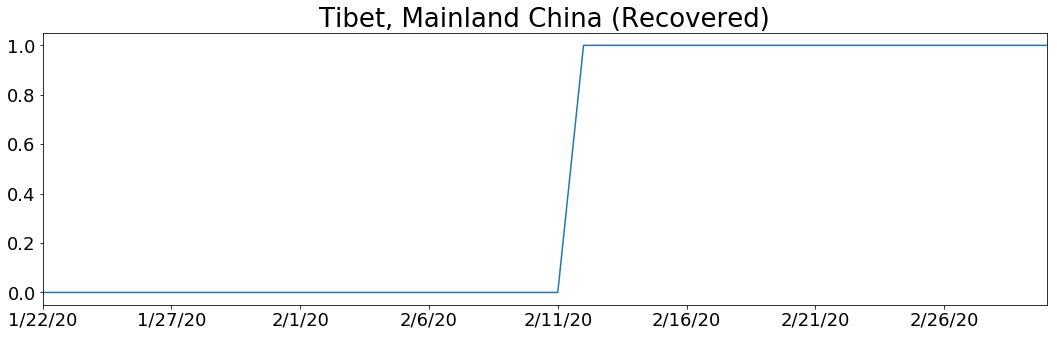

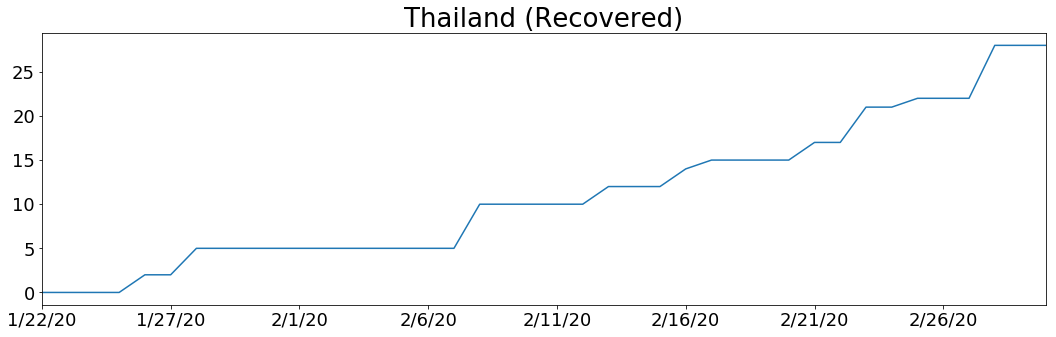

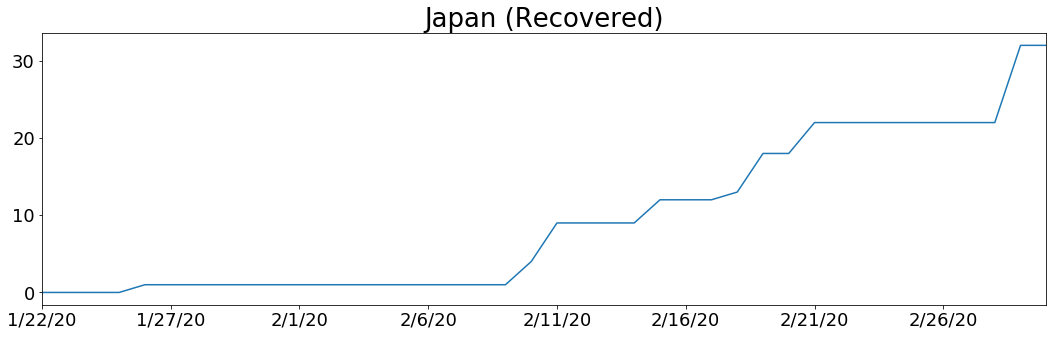

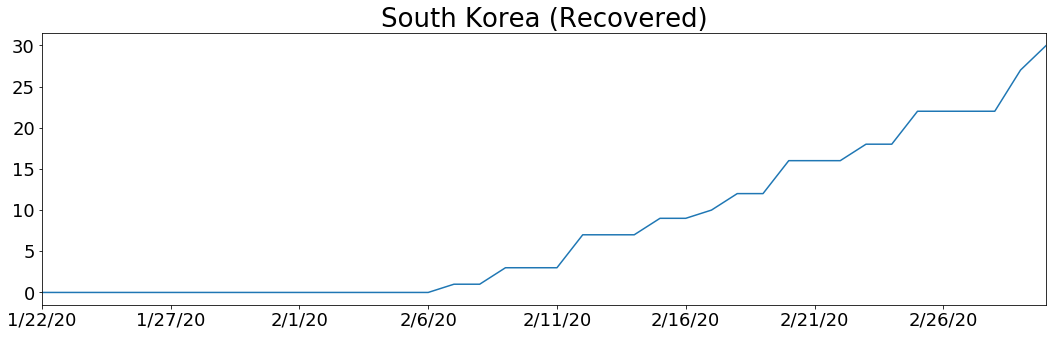

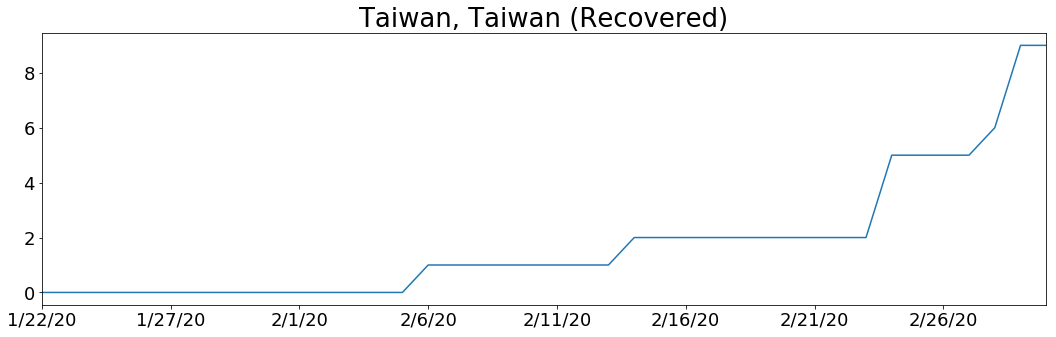

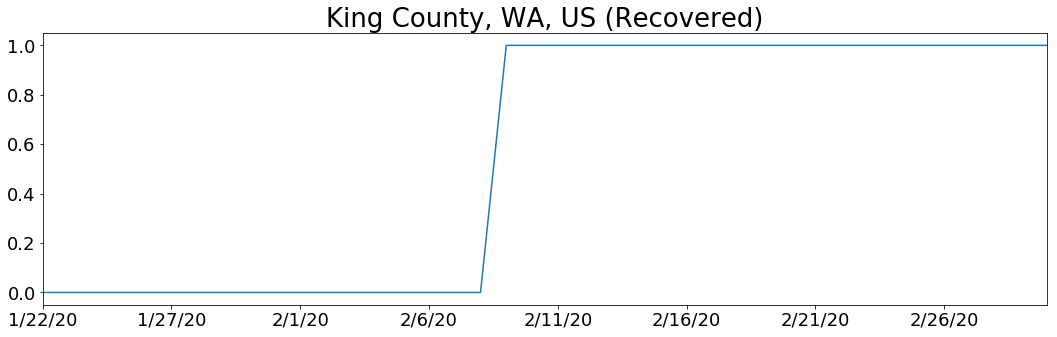

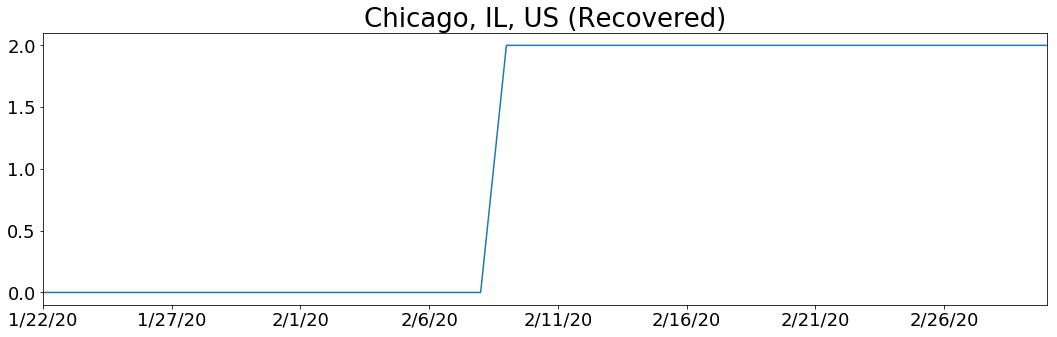

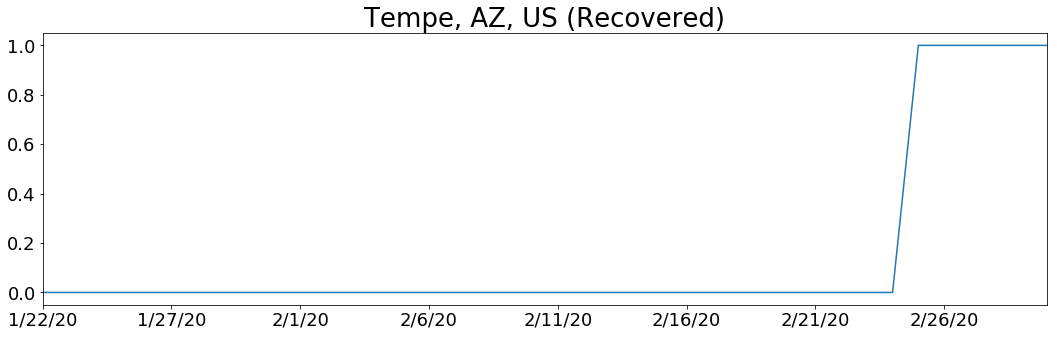

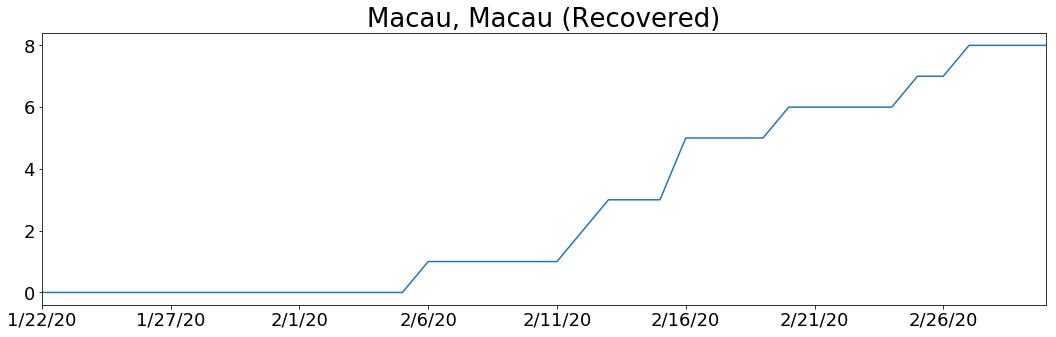

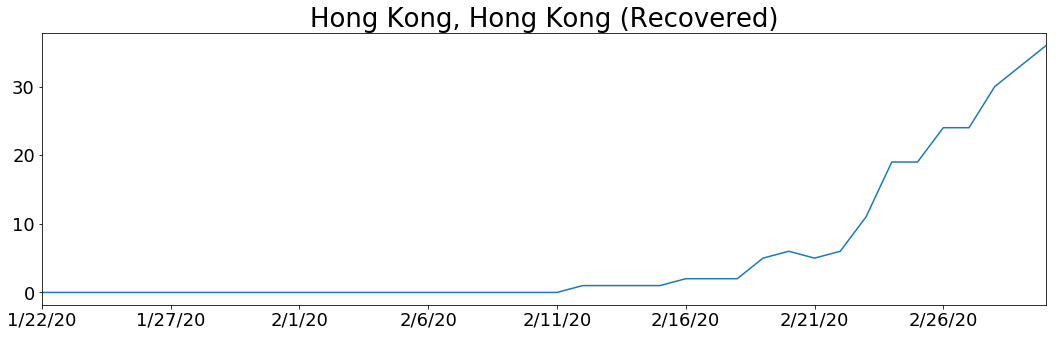

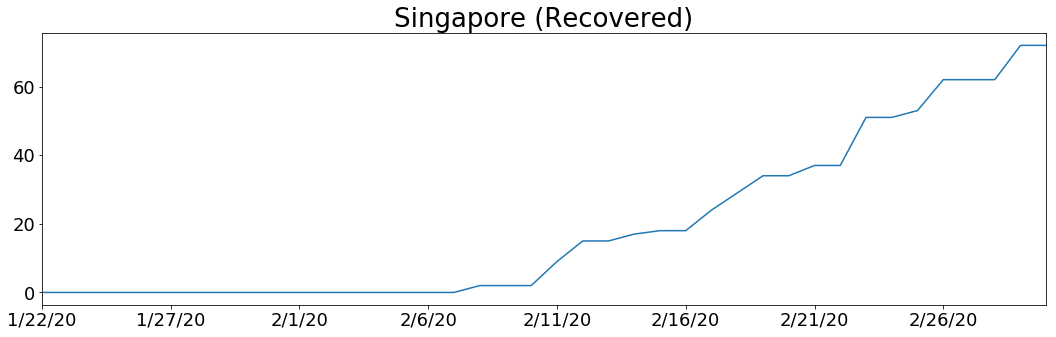

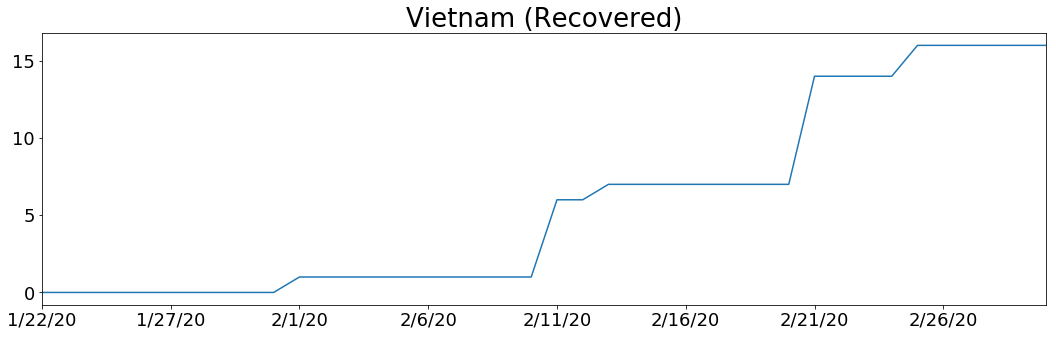

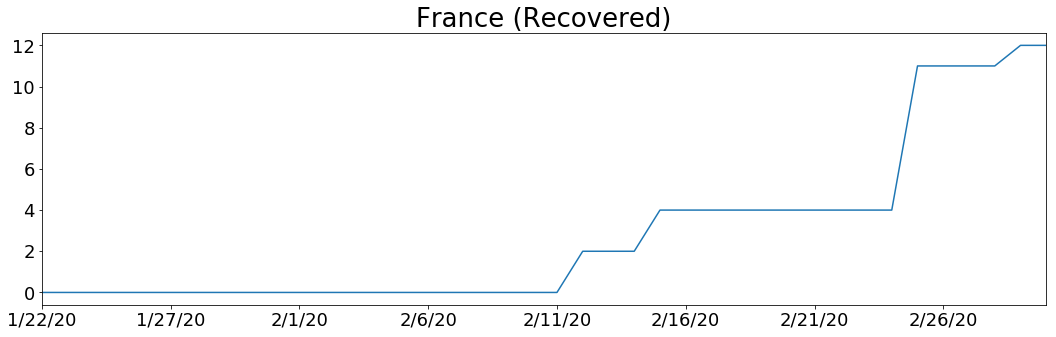

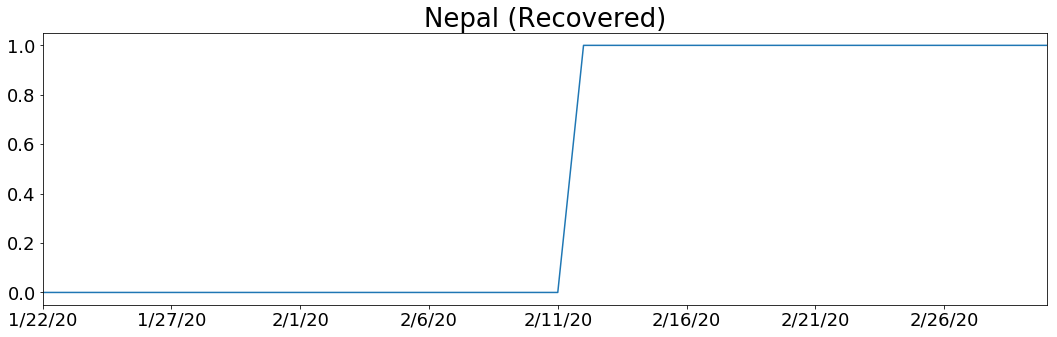

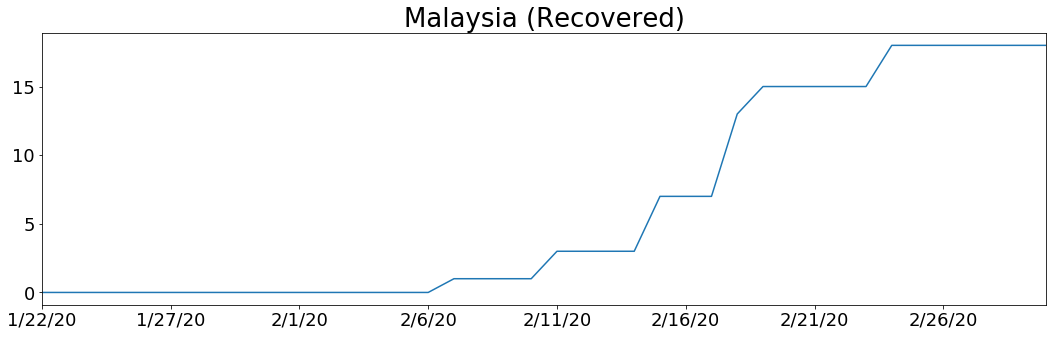

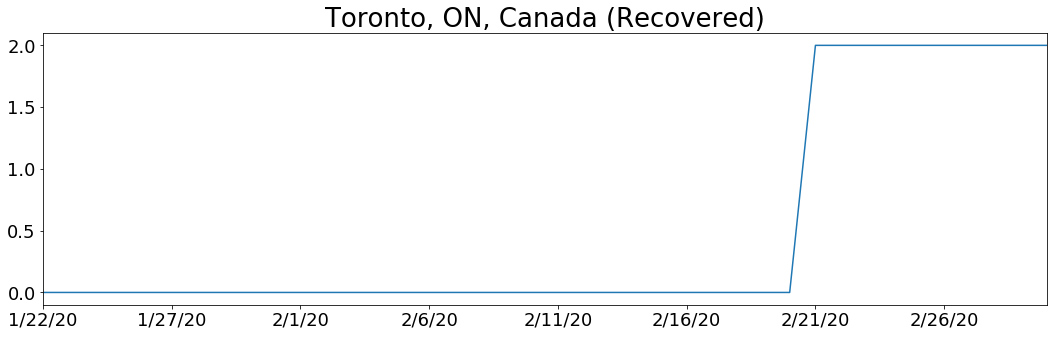

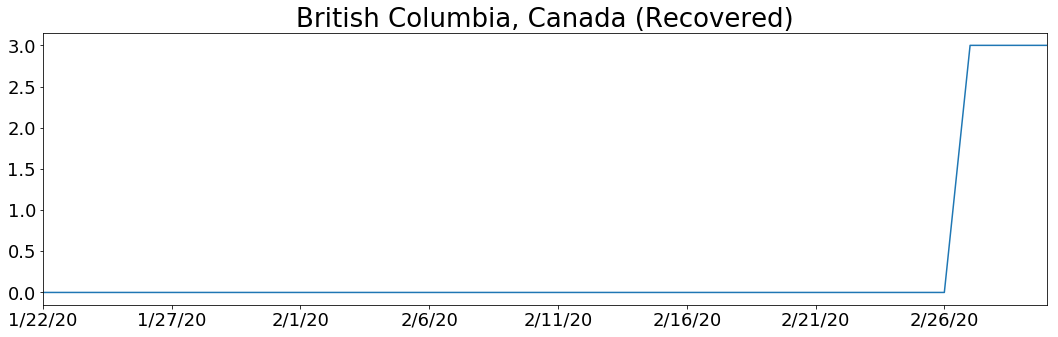

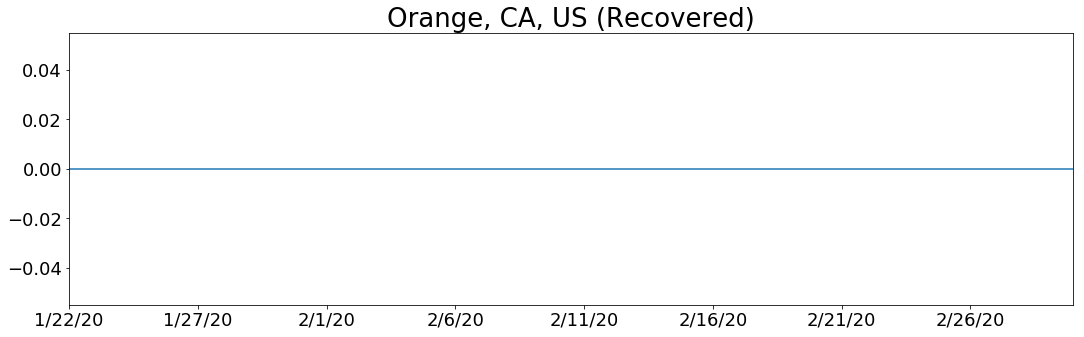

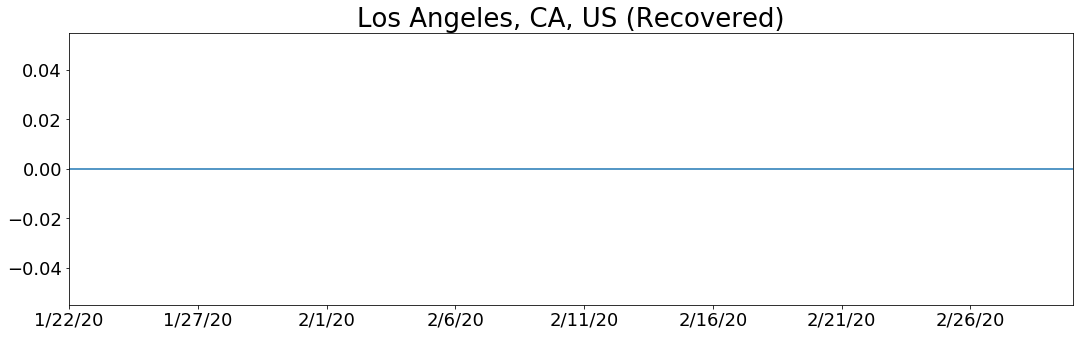

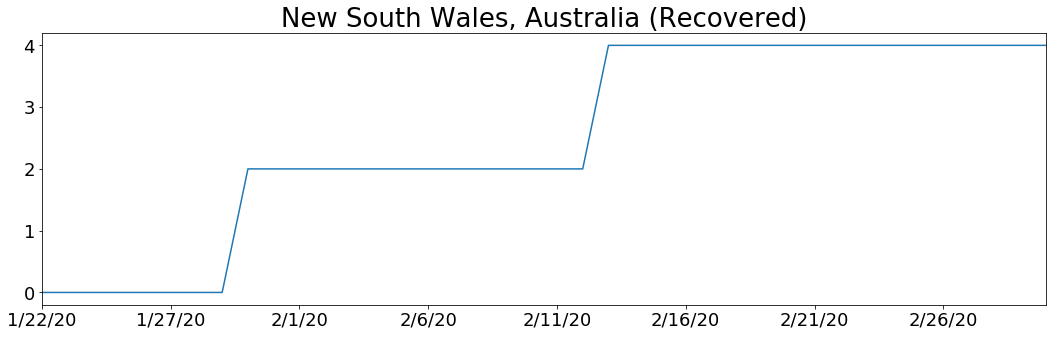

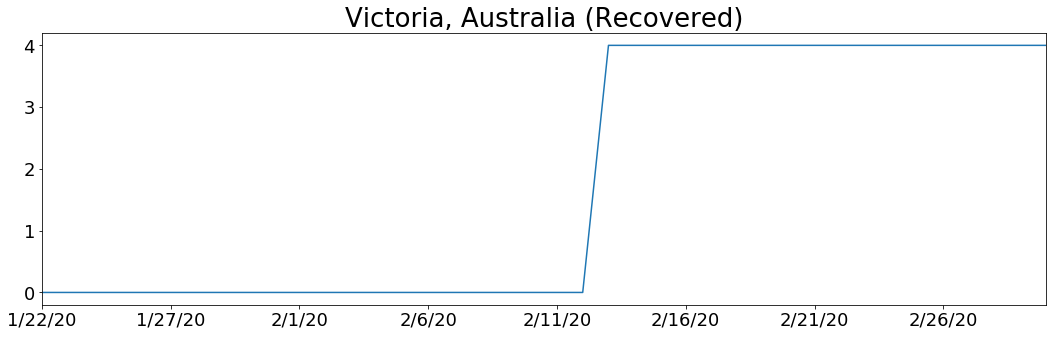

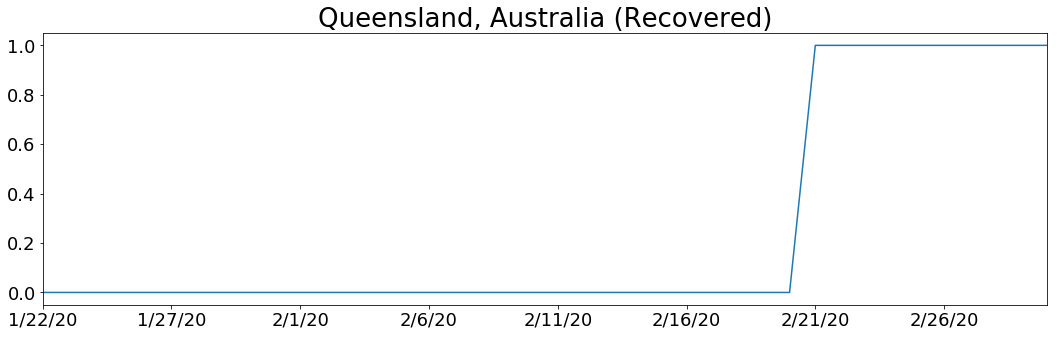

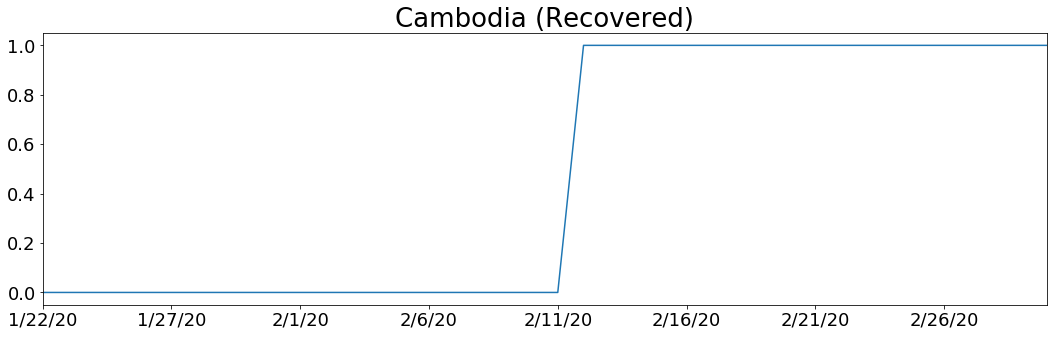

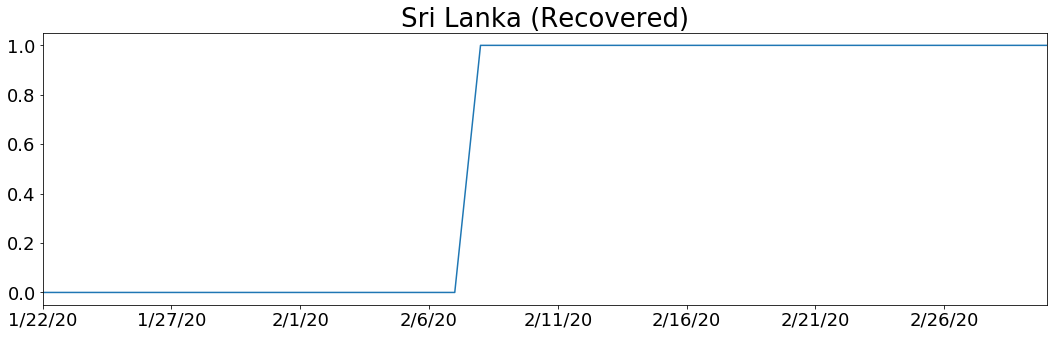

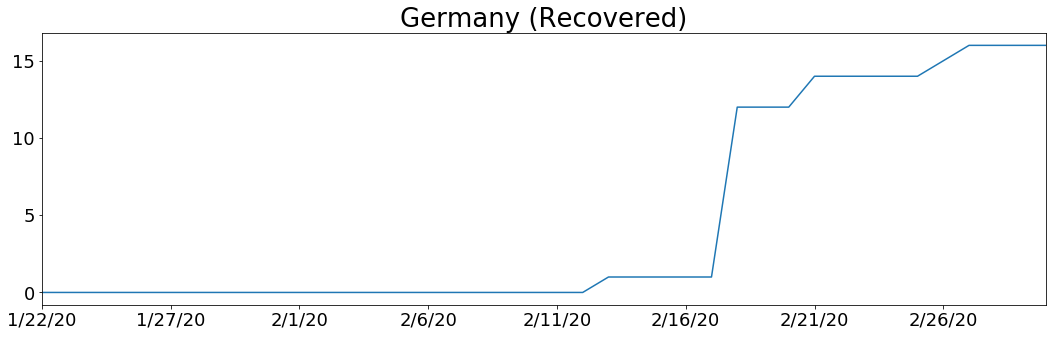

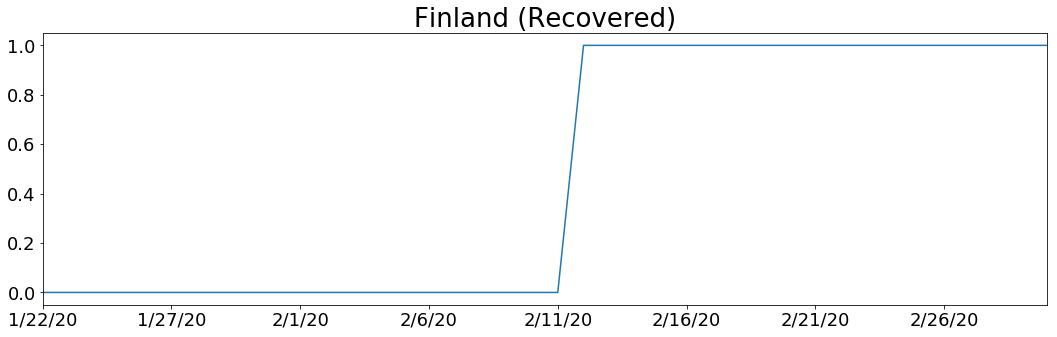

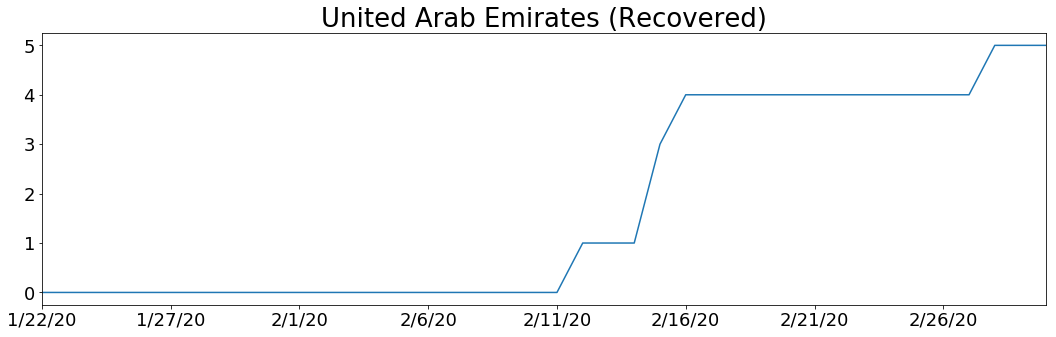

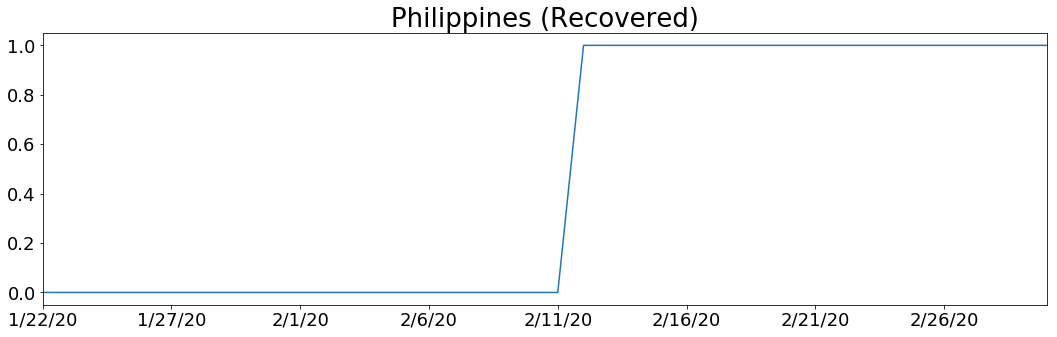

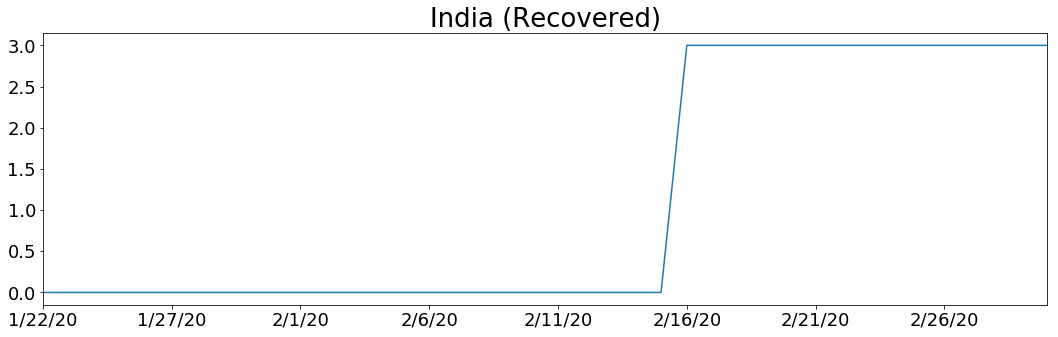

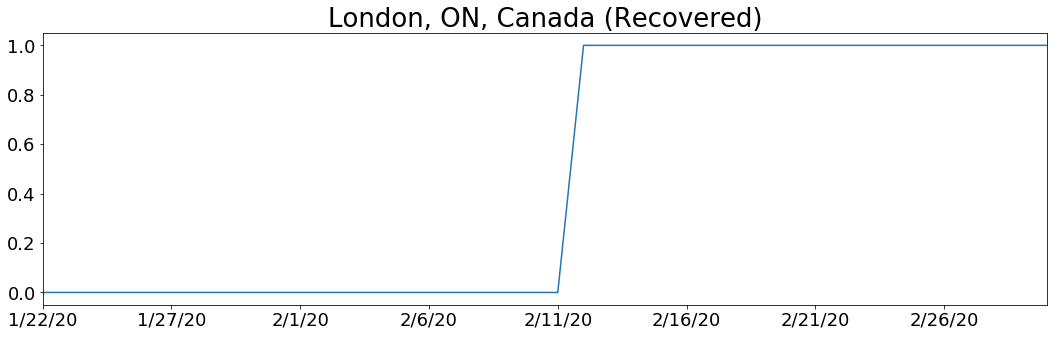

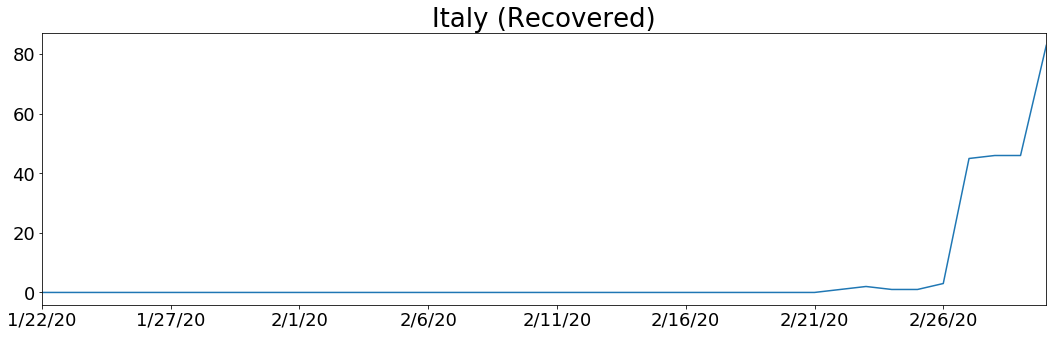

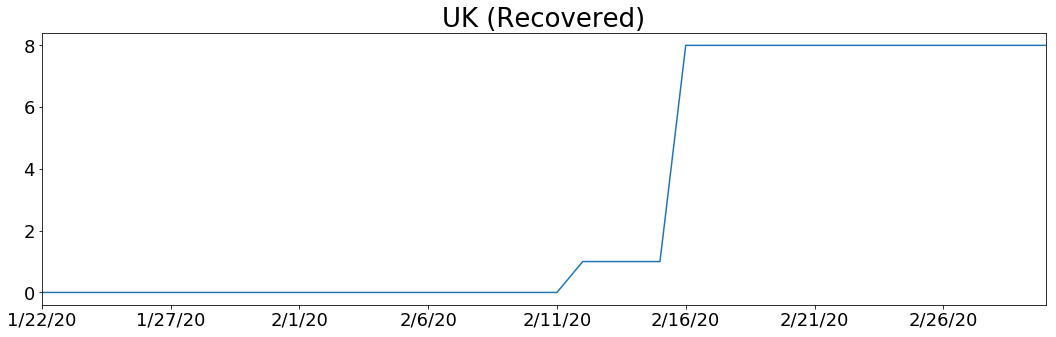

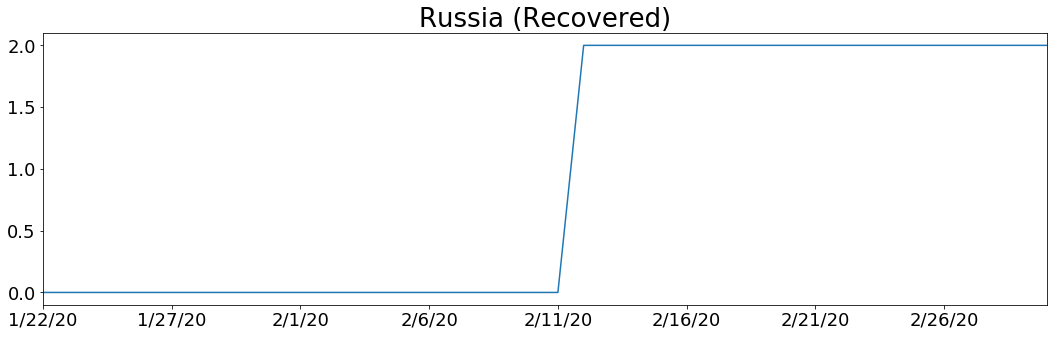

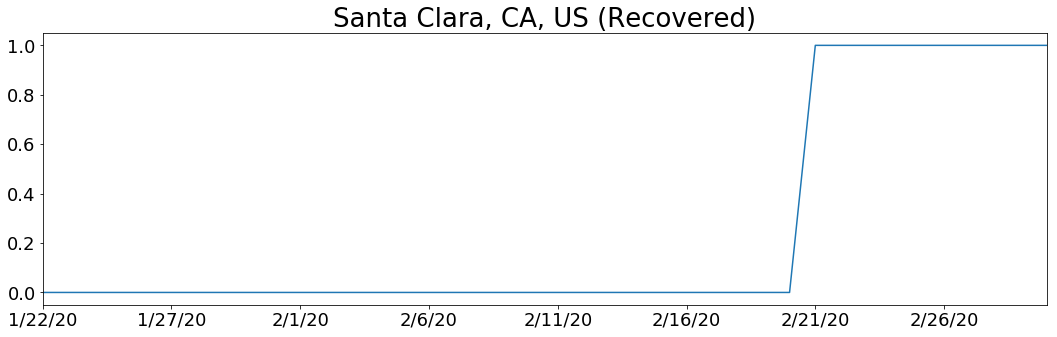

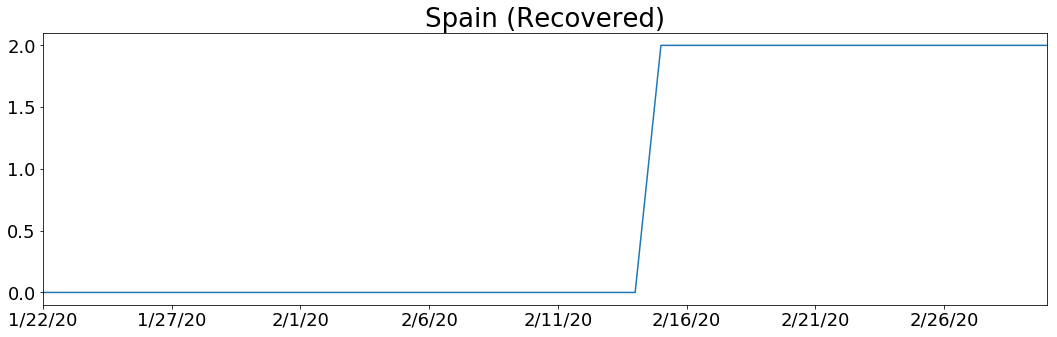

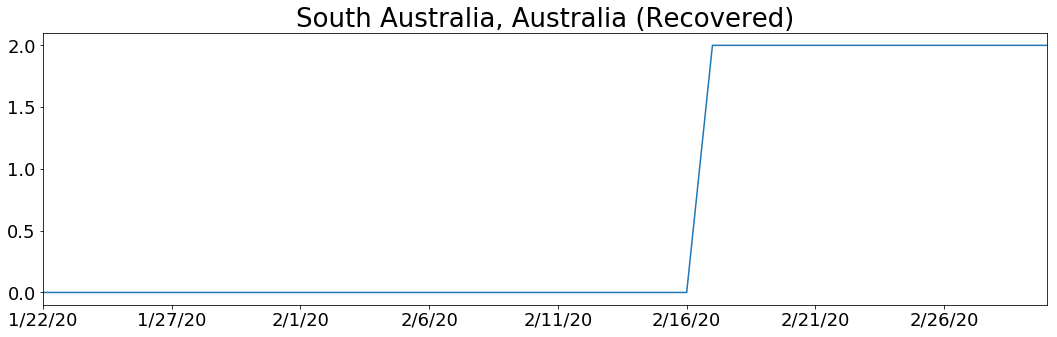

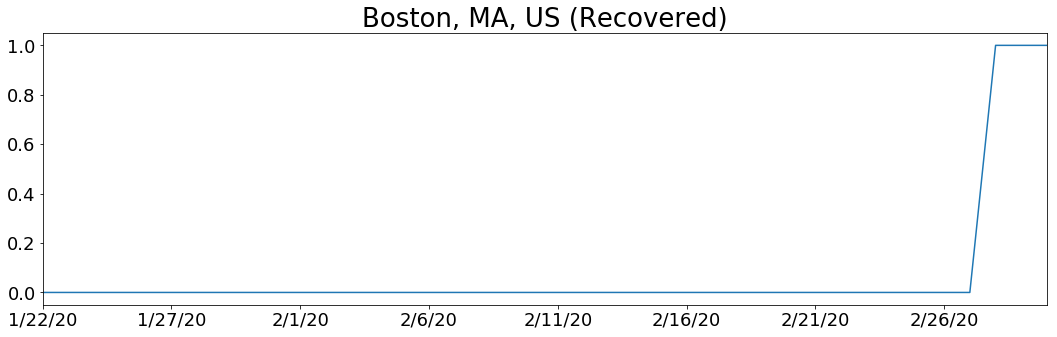

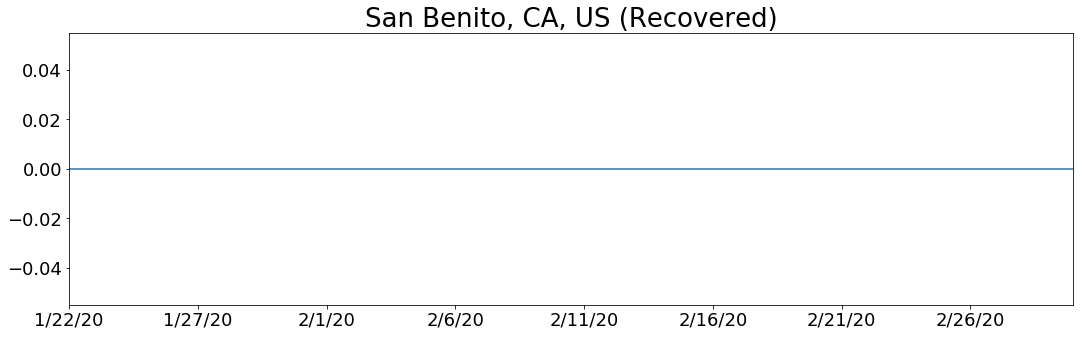

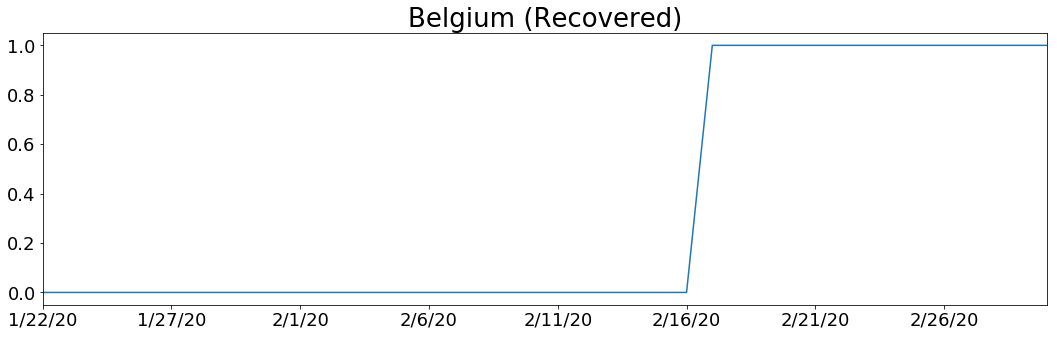

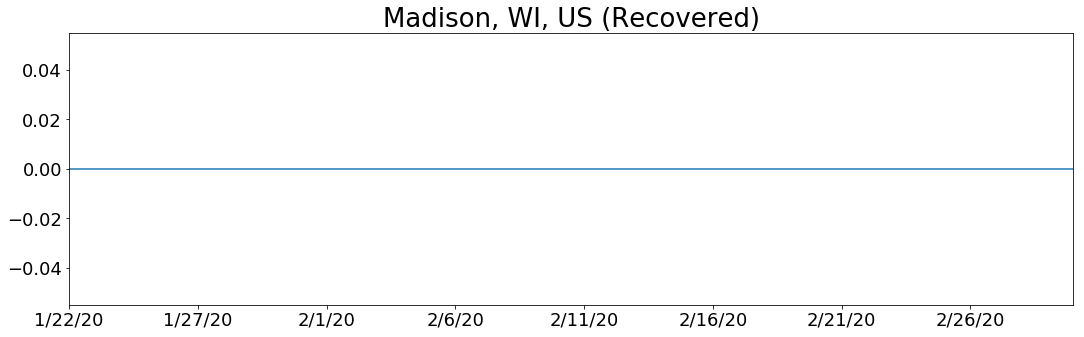

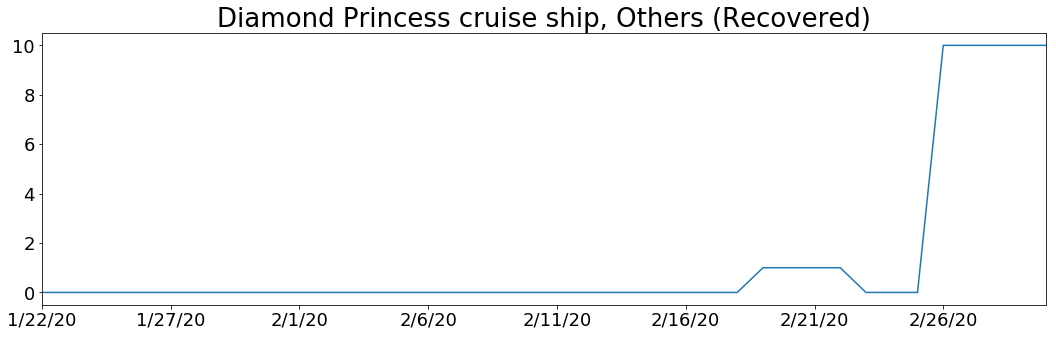

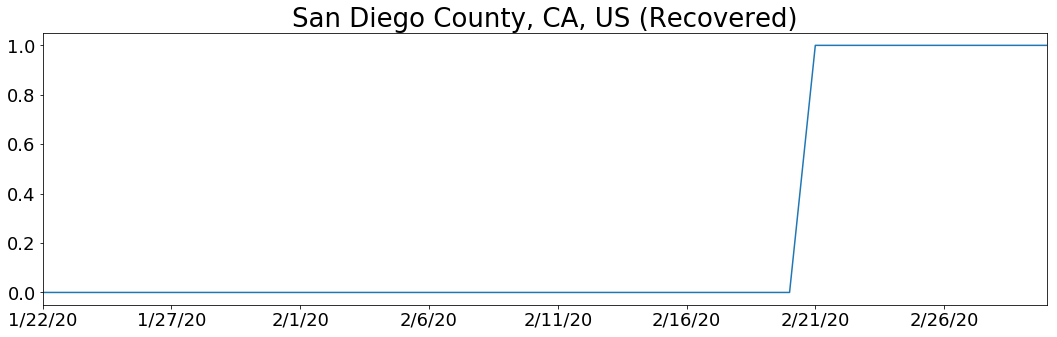

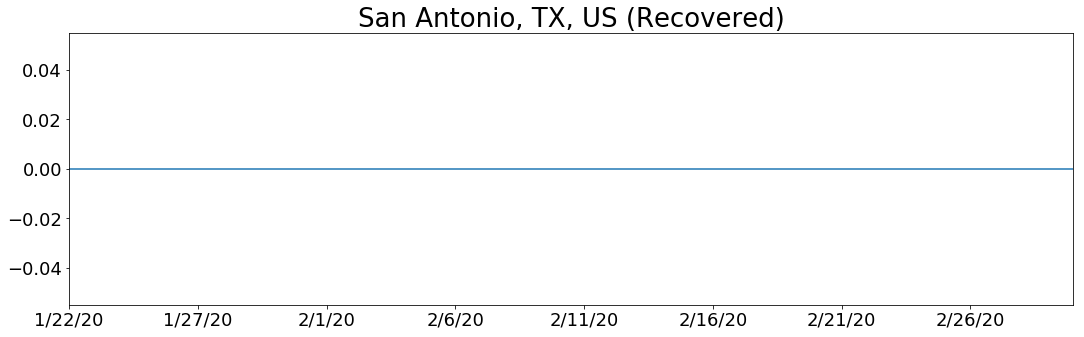

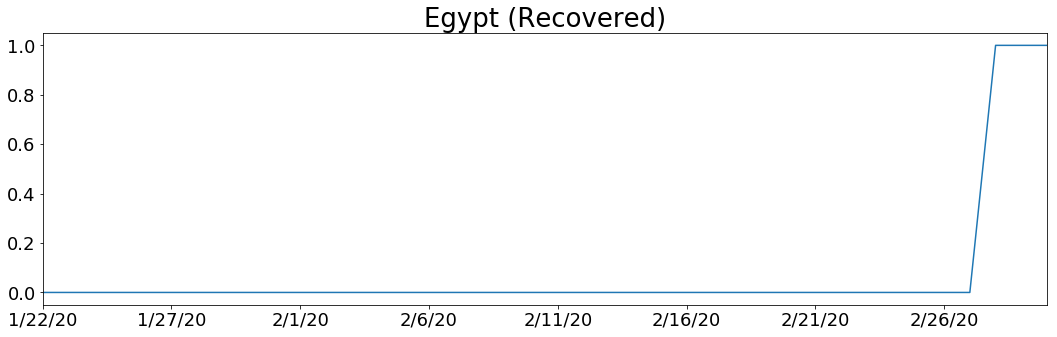

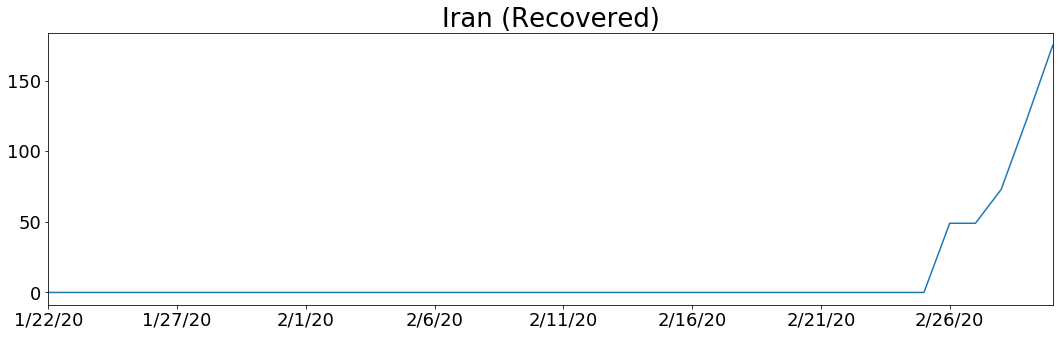

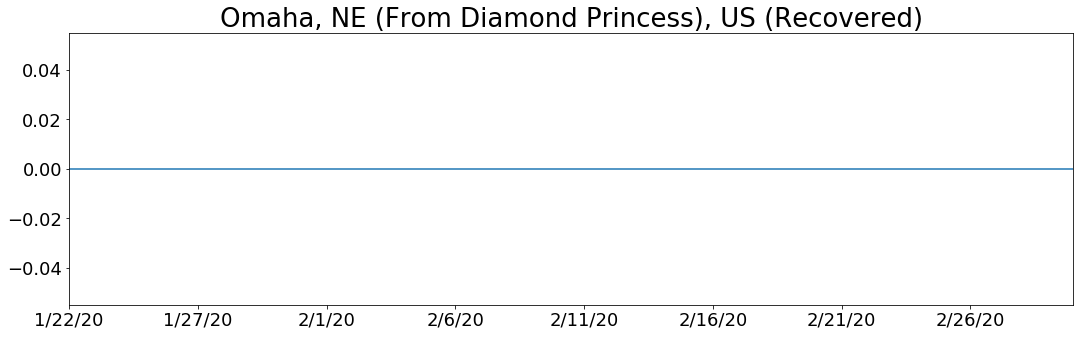

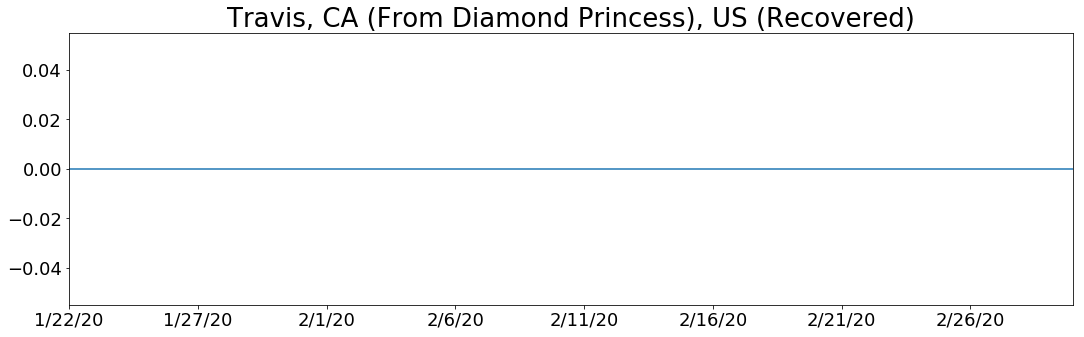

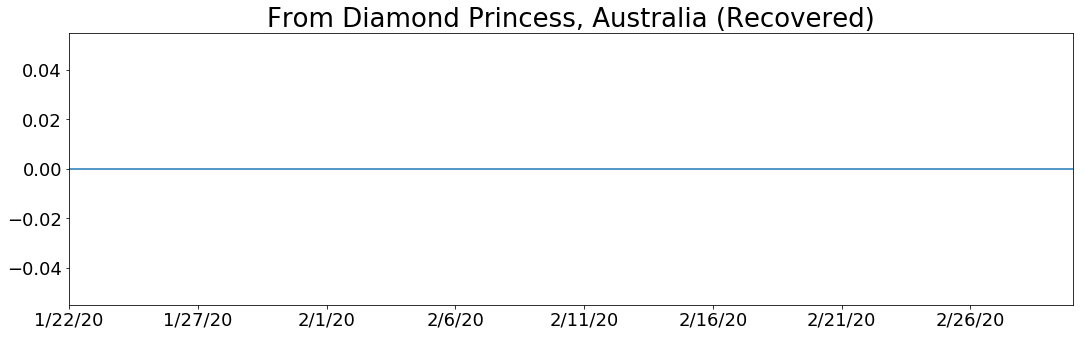

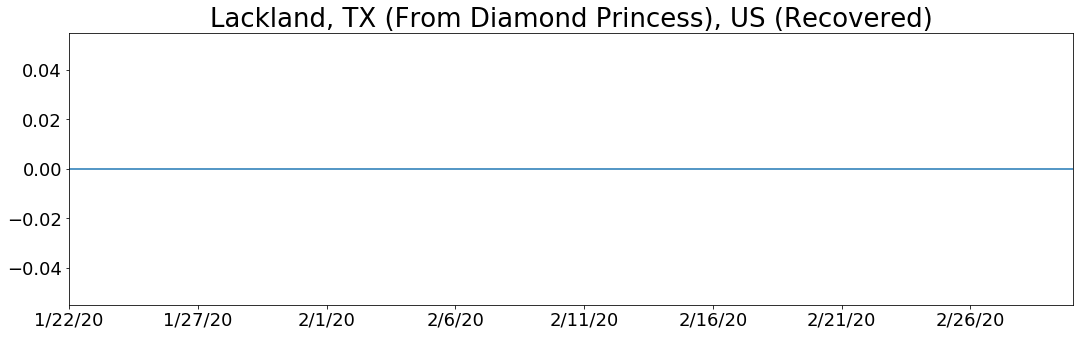

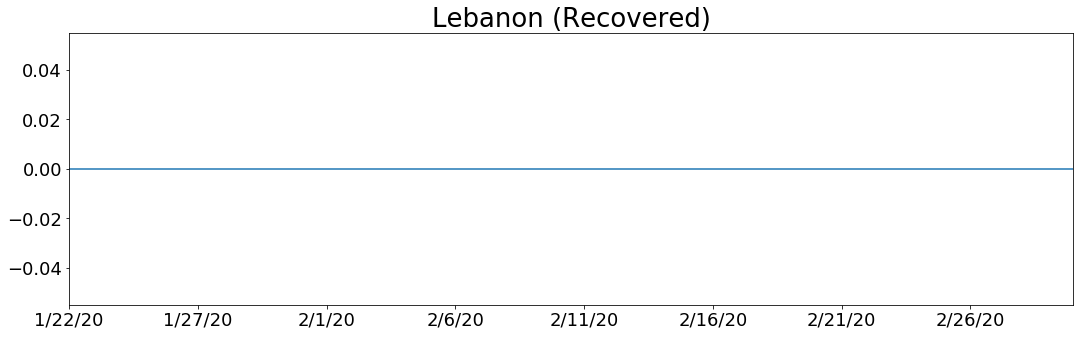

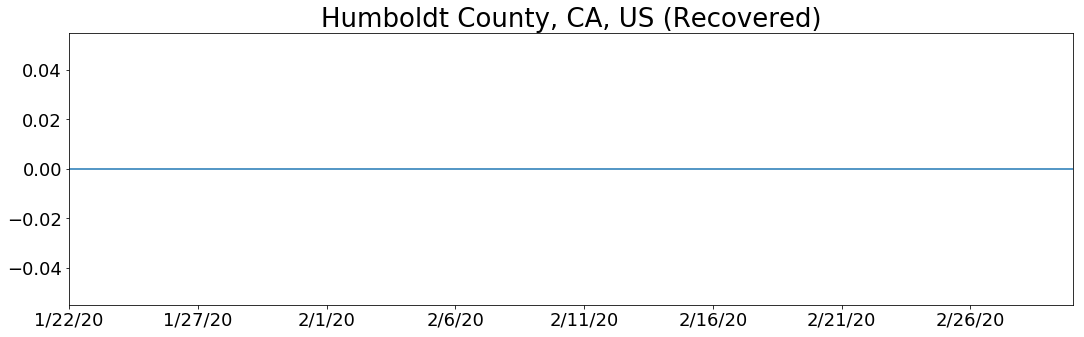

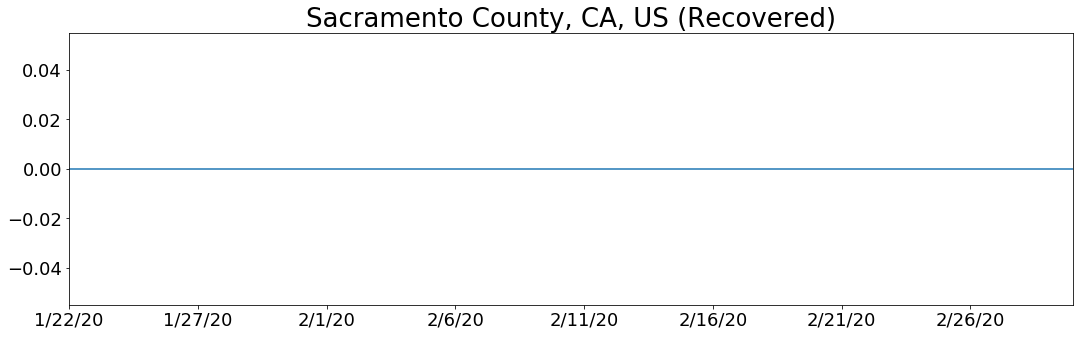

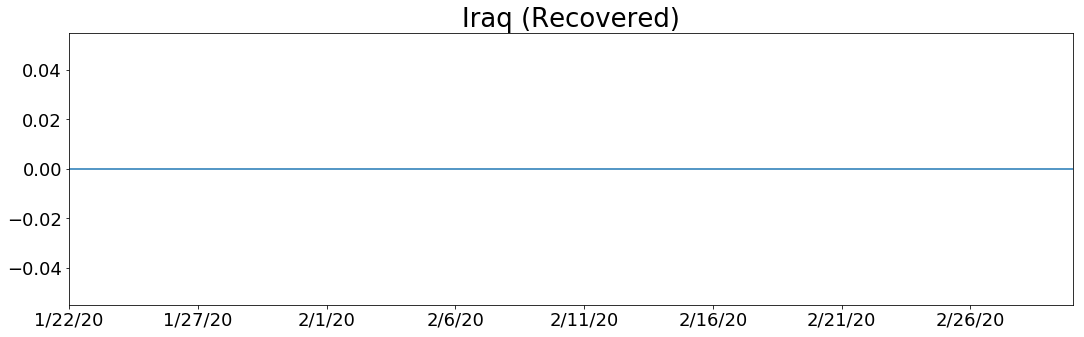

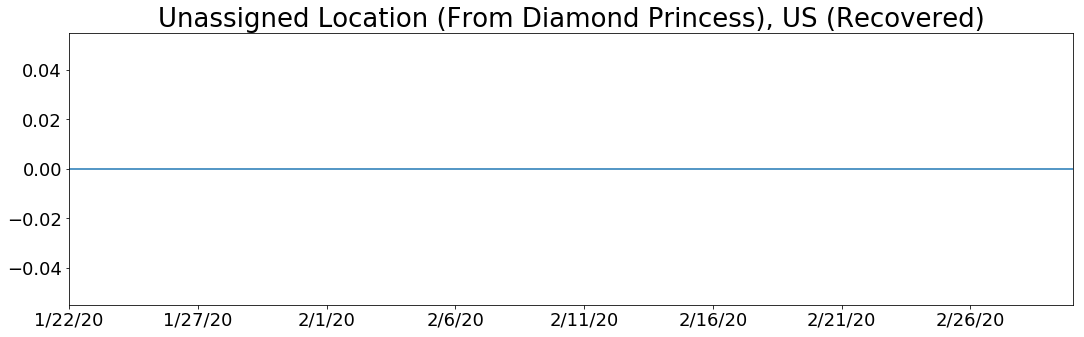

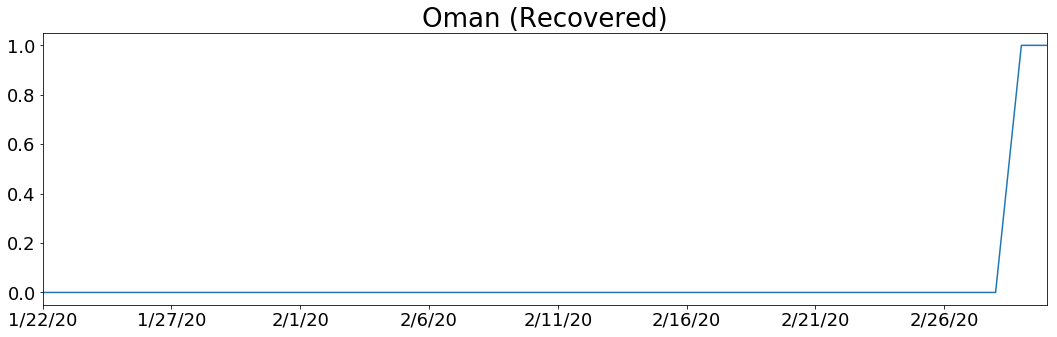

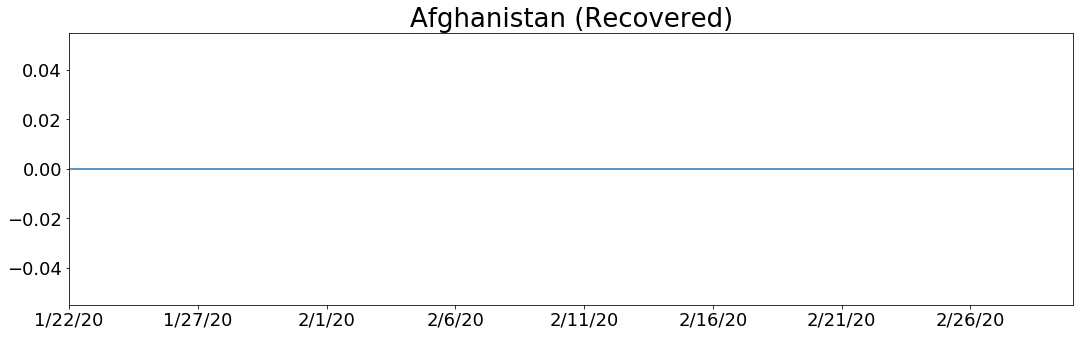

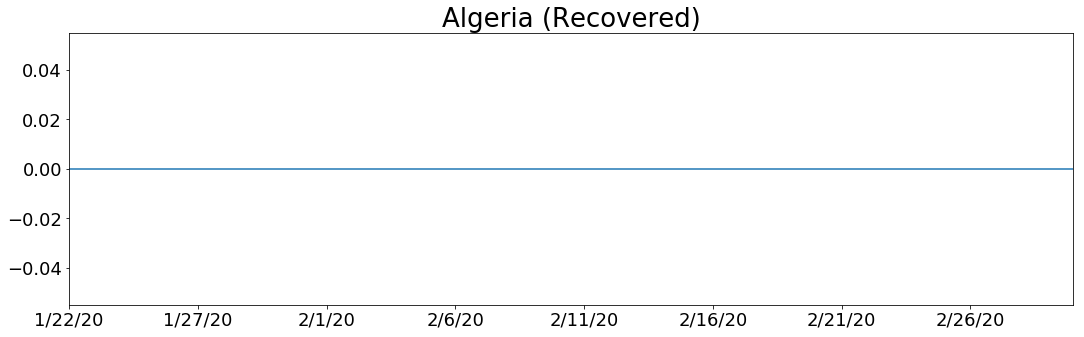

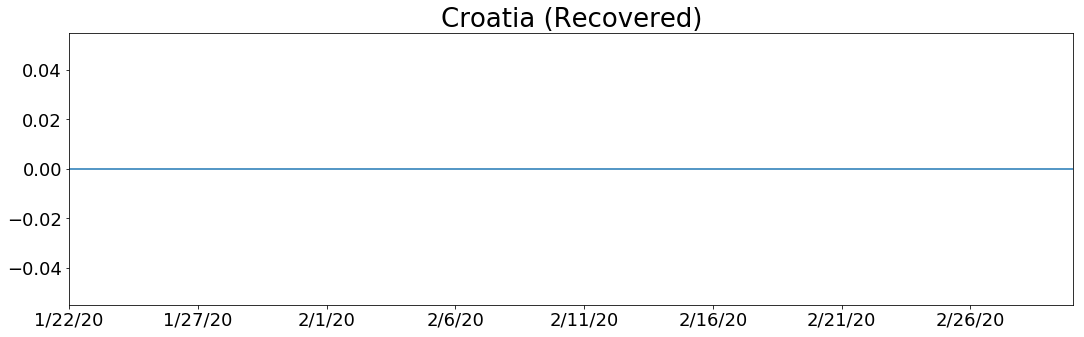

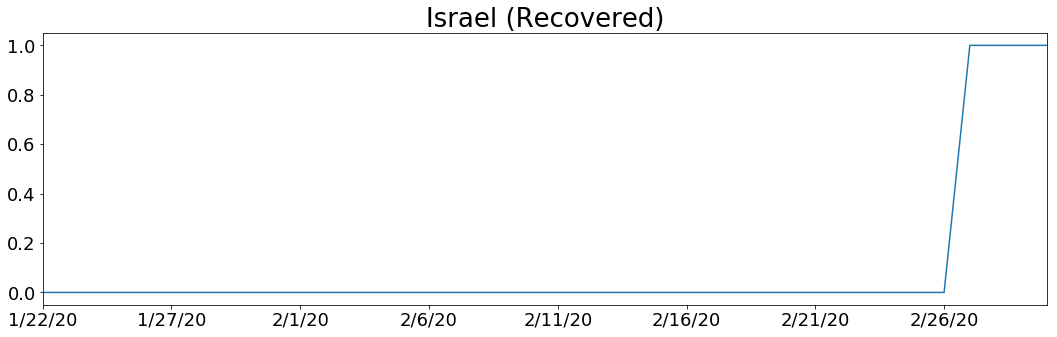

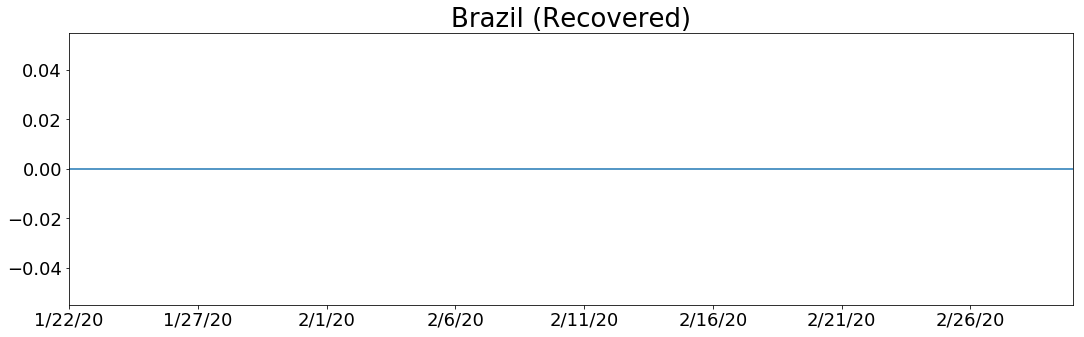

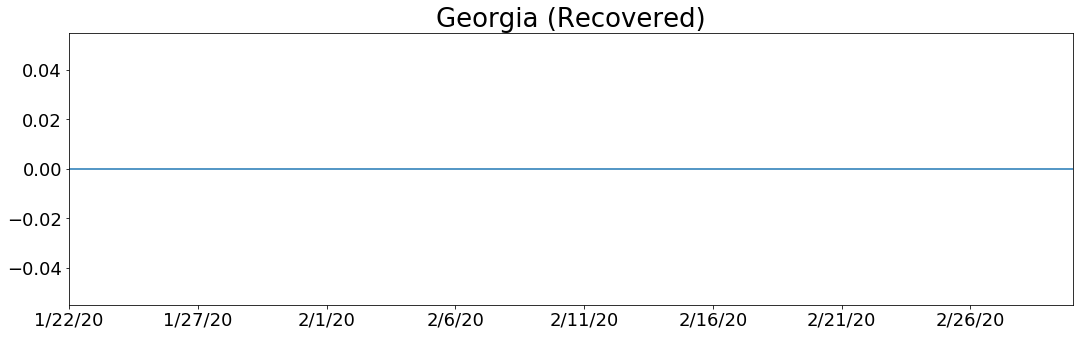

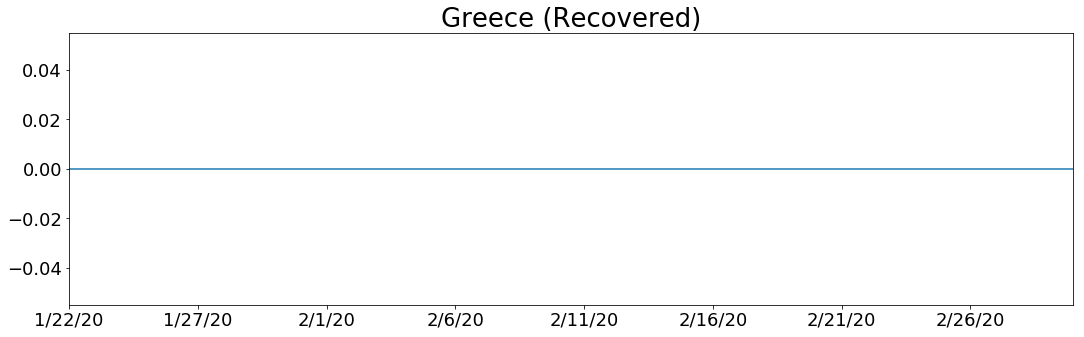

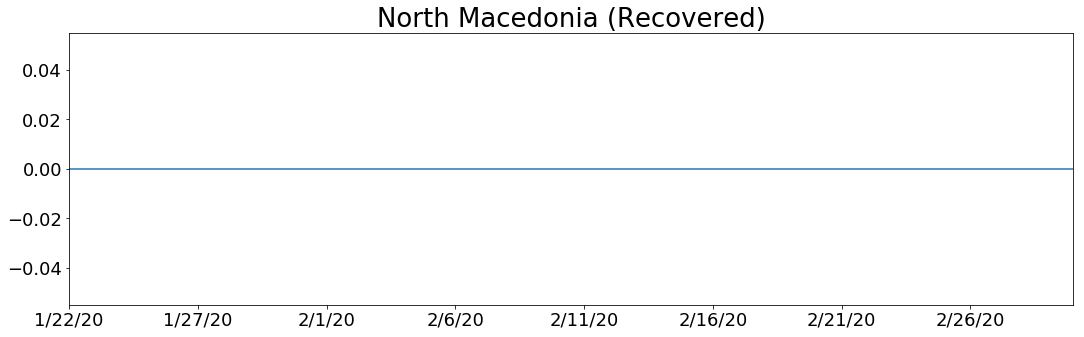

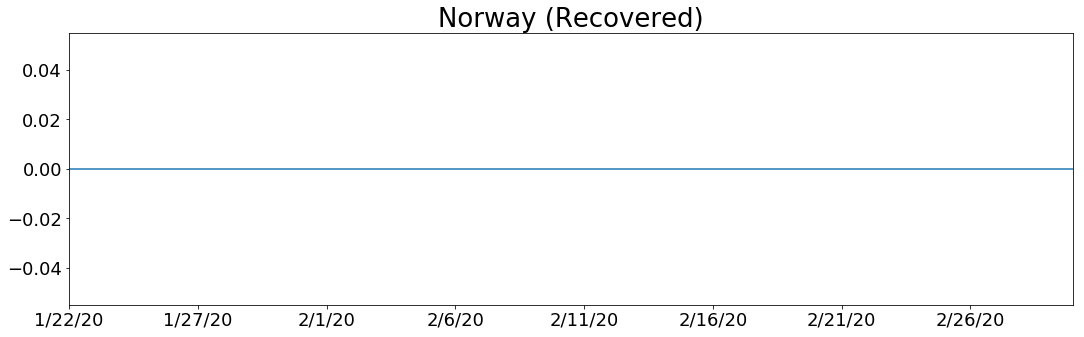

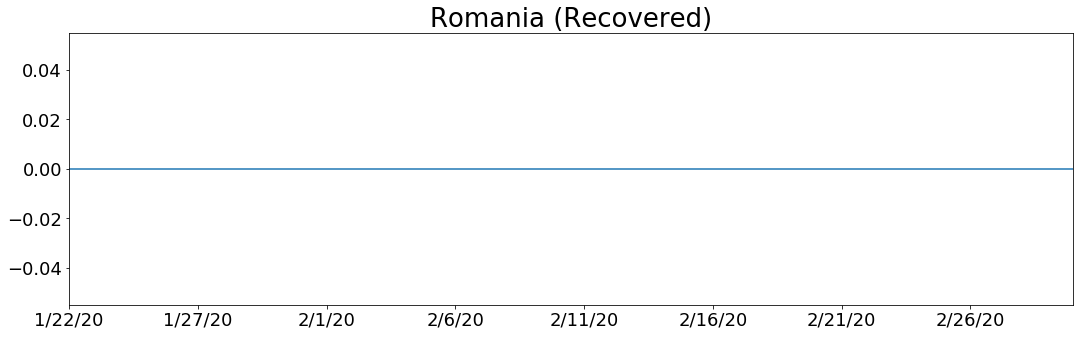

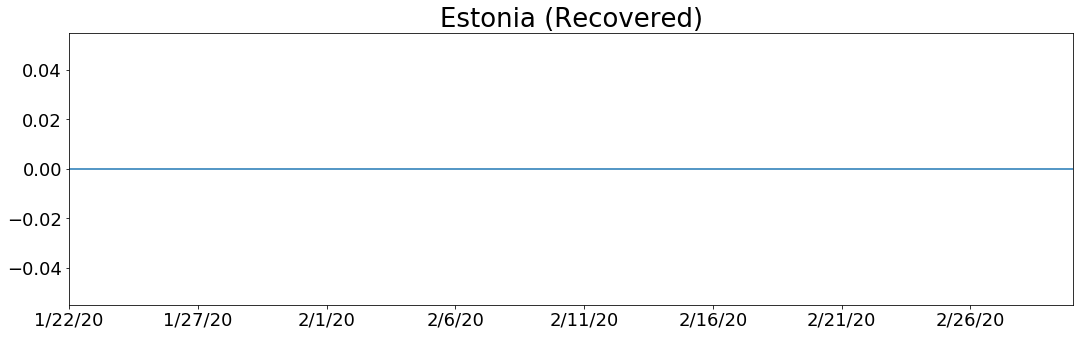

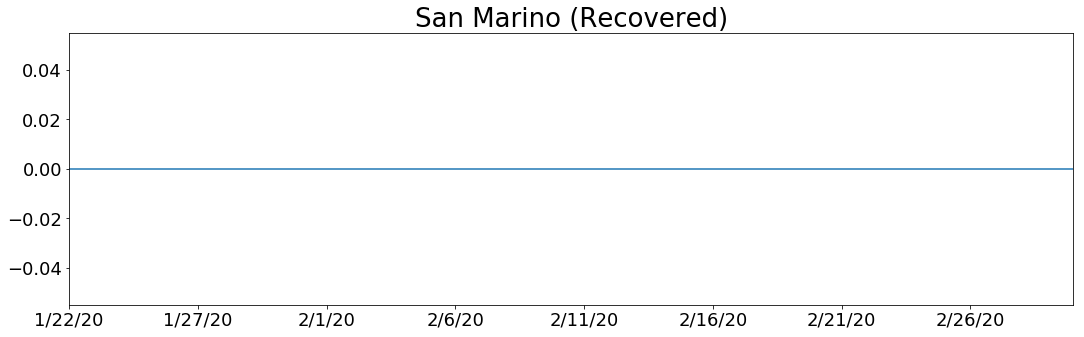

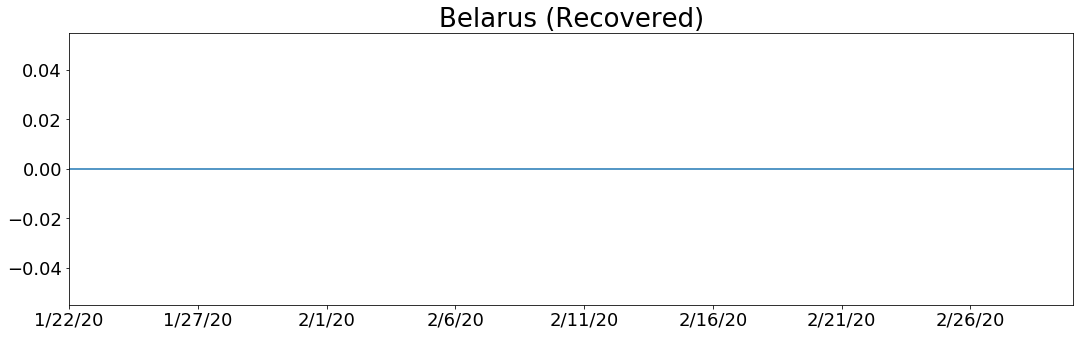

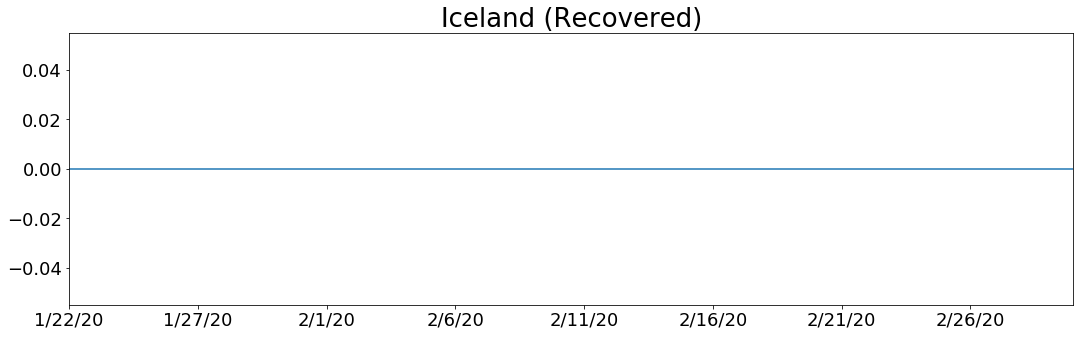

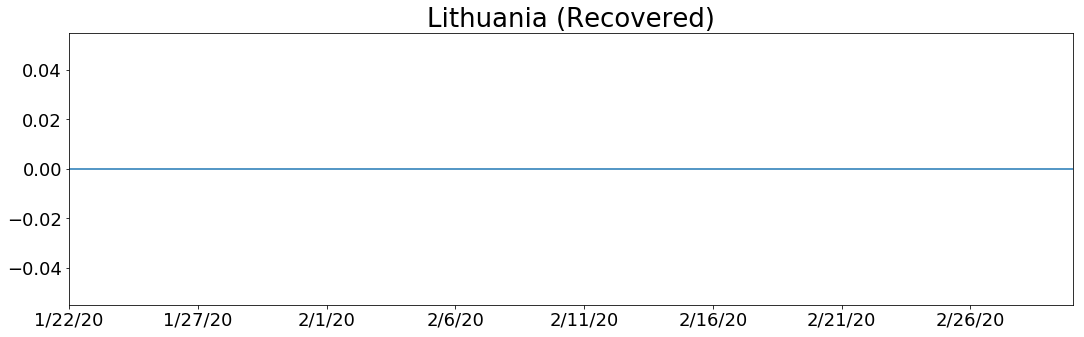

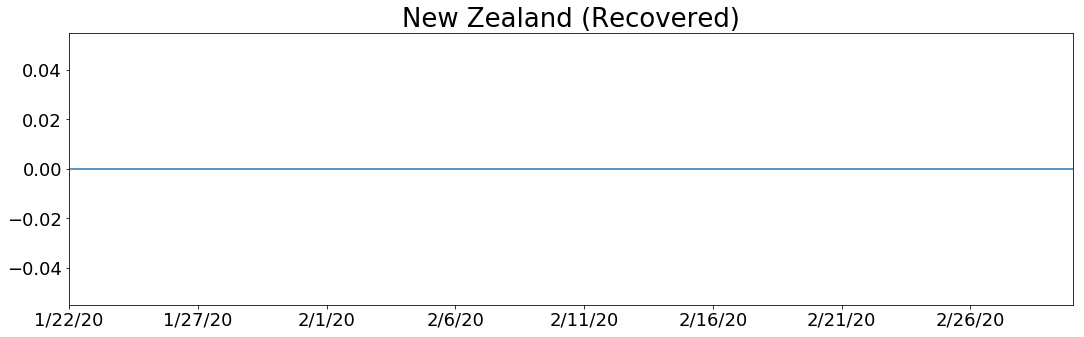

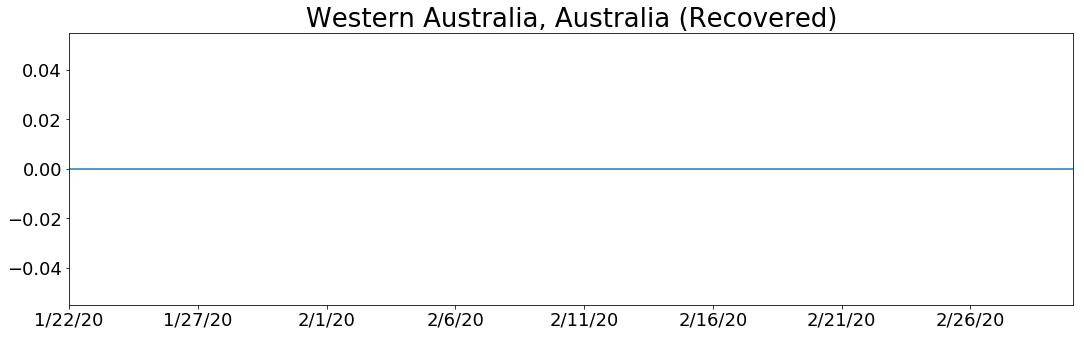

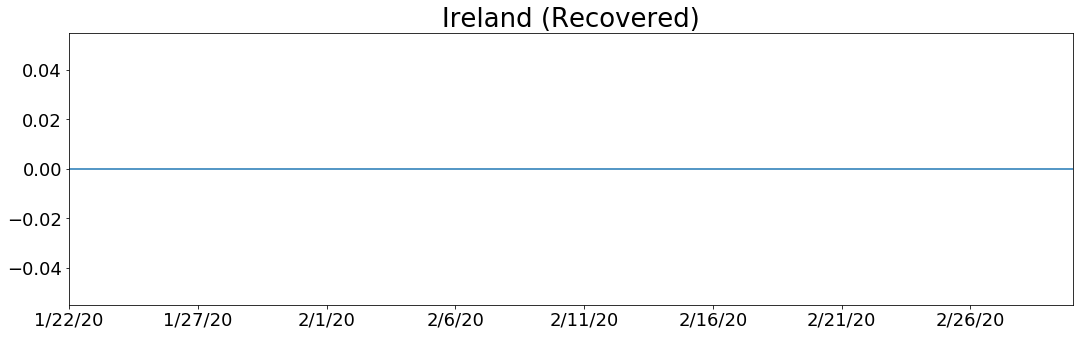

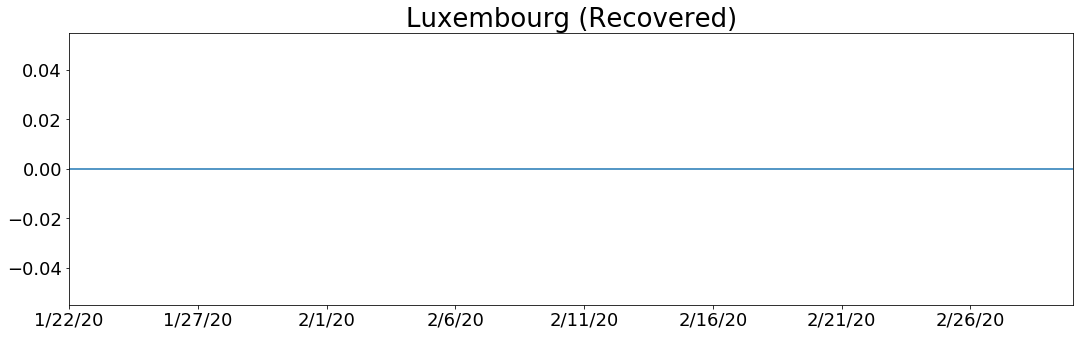

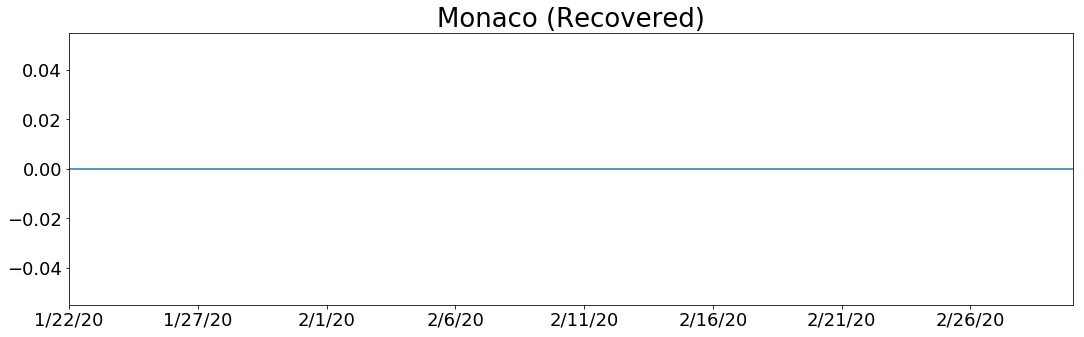

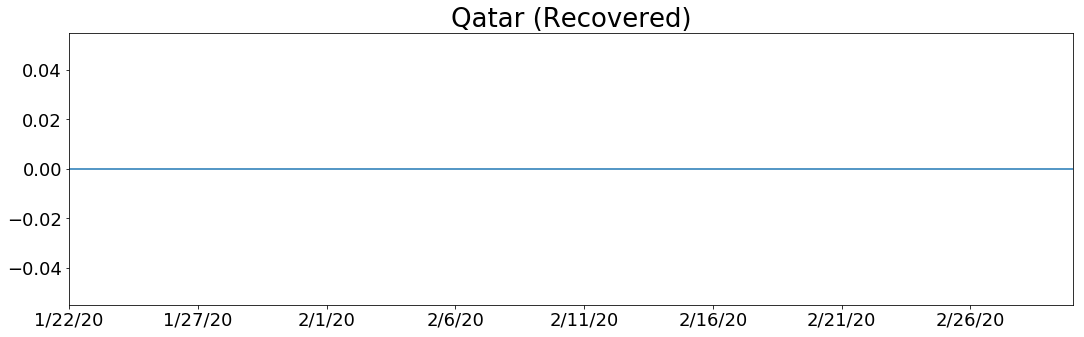

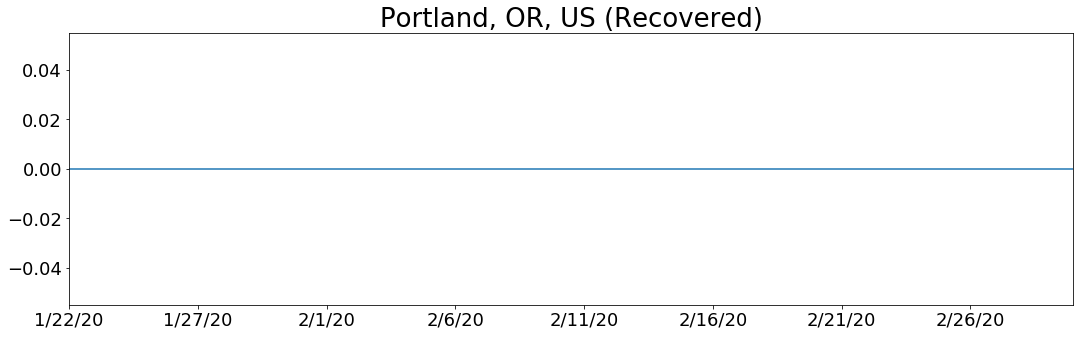

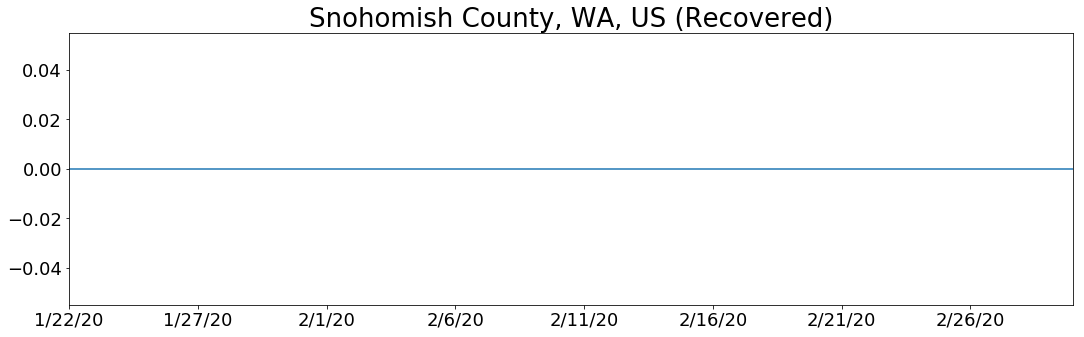

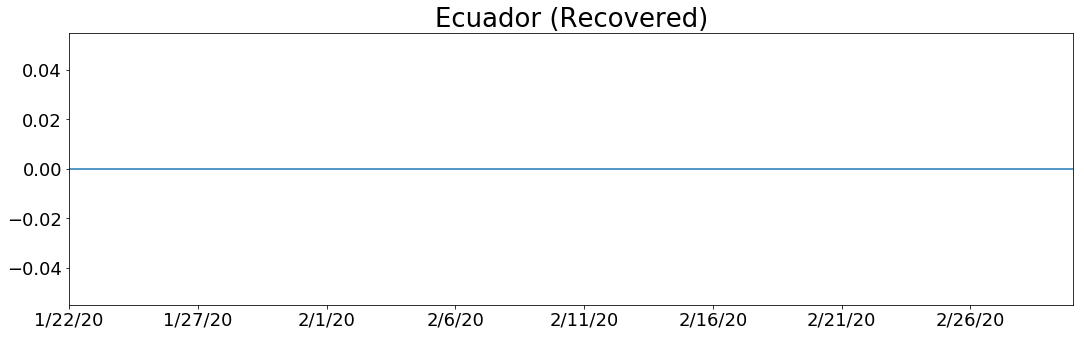

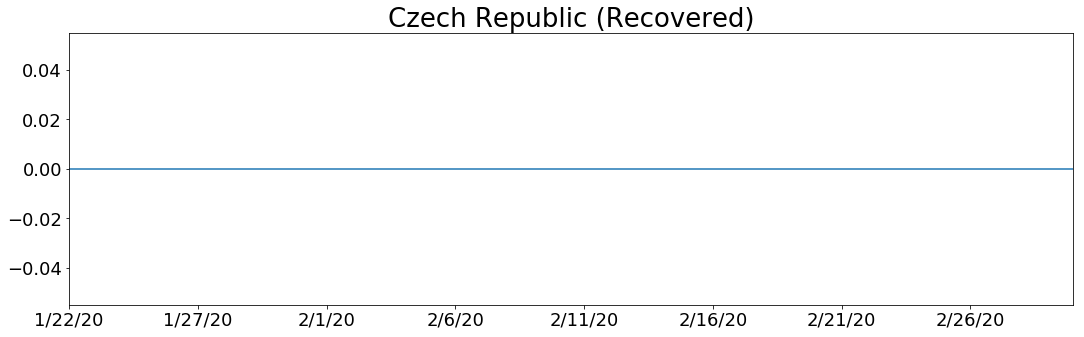

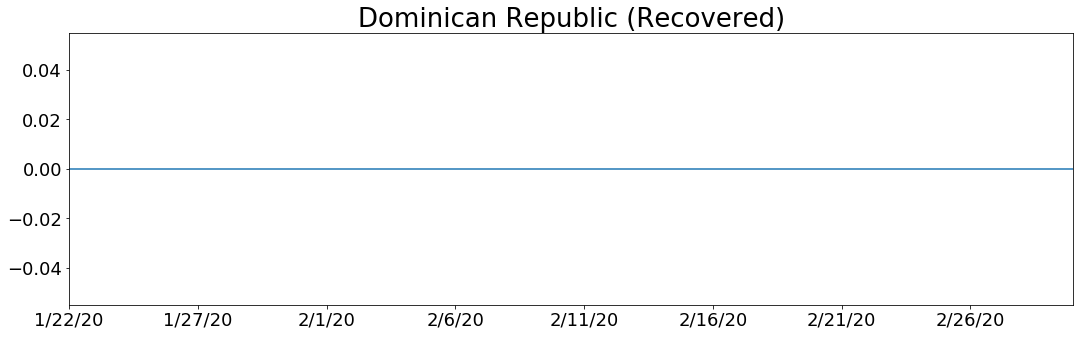

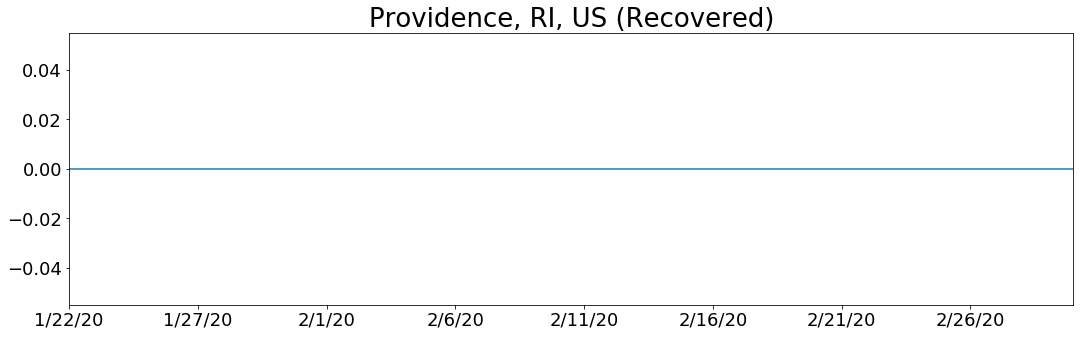

In [24]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Recovered by Date"
for index, row in time_series_covid_19_recovered.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Recovered)")
    else:
        plt.title(row["Country/Region"] + " (Recovered)")
    plt.show()